# Phase 4 Project
Student: Joshua Ruggles<br>
Instructor: Morgan Jones<br>
Data Science Flex 

## Business Problem

We have been contacted by a real estate agency to see if there is any relation between a bump in housing prices where cannabis has been legalized and if so, when and how much? <br><br>

We will take into account the year that cannabis was legalized in the state in question and train an ARMA model on the stationary data (if applicable) of states that have legalized cannabis and see if there would be a bump in HPI for homes in states that have yet to do so, if they so choose to legalize. 

## Cannabis' effect on Housing Market

For this project we are looking at cannabis and its effect on the housing market in states that have legalized recreational use. 

<img src="photos/map.png"  /><br><br>
<center>Image from nbcnews.com (November 2022)</center>

In [1]:
# import pandas
import pandas as pd
import numpy as np 
from statsmodels.tsa.stattools import adfuller
# Because there are two datasets, set two variables and preview first 5 of both
national_df = pd.read_csv("HPI_AT_BDL_national.csv")
national_df.head(10)

C:\Users\jkrug\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\jkrug\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


HPI for nation (All-Transactions Index)\nExperimental Indexes Showing Cumulative (Nominal) Annual Appreciation  \
0                                                NaN                                                               
1  * These annual national indexes should be cons...                                                               
2  ** For tracking and feedback purposes, please ...                                                               
3                      Last updated: March 24, 2022.                                                               
4                     Not Seasonally Adjusted (NSA)                                                                
5                                               Year                                                               
6                                               1975                                                               
7                                               1976                                                               
8                                               1977                                                               
9                                               1978                                                               

          Unnamed: 1 Unnamed: 2          Unnamed: 3          Unnamed: 4  
0                NaN        NaN                 NaN                 NaN  
1                NaN        NaN                 NaN                 NaN  
2                NaN        NaN                 NaN                 NaN  
3                NaN        NaN                 NaN                 NaN  
4                NaN        NaN                 NaN                 NaN  
5  Annual Change (%)        HPI  HPI with 1990 base  HPI with 2000 base  
6                  .     100.00               35.24               26.22  
7               5.55     105.55               37.19               27.67  
8              13.49     119.79               42.21               31.41  
9              14.88     137.61               48.49               36.08

I suspect that this dataset begins at the 5th row. 

In [2]:
# Looking at our first column, it looks like 'Year' is the beginning
# of the data
national_df = pd.read_csv("HPI_AT_BDL_national.csv", skiprows = 6)
national_df.head()

Year Annual Change (%)     HPI  HPI with 1990 base  HPI with 2000 base
0  1975                 .  100.00               35.24               26.22
1  1976              5.55  105.55               37.19               27.67
2  1977             13.49  119.79               42.21               31.41
3  1978             14.88  137.61               48.49               36.08
4  1979             13.51  156.21               55.04               40.96

In [3]:
# Get info() from national_df
national_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                47 non-null     int64  
 1   Annual Change (%)   47 non-null     object 
 2   HPI                 47 non-null     float64
 3   HPI with 1990 base  47 non-null     float64
 4   HPI with 2000 base  47 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.0+ KB


Great! We can probably assume that the 47 in this signifies that we have data for 47 years. (1975 + 47 = 2022) This project was started in 2023 on dataset published in 2022. 

In [4]:
# Let's take a look at the second dataset
state_df = pd.read_csv("HPI_AT_BDL_state.csv")
state_df.head()

HPI for states (All-Transactions Index)\nExperimental Indexes Showing Cumulative (Nominal) Annual Appreciation  \
0                                                NaN                                                               
1  * These annual state indexes should be conside...                                                               
2  ** For tracking and feedback purposes, please ...                                                               
3                      Last updated: March 24, 2022.                                                               
4                     Not Seasonally Adjusted (NSA)                                                                

  Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   

  Unnamed: 7  Unnamed: 8  
0        NaN         NaN  
1        NaN         NaN  
2        NaN         NaN  
3        NaN         NaN  
4        NaN         NaN

That looks to be the case with the state dataset as well. 

In [5]:
# Same deal, skip 6 rows
state_df = pd.read_csv("HPI_AT_BDL_state.csv", skiprows = 6)
state_df.head()

State Abbreviation  FIPS  Year Annual Change (%)     HPI  \
0  Alabama           AL     1  1975                 .  100.00   
1  Alabama           AL     1  1976              6.70  106.70   
2  Alabama           AL     1  1977             10.00  117.37   
3  Alabama           AL     1  1978              8.38  127.21   
4  Alabama           AL     1  1979             10.73  140.86   

   HPI with 1990 base  HPI with 2000 base  Unnamed: 8  
0               49.74               36.16         NaN  
1               53.08               38.58         NaN  
2               58.39               42.44         NaN  
3               63.28               46.00         NaN  
4               70.07               50.93         NaN

## Preprocessing<br>
- Gather information on our state dataset. <br>
- Set our 'Year' column as the index. <br>
- Drop any null values or columns. 


In [6]:
# Get info()
state_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2397 entries, 0 to 2396
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               2397 non-null   object 
 1   Abbreviation        2397 non-null   object 
 2   FIPS                2397 non-null   int64  
 3   Year                2397 non-null   int64  
 4   Annual Change (%)   2397 non-null   object 
 5   HPI                 2397 non-null   float64
 6   HPI with 1990 base  2397 non-null   float64
 7   HPI with 2000 base  2397 non-null   float64
 8   Unnamed: 8          0 non-null      float64
dtypes: float64(4), int64(2), object(3)
memory usage: 168.7+ KB


The last column looks like it is completely empty. Let's use .drop() to get rid of it. 

In [7]:
# Drop state_df["Unnamed: 8"]
state_df = state_df.drop(columns = "Unnamed: 8")
state_df.head()

State Abbreviation  FIPS  Year Annual Change (%)     HPI  \
0  Alabama           AL     1  1975                 .  100.00   
1  Alabama           AL     1  1976              6.70  106.70   
2  Alabama           AL     1  1977             10.00  117.37   
3  Alabama           AL     1  1978              8.38  127.21   
4  Alabama           AL     1  1979             10.73  140.86   

   HPI with 1990 base  HPI with 2000 base  
0               49.74               36.16  
1               53.08               38.58  
2               58.39               42.44  
3               63.28               46.00  
4               70.07               50.93

In [8]:
# Find all unique states 
states = state_df["State"].unique()
states

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [9]:
# Check to see if some numbers were skipped, there should only be 51 entries
fips = state_df['FIPS'].unique()
fips

array([ 1,  2,  4,  5,  6,  8,  9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56],
      dtype=int64)

In [10]:
# Make 'Year' our index column 
state_df.set_index('Year', inplace = True)

In [11]:
state_df.head()

State Abbreviation  FIPS Annual Change (%)     HPI  \
Year                                                         
1975  Alabama           AL     1                 .  100.00   
1976  Alabama           AL     1              6.70  106.70   
1977  Alabama           AL     1             10.00  117.37   
1978  Alabama           AL     1              8.38  127.21   
1979  Alabama           AL     1             10.73  140.86   

      HPI with 1990 base  HPI with 2000 base  
Year                                          
1975               49.74               36.16  
1976               53.08               38.58  
1977               58.39               42.44  
1978               63.28               46.00  
1979               70.07               50.93

## There is data on all 50 states including the District of Columbia. 

<br><br>
### Abbreviations explored and why we don't currently need them:
<br><br>
- FIPS: FIPS codes are the numbers used to identify geographic 
regions like countries, states and counties.

<br><br>
- Annual Change (%): This is great tracking information for our analysis but currently will not work with our model. Also, because our intentions are to visualize this information we can just use HPI against each year to visualize change. 

<br><br>
- HPI with 1990 base: The average of the Housing Price Index from the year 1900 to 2000. 

<br><br>
- HPI with 2000 base: The average of the Housing Price Index from 2000 to presumably 2022. 

### What we do need:
<br><br>
- HPI: Housing price index 
<br><br>
The House Price Index (HPI) is a broad measure of the movement of single-family property prices in the United States. Aside from serving as an indicator of house price trends, it also functions as an analytical tool for estimating changes in the rates of mortgage defaults, prepayments, and housing affordability. Generally speaking this is the most important data for our analysis. <br><br>
https://www.investopedia.com/terms/h/house-price-index-hpi.asp


### Dropping unnecessary data

In [12]:
# We only want to keep Year, State, and HPI information
state_df = state_df.drop(columns = ['Abbreviation', 'FIPS', 
                              'Annual Change (%)', 
                             'HPI with 1990 base', 
                             'HPI with 2000 base'])

In [13]:
state_df.head()

State     HPI
Year                 
1975  Alabama  100.00
1976  Alabama  106.70
1977  Alabama  117.37
1978  Alabama  127.21
1979  Alabama  140.86

## How does the HPI look for all fifty(one) states?
Let's take a cursory glance at the trend from 1975 to 2022. 

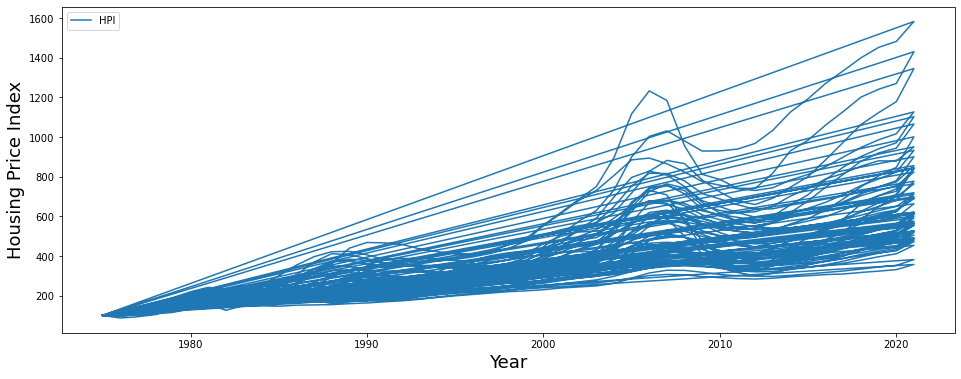

In [14]:
import matplotlib.pyplot as plt 
%matplotlib inline
state_df.plot(figsize = (16,6))
plt.xlabel("Year", fontsize = 18)
plt.ylabel("Housing Price Index", fontsize = 18)
plt.title("", fontsize = 18);


<div class="alert alert-block alert-info">
Nothing super surprising happening here. There are certainly states that appear to have lower rates of increase than others and definitely lower HPI than other states. We can see that our data is on an upward trend. We can also see that our data is non-stationary. For now let's continue exploring. 
</div>

### What states then have legalized recreational cannabis use? 
<br>

_According to the National Conference of State Legislatures, 21 states have legalized the adult use of marijuana for recreational purposes: Alaska, Arizona, California, Colorado, Connecticut, Illinois, Maine, Maryland, Massachusetts, Michigan, Missouri, Montana, New Jersey, New Mexico, New York, Nevada, Oregon, Rhode Island, Vermont, Virginia and Washington._  
<br>
From: https://www.cnet.com/news/politics/marijuana-laws-by-state-where-is-weed-legal/#:~:text=According%20to%20the%20National%20Conference,York%2C%20Nevada%2C%20Oregon%2C%20Rhode
<br>
For our purposes we will also need to know when each state legalized recreational use of cannabis by year. <br>

- Alaska: Q4 2014
- Arizona: Q4 2020
- California: Q4 2016
- Colorado: Q4 2012
- Connecticut: Q1 2023
- Illinois: Q1 2020
- Maine: Q4 2016
- Maryland: TBD (2023)
- Massachusetts: Q4 2016
- Michigan: Q4 2018
- Missouri: Q4 2022
- Montana: Q1 2021
- New Jersey: Q2 2022
- New Mexico: Q2 2021
- New York: Q1 2021
- Nevada: Q1 2017
- Oregon: Q3 2015
- Rhode Island: Q4 2022
- Vermont: Q4 2022
- Virginia: Q3 2021
- Washington: Q4 2012




## Time Series analysis of the HIP of states that have legalized recreational cannabis use

In [15]:
# Separate the states that have fully legalized recreational cannabis use to make time series data onb
Alaska = state_df[state_df['State'] == 'Alaska']
Arizona = state_df[state_df['State'] == 'Arizona']
California = state_df[state_df['State'] == 'California']
Colorado = state_df[state_df['State'] == 'Colorado']
Connecticut = state_df[state_df['State'] == 'Connecticut']
Illinois = state_df[state_df['State'] == 'Illinois']
Maine = state_df[state_df['State'] == 'Maine']
Maryland = state_df[state_df['State'] == 'Maryland']
Massachusetts = state_df[state_df['State'] == 'Massachusetts']
Michigan = state_df[state_df['State'] == 'Michigan']
Missouri = state_df[state_df['State'] == 'Missouri']
Montana = state_df[state_df['State'] == 'Montana']
New_Jersey = state_df[state_df['State'] == 'New Jersey']
New_Mexico = state_df[state_df['State'] == 'New Mexico']
New_York = state_df[state_df['State'] == 'New York']
Nevada = state_df[state_df['State'] == 'Nevada']
Oregon = state_df[state_df['State'] == 'Oregon']
Rhode_Island = state_df[state_df['State'] == 'Rhode Island']
Vermont = state_df[state_df['State'] == 'Vermont']
Virginia = state_df[state_df['State'] == 'Virginia']
Washington = state_df[state_df['State'] == 'Washington']

### Analysis of results: Alaska
Considering that Alaska was one of the earliest adopters of recreational marijuana use it would be interesting to see if they were a trend setting state whether up or down. We should keep in mind that Alaska is a very remote location and is next to Canada, a country where _medicinal_ cannabis use has been legal since 2001.

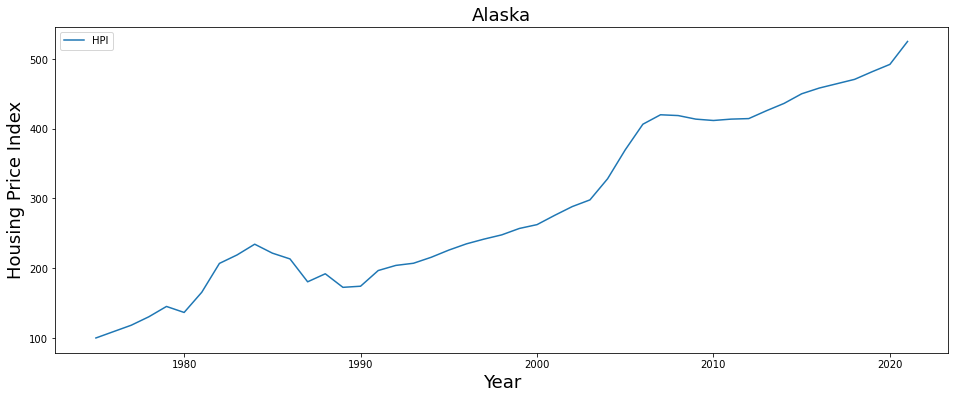

In [16]:
# Demo matplotlib on Alaska
Alaska.plot(figsize = (16,6))
plt.xlabel("Year", fontsize = 18)
plt.ylabel("Housing Price Index", fontsize = 18)
plt.title("Alaska", fontsize = 18);


<div class="alert alert-block alert-info">
At surface level it would appear that there is little correlation to housing prices and cannabis legality. 
</div>

### Analyisis of results: California

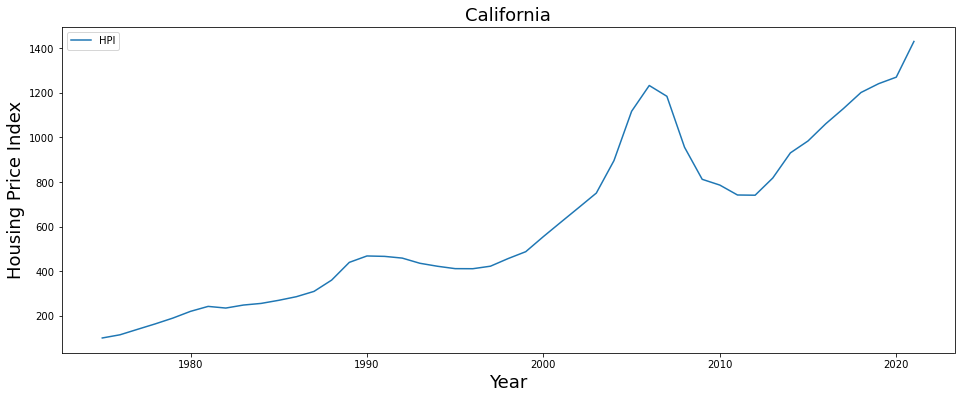

In [17]:
# Demo matplotlib on California
California.plot(figsize = (16,6))
plt.xlabel("Year", fontsize = 18)
plt.ylabel("Housing Price Index", fontsize = 18)
plt.title("California", fontsize = 18);

<div class="alert alert-block alert-info">
Looking at the graph above it would appear the the 2008 housing market crash had a significant effect on housing prices in California, but also housing prices seem to have steadily risen since 2011/2012. 
</div>

## Dickey-Fuller Test: Alaska's HPI
Work shown below to achieve best statistical results for stationary data. 

### Function for differencing
Well that's great that we were able to walk through that process once. Let's make a function to lessen the amount of work we may have to do in the future for the remaining states. 

In [18]:
def diff (state):
    state = state.drop(columns = 'State', axis =1)
    state_diff = state.diff(periods =1)
    state_diff = state_diff.dropna()

# Plot state HPI with trends removed
    state_diff.plot(figsize = (18,6))
    plt.xlabel('Year', fontsize = 18)
    plt.title("Stationary data", fontsize = 18);

    dftest = adfuller(state_diff)

# Display testing data 
    dfoutput = pd.Series(
                dftest[0:4], 
                index=['Test Statistic',
                       'p-value',
                       '#Lags Used',
                       'Number of Observations Used']
    )

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    display(dfoutput)


### Function for 2nd order differencing

In [19]:
def second_order_diff (state):
    state = state.drop(columns = 'State', axis =1)
    state_diff = state.diff(periods =2)
    state_diff = state_diff.dropna()

# Plot state HPI with trends removed
    state_diff.plot(figsize = (18,6))
    plt.xlabel('Year', fontsize = 18)
    plt.title("Stationary data", fontsize = 18);

    dftest = adfuller(state_diff)

# Display testing data 
    dfoutput = pd.Series(
                dftest[0:4], 
                index=['Test Statistic',
                       'p-value',
                       '#Lags Used',
                       'Number of Observations Used']
    )

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    display(dfoutput)


### Function for 3rd order differencing 

In [20]:
def third_order_diff (state):
    state = state.drop(columns = 'State', axis =1)
    state_diff = state.diff(periods =3)
    state_diff = state_diff.dropna()

# Plot state HPI with trends removed
    state_diff.plot(figsize = (18,6))
    plt.xlabel('Year', fontsize = 18)
    plt.title('Stationary data', fontsize = 18);
    dftest = adfuller(state_diff)

# Display testing data
    dfoutput = pd.Series(
                dftest[0:4], 
                index=['Test Statistic',
                       'p-value',
                       '#Lags Used',
                       'Number of Observations Used']
    )

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    display(dfoutput)


### Function for subtracting the rolling mean

In [21]:
def srm(state): 
    
    state = state.drop(columns = 'State')
    roll = state.rolling(window = 4).mean()
    
    # Subtract roll from our original data and create a new variable
    roll_minus = state - roll
    
    # Because we have a window = 4 we anticipate that there will be some nulls
    roll = roll_minus.dropna()

    # Plot HPI with trends removed
    roll.plot(figsize = (18,6))
    plt.xlabel('Year', fontsize = 18)
    plt.title('Stationary data', fontsize = 18);
    dftest = adfuller(roll)
    
# Display testing data 
    dfoutput = pd.Series(
                dftest[0:4], 
                index=['Test Statistic',
                       'p-value',
                       '#Lags Used',
                       'Number of Observations Used']
    )

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    display(dfoutput)

### Function for subtracting the exponential rolling mean

In [22]:
def erm(state): 

# Create the exp_roll_mean variable
    state = state.drop(columns = 'State')
    exp_roll_mean = state.ewm(halflife = 2).mean()

# Subtract exp_roll_mean from mi 
    minus_exp_roll_mean = state - exp_roll_mean

# Drop null values and for the love of god make it a shorter variable name
    mean = minus_exp_roll_mean.dropna()

# Plot state HPI with trends removed
    mean.plot(figsize = (18,6))
    plt.xlabel('Year', fontsize = 18)
    plt.title('Stationary Data', fontsize = 18);

    dftest = adfuller(mean)

# Display testing data
    dfoutput = pd.Series(
                dftest[0:4], 
                index=['Test Statistic',
                       'p-value',
                       '#Lags Used',
                       'Number of Observations Used']
    )

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    display(dfoutput)

### Function to test all statistical functions at once

In [23]:
def test_state(state):
    print('Differencing:')
    print(diff(state))
    print('Second order differencing:')
    print(second_order_diff(state))
    print('Third order differencing:')
    print(third_order_diff(state))
    print('Subtracting the rolling mean:')
    print(srm(state))
    print('Subtracting the exponential rolling mean:')
    print(erm(state))
    

## Function to show state percentage HPI change over last 20 recorded years

In [24]:
def pct(state): 
    pct = state['HPI'].pct_change()
    print(pct.tail(20))

## Alaska
diff(Alaska)

Differencing:


Test Statistic                 -4.122311
p-value                         0.000889
#Lags Used                      0.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64

None
Second order differencing:


Test Statistic                 -3.840874
p-value                         0.002516
#Lags Used                      1.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64

None
Third order differencing:


Test Statistic                 -1.850804
p-value                         0.355546
#Lags Used                      7.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                 -3.295933
p-value                         0.015061
#Lags Used                      1.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                 -3.162839
p-value                         0.022239
#Lags Used                      2.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64

None


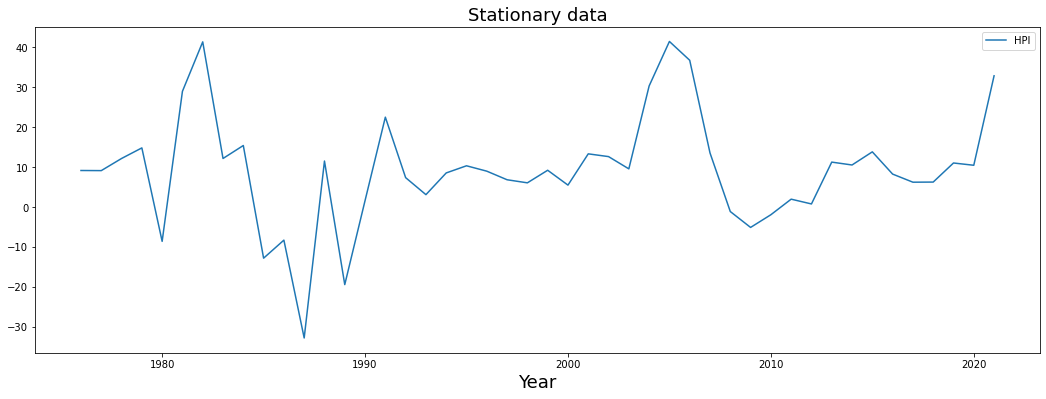

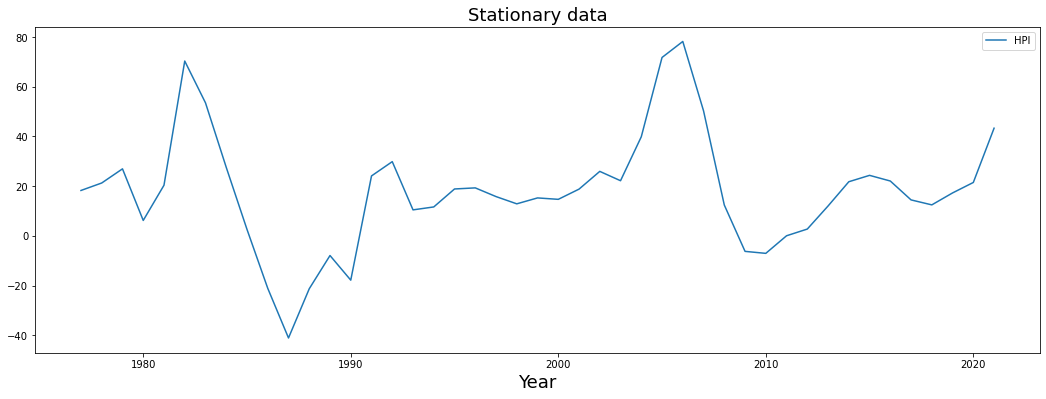

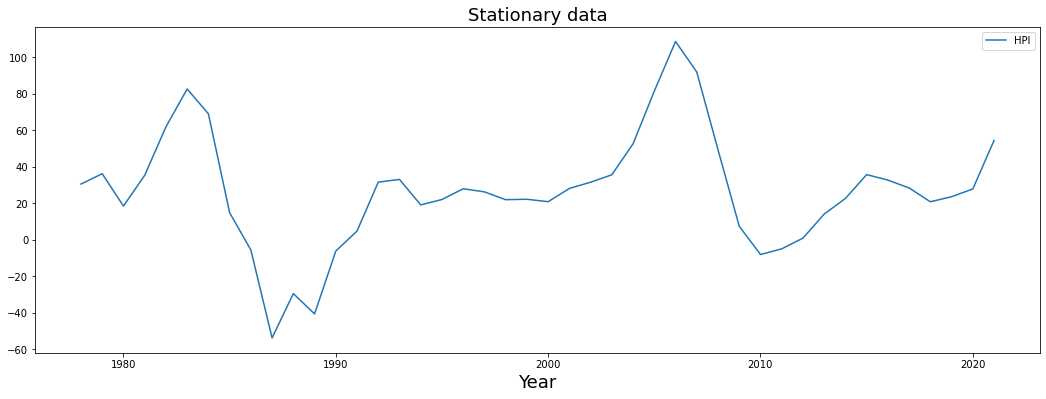

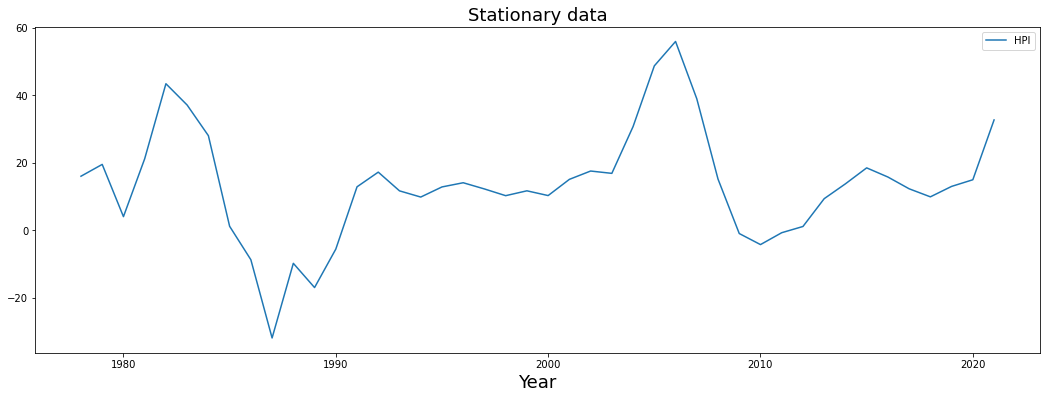

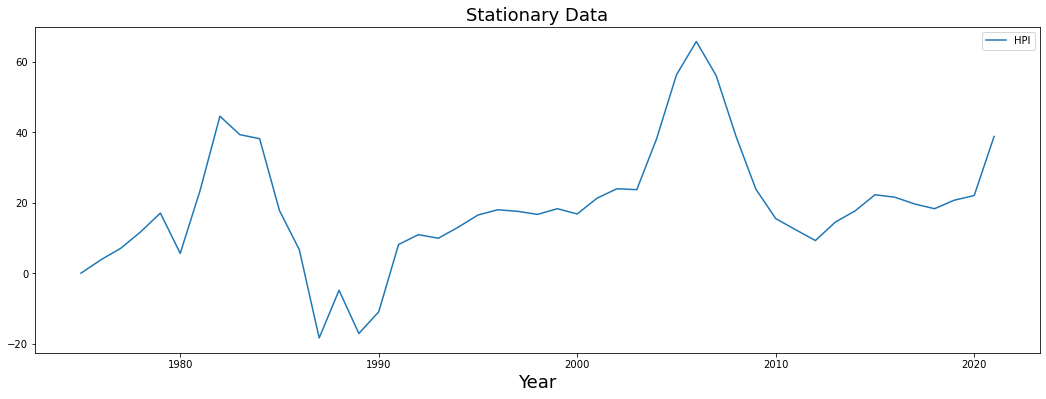

In [25]:
test_state(Alaska)

# California
diff(California) 

Differencing:


Test Statistic                 -4.172682
p-value                         0.000733
#Lags Used                      1.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64

None
Second order differencing:


Test Statistic                 -3.679251
p-value                         0.004415
#Lags Used                      3.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64

None
Third order differencing:


Test Statistic                 -3.784142
p-value                         0.003074
#Lags Used                     10.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                 -3.005797
p-value                         0.034357
#Lags Used                      3.000000
Number of Observations Used    40.000000
Critical Value (1%)            -3.605565
Critical Value (5%)            -2.937069
Critical Value (10%)           -2.606986
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                 -2.775856
p-value                         0.061806
#Lags Used                      3.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64

None


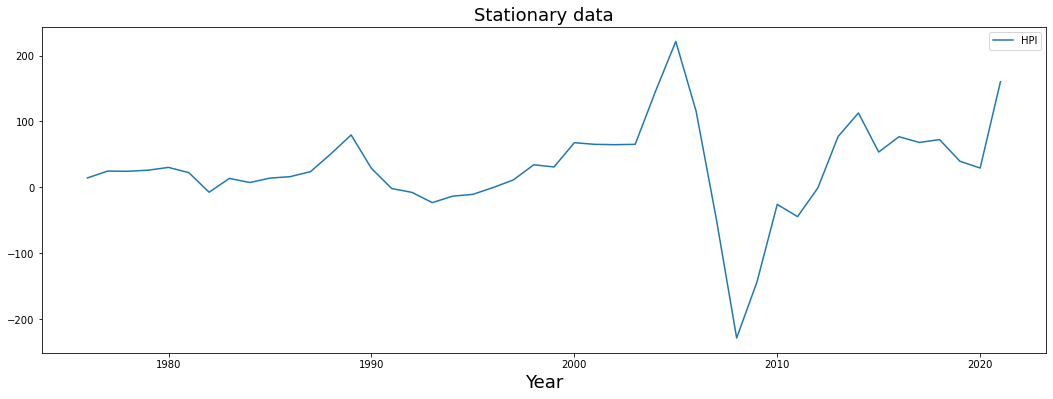

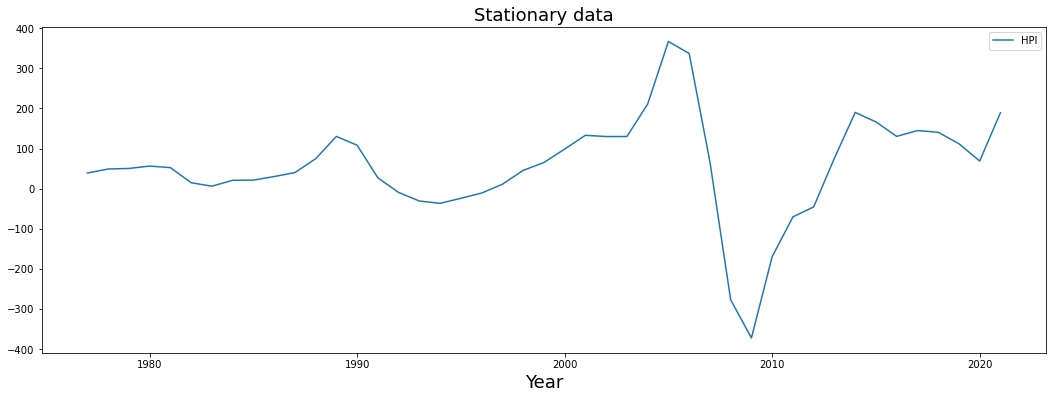

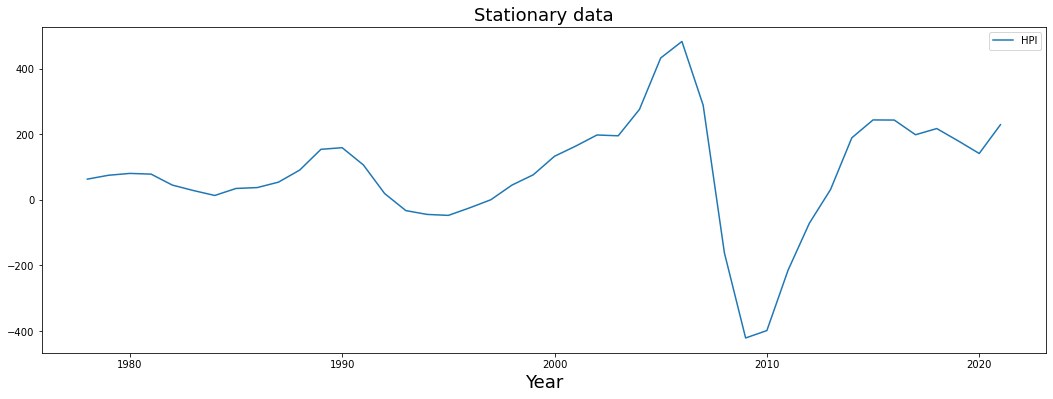

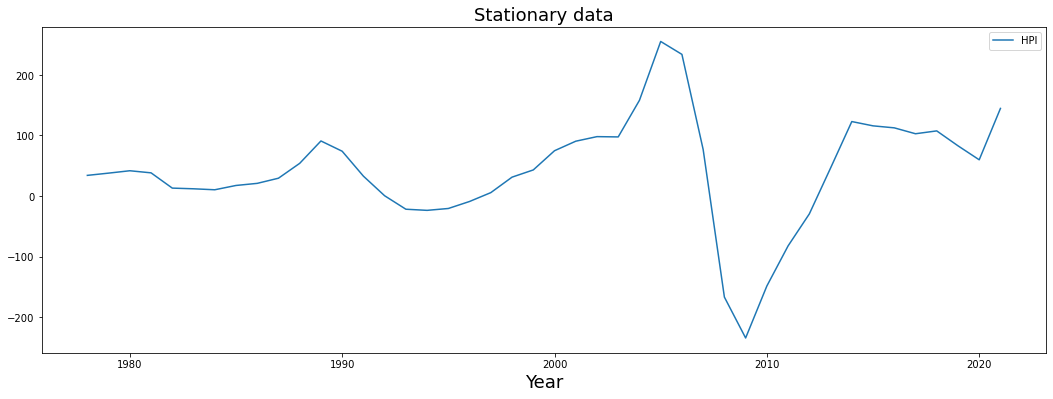

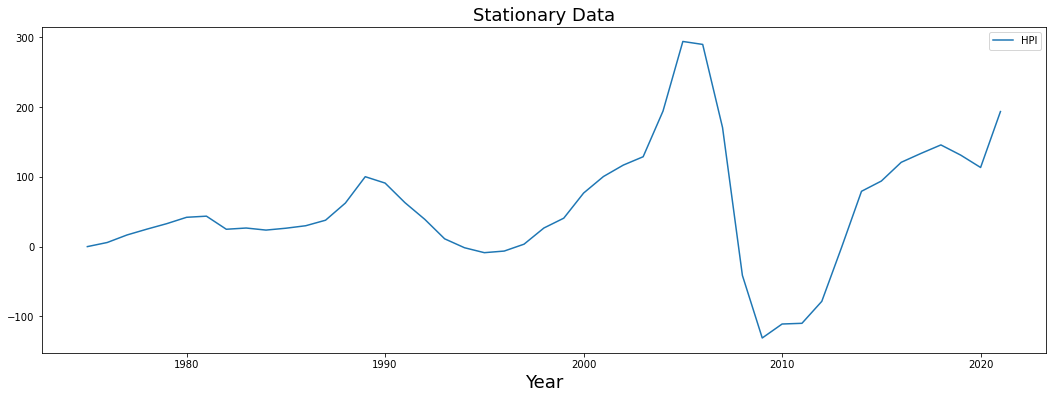

In [26]:
test_state(California)

### Arizona
diff(Arizona)

Differencing:


Test Statistic                 -3.739708
p-value                         0.003588
#Lags Used                      1.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64

None
Second order differencing:


Test Statistic                 -2.821032
p-value                         0.055332
#Lags Used                     10.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64

None
Third order differencing:


Test Statistic                 -3.445569
p-value                         0.009500
#Lags Used                     10.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                 -1.481302
p-value                         0.542740
#Lags Used                      2.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                 -1.213172
p-value                         0.667904
#Lags Used                      2.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64

None


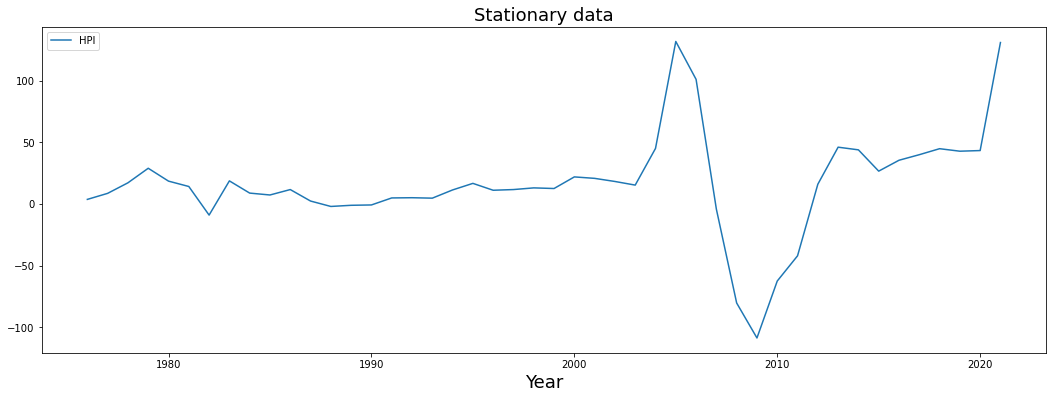

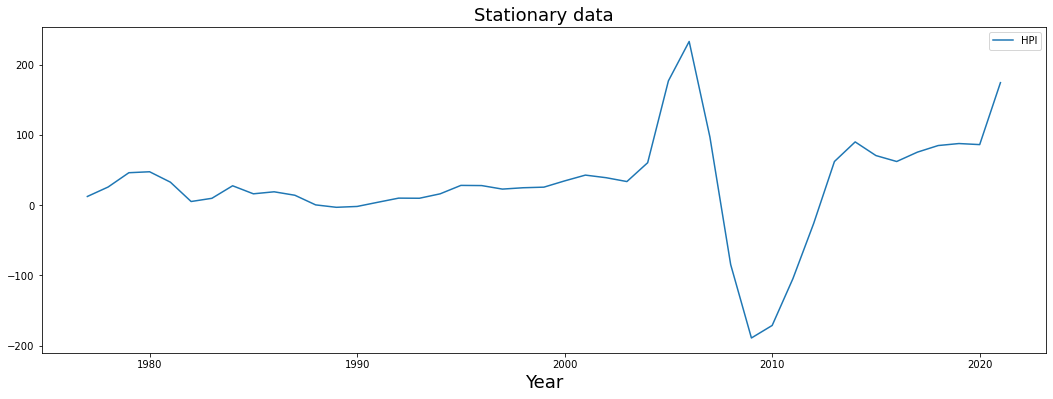

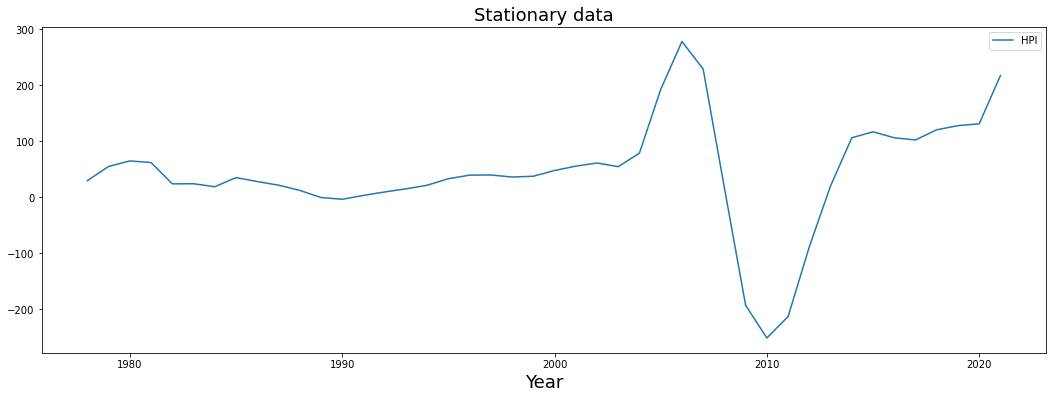

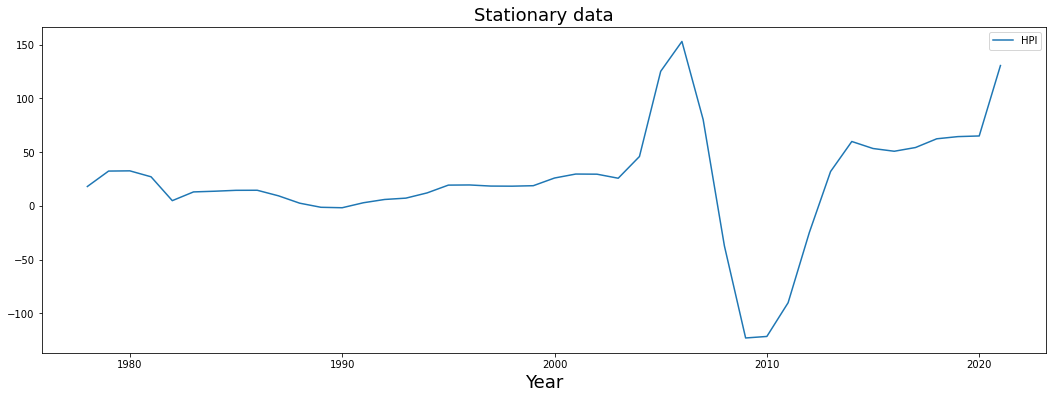

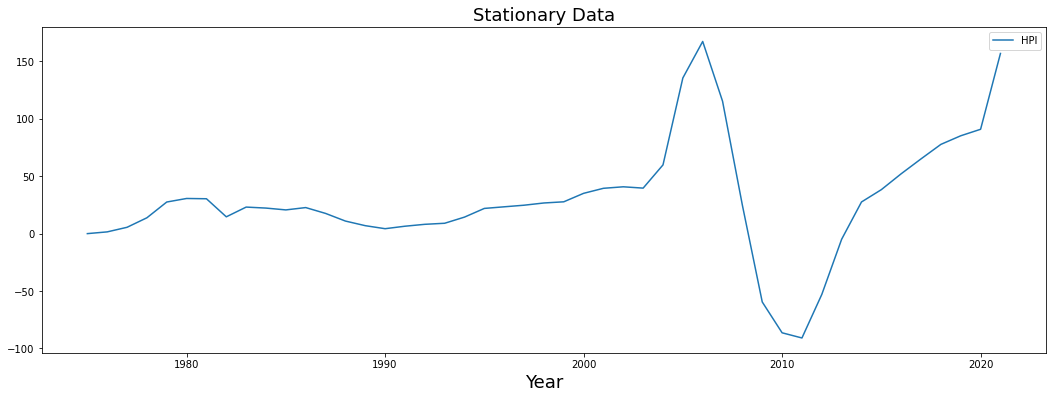

In [27]:
test_state(Arizona)

### Colorado
N/A

Differencing:


Test Statistic                 -0.957540
p-value                         0.768434
#Lags Used                      0.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64

None
Second order differencing:


Test Statistic                 -0.072985
p-value                         0.952064
#Lags Used                      2.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64

None
Third order differencing:


Test Statistic                  0.101684
p-value                         0.966176
#Lags Used                      2.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                  0.300189
p-value                         0.977353
#Lags Used                      2.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                  0.824314
p-value                         0.992019
#Lags Used                      2.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64

None


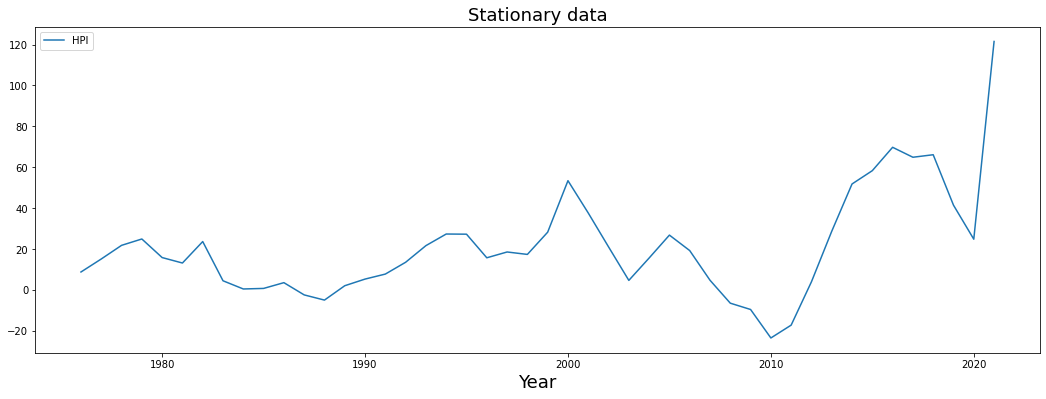

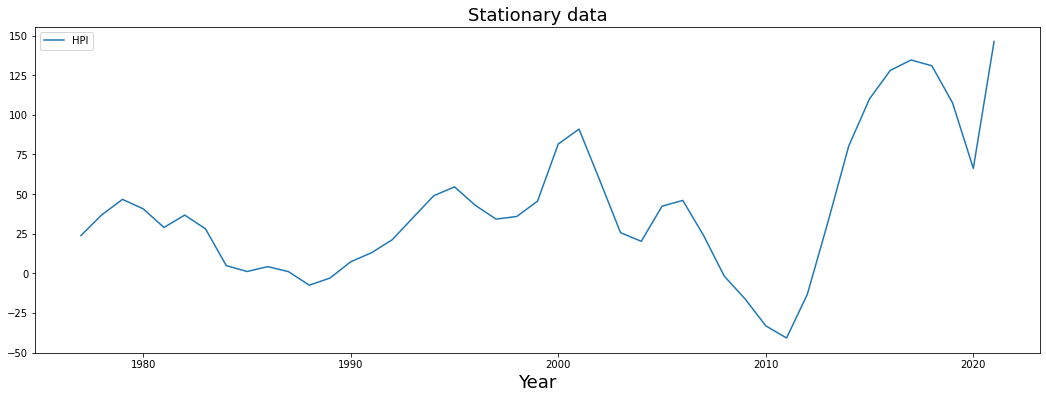

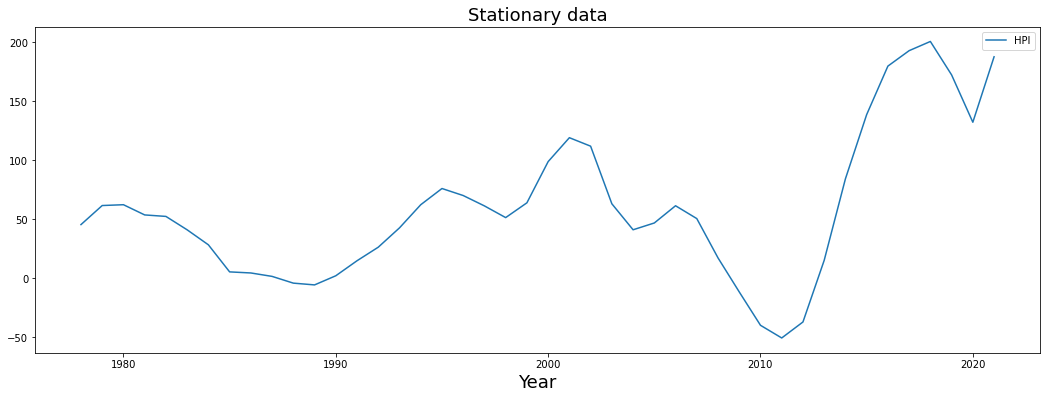

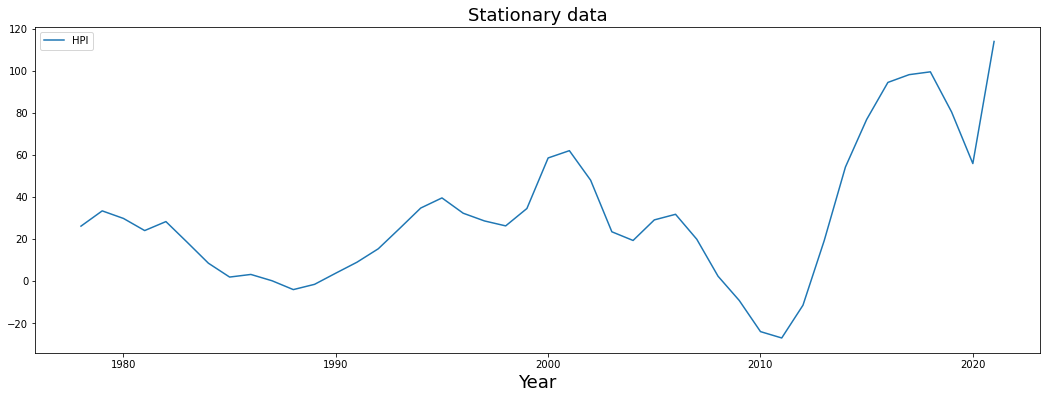

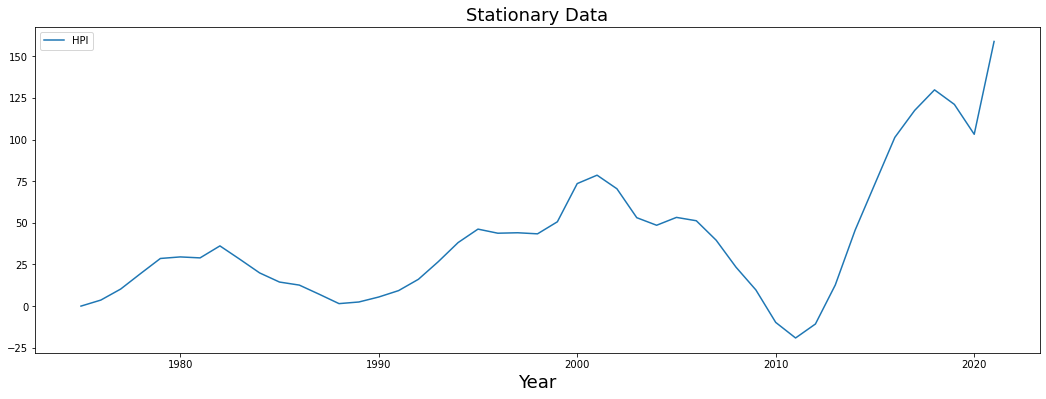

In [28]:
test_state(Colorado)

### Connecticut
third_order_diff(Connecticut)

Differencing:


Test Statistic                 -2.927371
p-value                         0.042256
#Lags Used                      1.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64

None
Second order differencing:


Test Statistic                 -3.992659
p-value                         0.001449
#Lags Used                     10.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64

None
Third order differencing:


Test Statistic                 -4.643123
p-value                         0.000107
#Lags Used                     10.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                 -3.849060
p-value                         0.002443
#Lags Used                     10.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                 -4.158892
p-value                         0.000773
#Lags Used                     10.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64

None


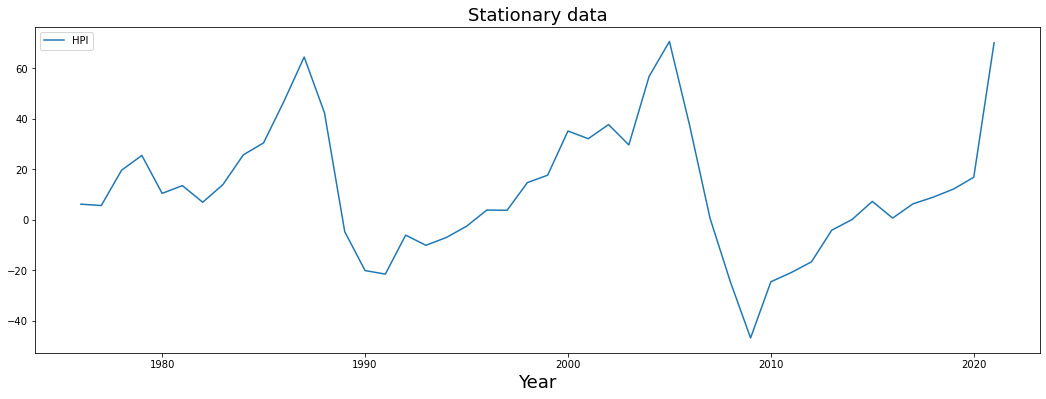

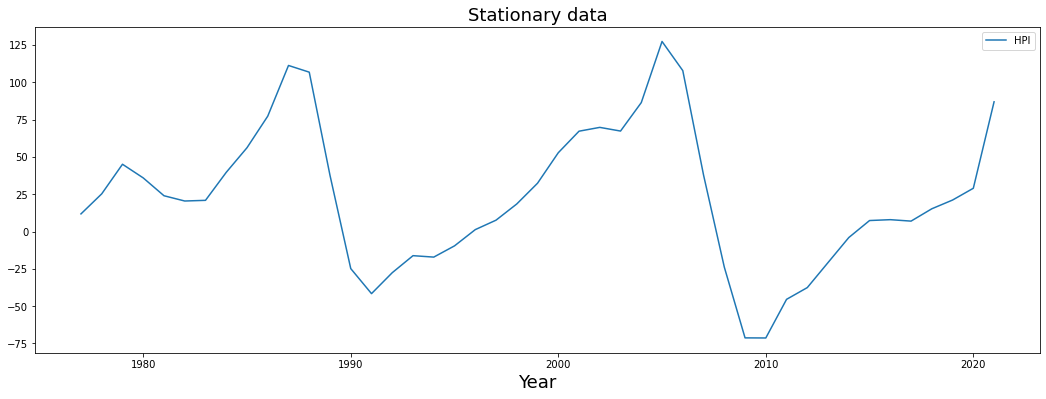

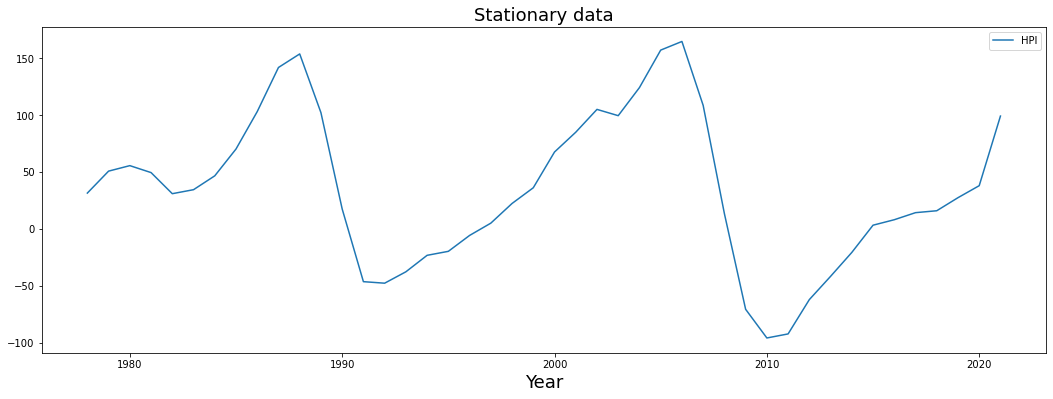

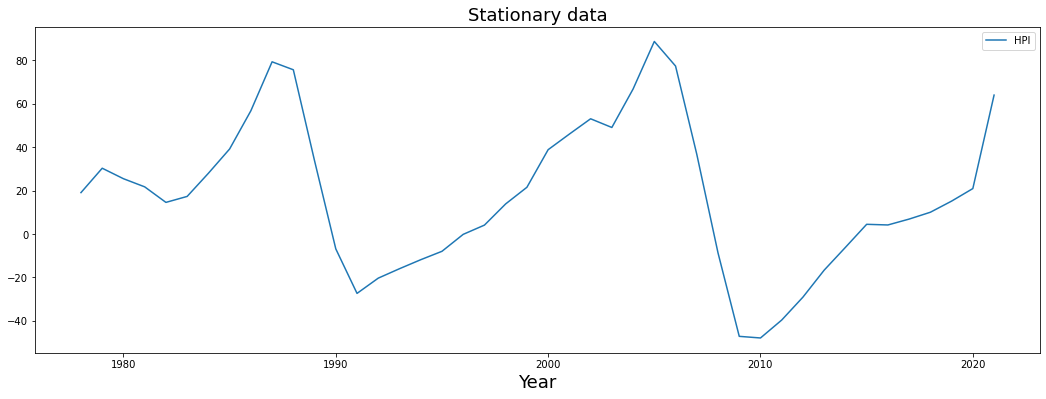

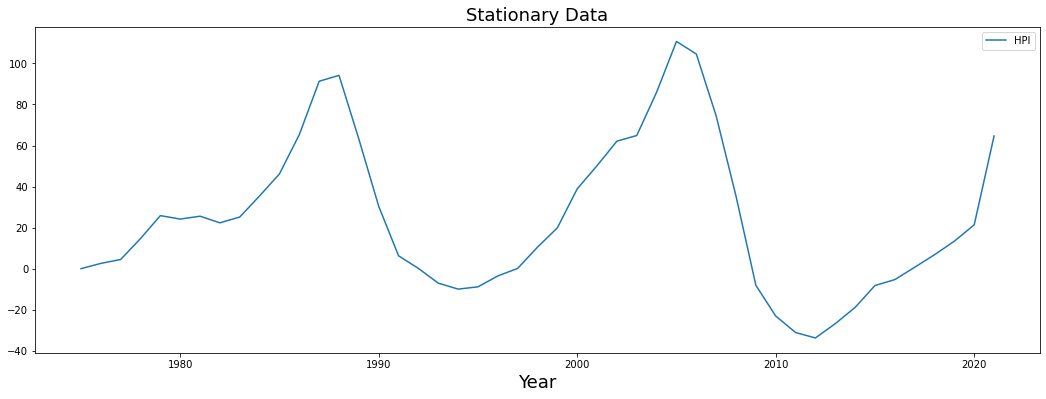

In [29]:
test_state(Connecticut)

### Illinois
srm(Illinois)

Differencing:


Test Statistic                 -2.732797
p-value                         0.068533
#Lags Used                      1.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64

None
Second order differencing:


Test Statistic                 -2.887747
p-value                         0.046792
#Lags Used                      2.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64

None
Third order differencing:


Test Statistic                 -3.187647
p-value                         0.020711
#Lags Used                      2.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                 -3.800120
p-value                         0.002906
#Lags Used                      1.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                 -3.283778
p-value                         0.015619
#Lags Used                      1.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64

None


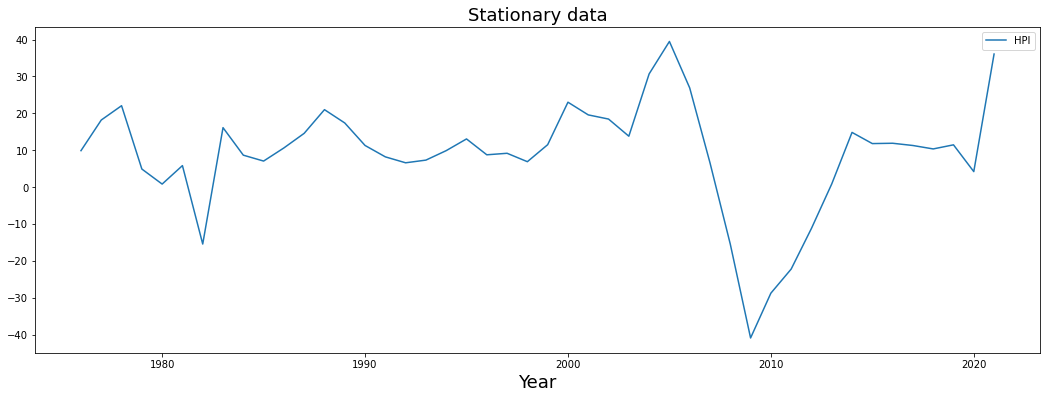

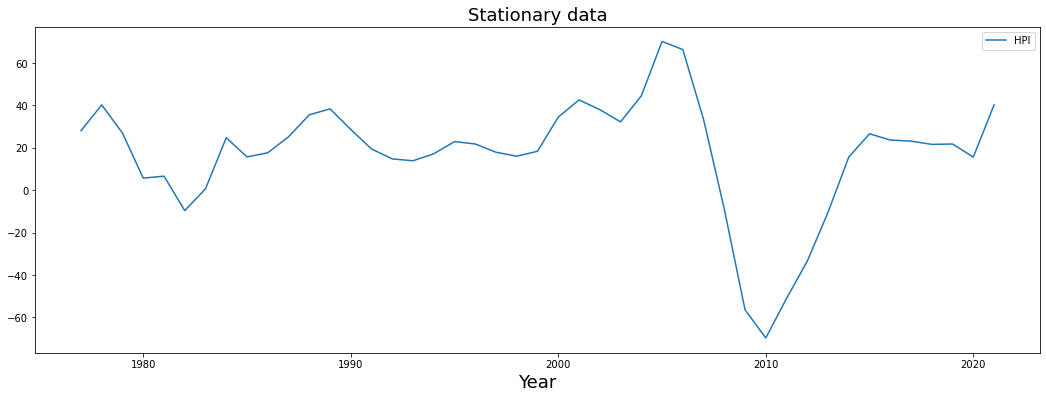

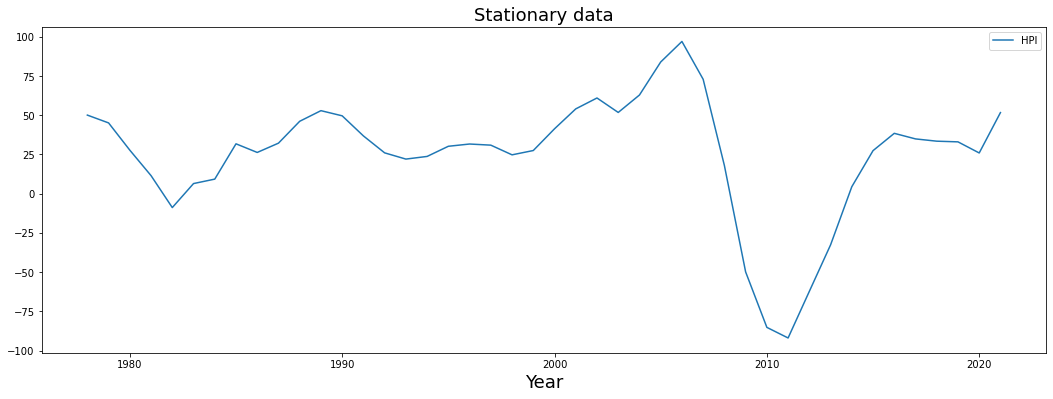

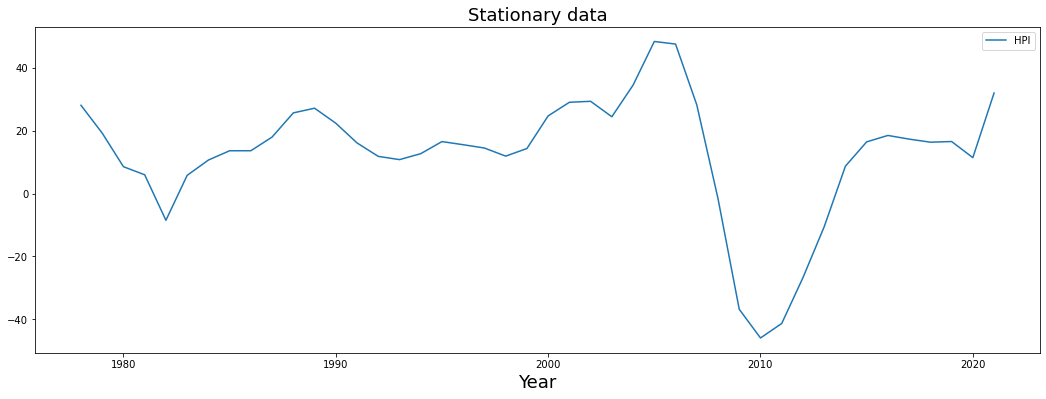

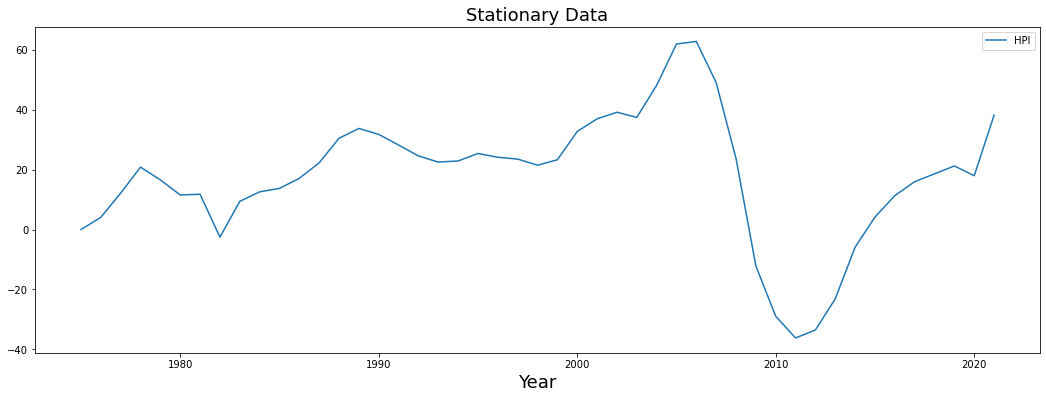

In [30]:
test_state(Illinois)

### Maine
second_order_diff(Maine)

Differencing:


Test Statistic                 -1.255482
p-value                         0.649286
#Lags Used                      1.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64

None
Second order differencing:


Test Statistic                 -3.729885
p-value                         0.003712
#Lags Used                     10.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64

None
Third order differencing:


Test Statistic                 -3.634356
p-value                         0.005137
#Lags Used                      9.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                 -3.728235
p-value                         0.003733
#Lags Used                     10.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                 -2.233748
p-value                         0.194226
#Lags Used                      3.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64

None


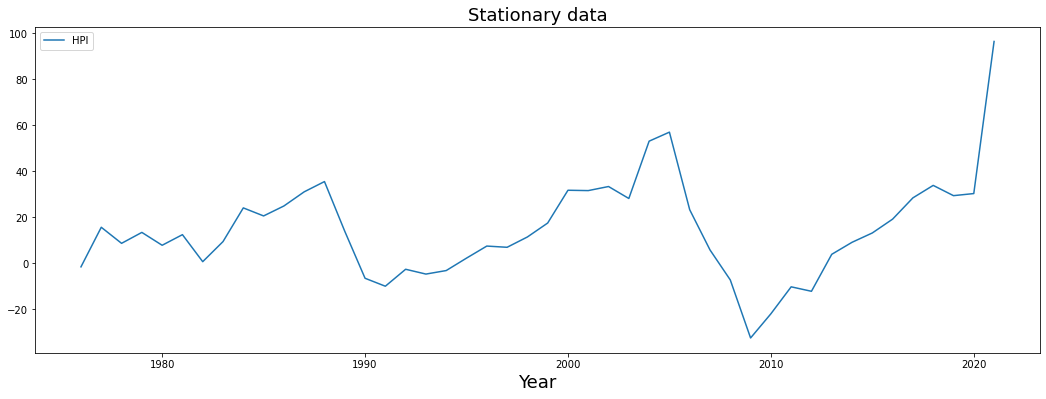

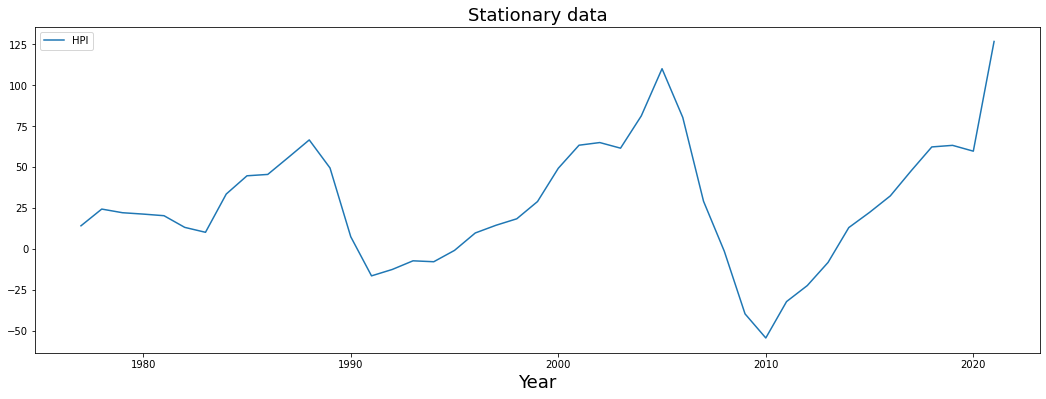

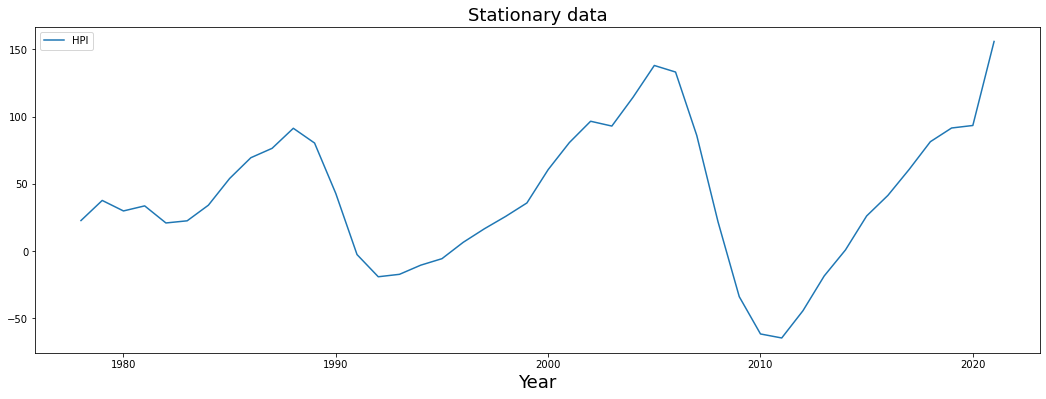

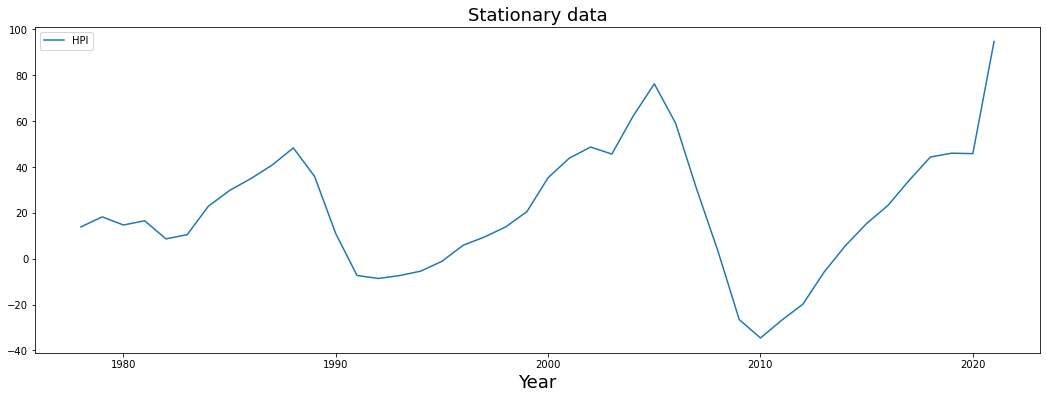

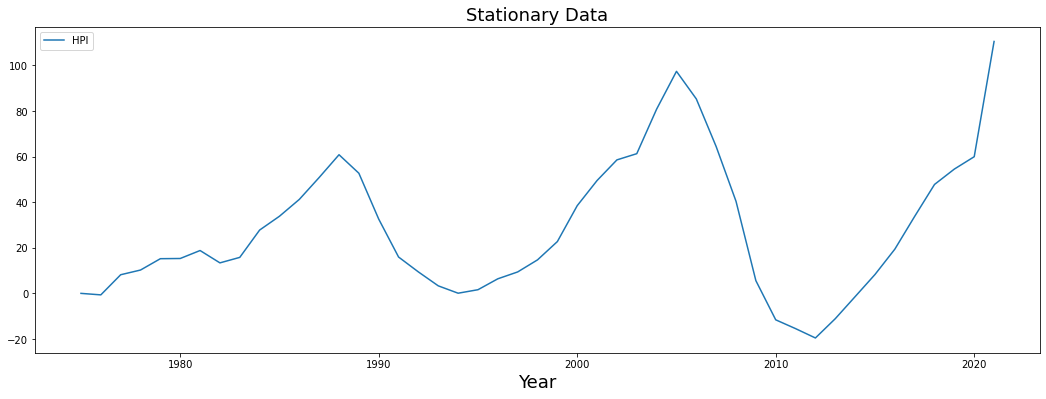

In [31]:
test_state(Maine)

### Maryland
third_order_diff(Maryland)

Differencing:


Test Statistic                 -4.046856
p-value                         0.001184
#Lags Used                      1.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64

None
Second order differencing:


Test Statistic                 -3.021910
p-value                         0.032898
#Lags Used                      7.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64

None
Third order differencing:


Test Statistic                 -4.742769
p-value                         0.000070
#Lags Used                     10.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                 -2.609740
p-value                         0.091001
#Lags Used                      3.000000
Number of Observations Used    40.000000
Critical Value (1%)            -3.605565
Critical Value (5%)            -2.937069
Critical Value (10%)           -2.606986
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                 -2.491277
p-value                         0.117611
#Lags Used                      2.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64

None


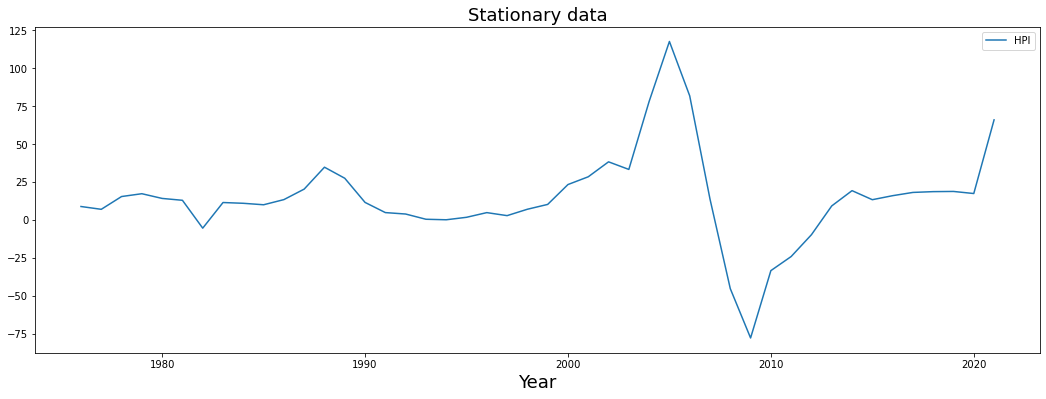

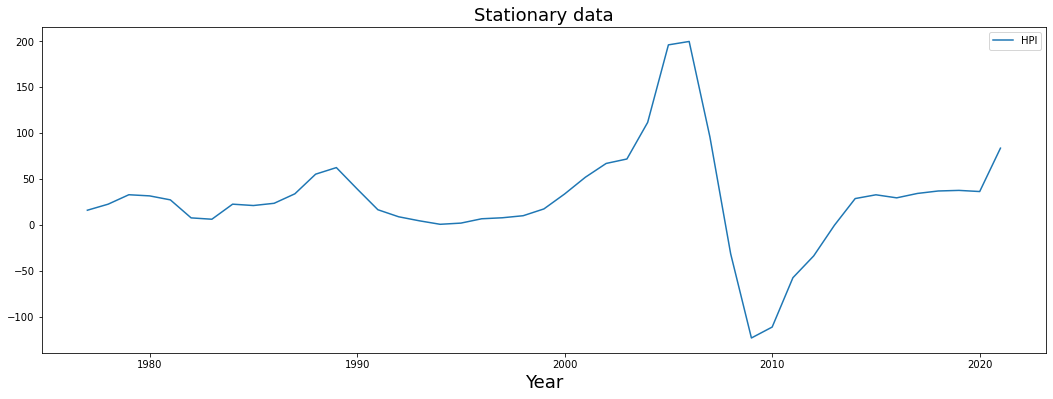

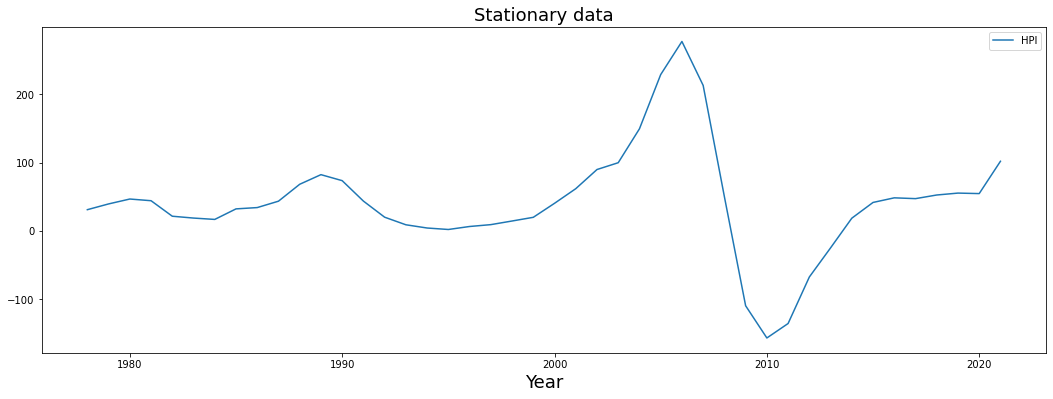

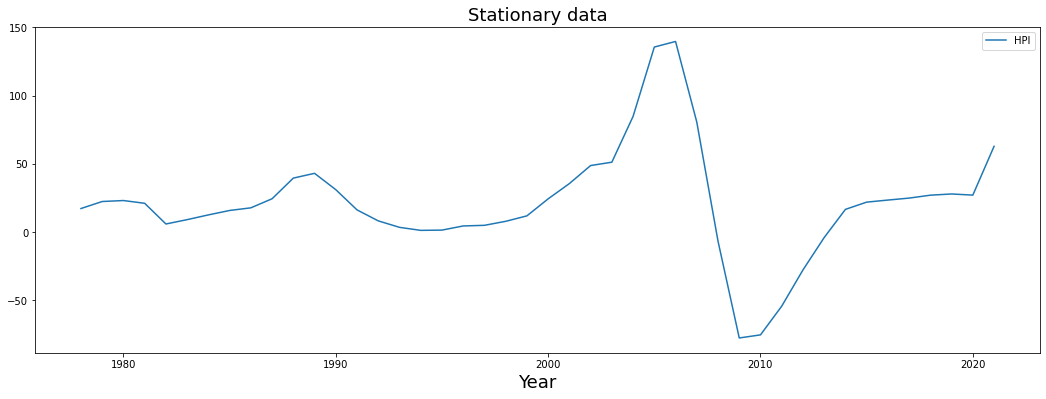

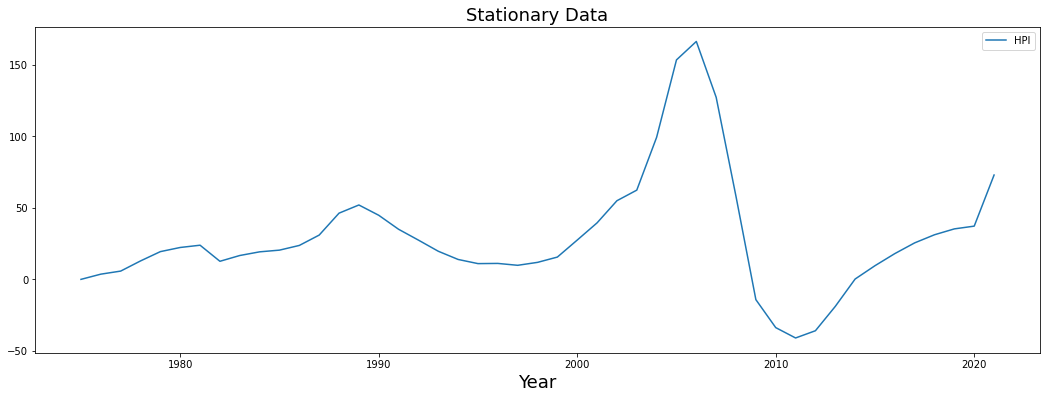

In [32]:
test_state(Maryland)

### Massachusetts
third_order_diff(Massachusetts)

Differencing:


Test Statistic                 -2.114185
p-value                         0.238849
#Lags Used                      1.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64

None
Second order differencing:


Test Statistic                 -2.913087
p-value                         0.043847
#Lags Used                      7.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64

None
Third order differencing:


Test Statistic                 -3.683313
p-value                         0.004354
#Lags Used                     10.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                 -2.907939
p-value                         0.044433
#Lags Used                      1.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                 -2.847053
p-value                         0.051860
#Lags Used                      1.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64

None


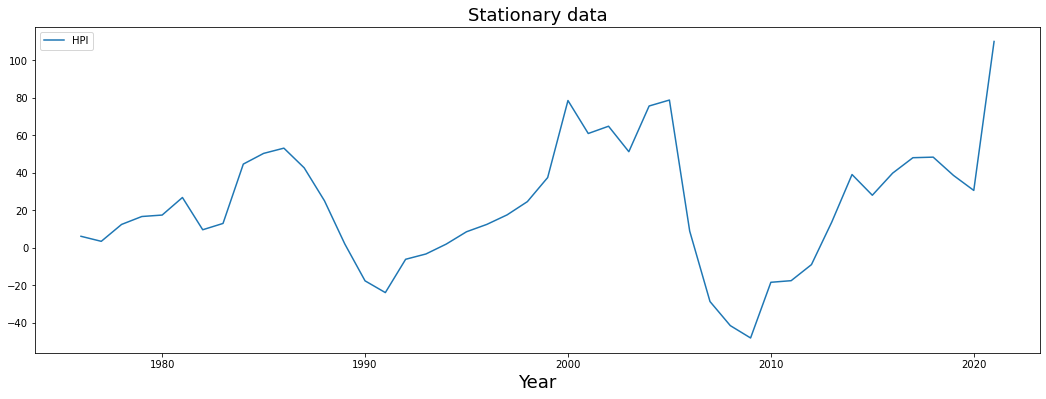

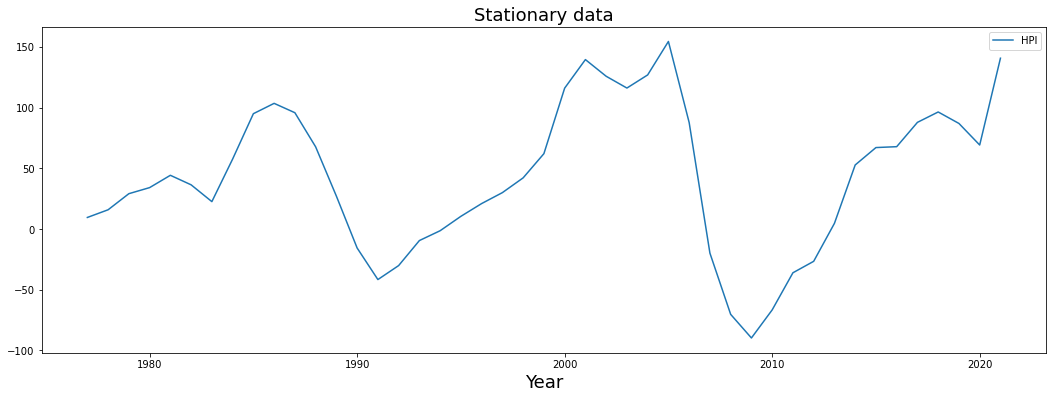

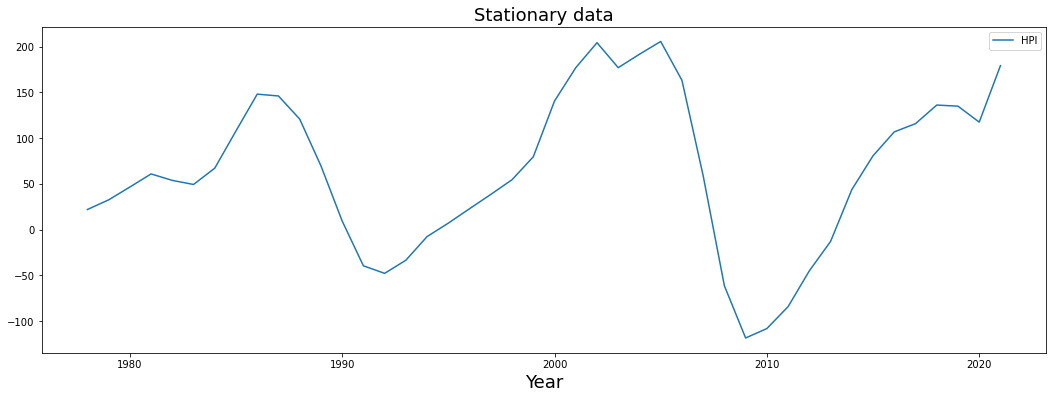

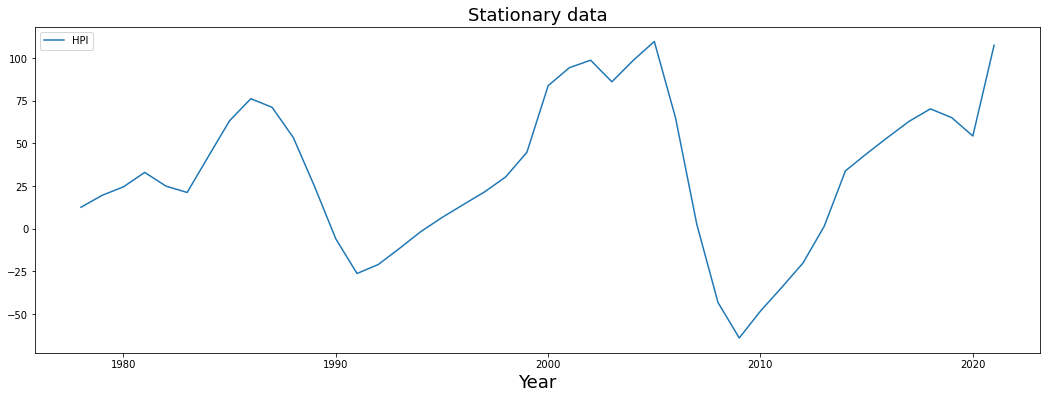

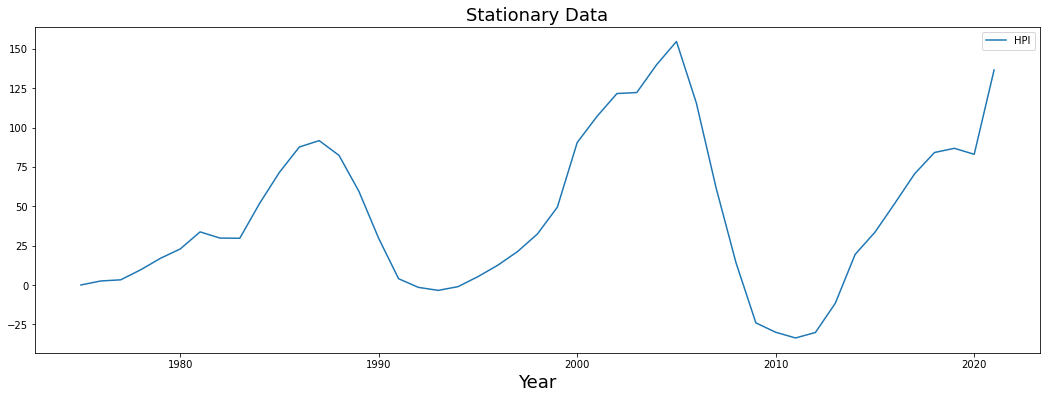

In [33]:
test_state(Massachusetts)

### Michigan
third_order_diff(Michigan): between 1% - 5% 

Differencing:


Test Statistic                 -1.635982
p-value                         0.464361
#Lags Used                      1.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64

None
Second order differencing:


Test Statistic                 -1.895108
p-value                         0.334366
#Lags Used                      3.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64

None
Third order differencing:


Test Statistic                 -3.125404
p-value                         0.024729
#Lags Used                     10.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                 -2.643201
p-value                         0.084393
#Lags Used                     10.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                 -2.944556
p-value                         0.040407
#Lags Used                      8.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64

None


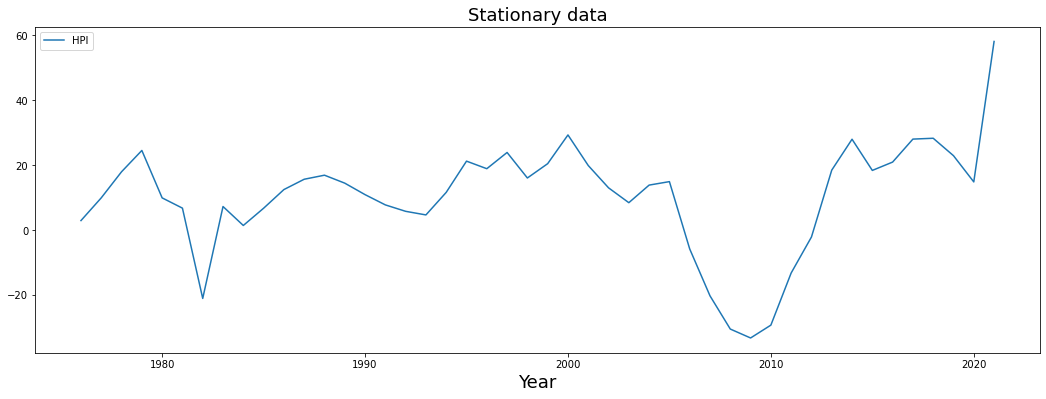

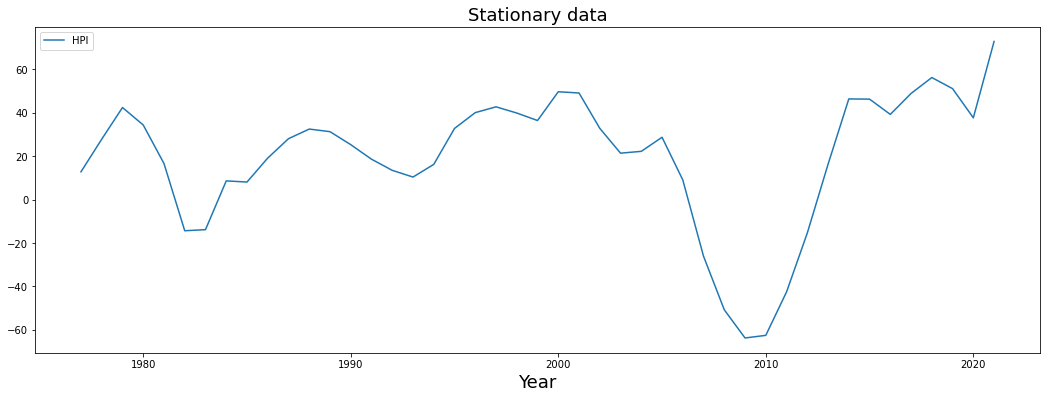

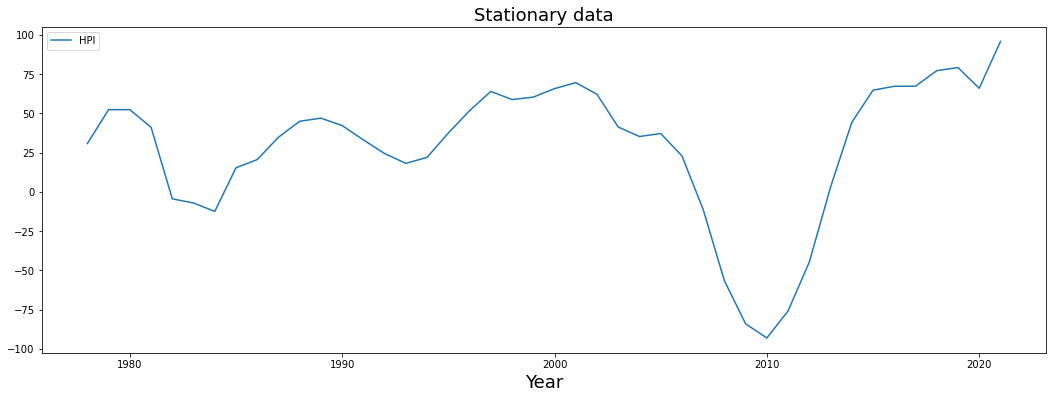

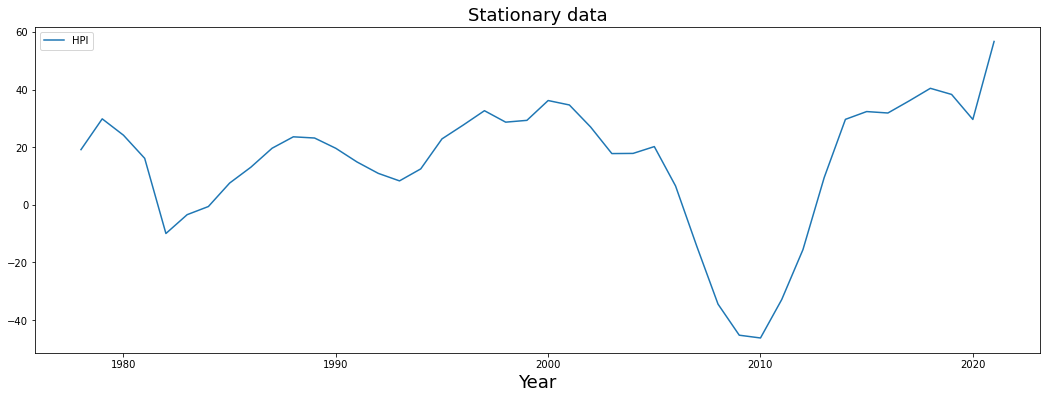

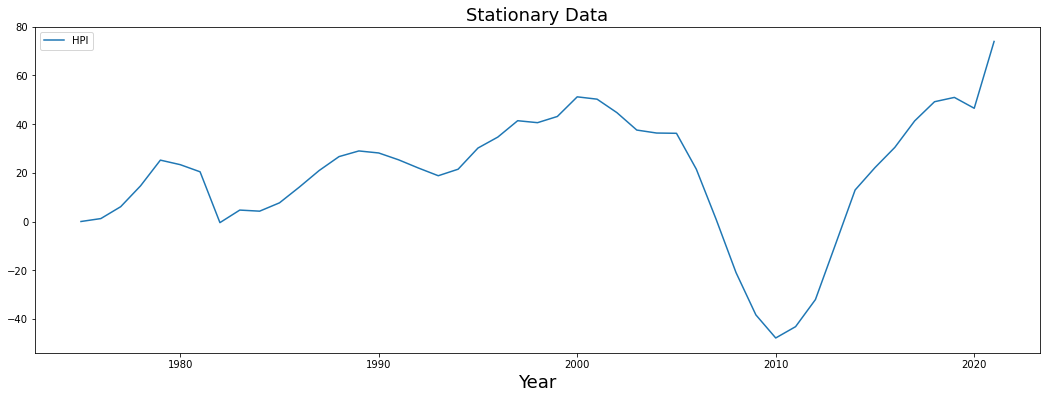

In [34]:
test_state(Michigan)

### Missouri
third_order_diff(Missouri)

Differencing:


Test Statistic                 -0.680842
p-value                         0.851650
#Lags Used                      0.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64

None
Second order differencing:


Test Statistic                 -2.201487
p-value                         0.205706
#Lags Used                      1.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64

None
Third order differencing:


Test Statistic                 -4.140457
p-value                         0.000830
#Lags Used                     10.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                 -1.829616
p-value                         0.365860
#Lags Used                      1.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                 -1.503451
p-value                         0.531804
#Lags Used                      1.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64

None


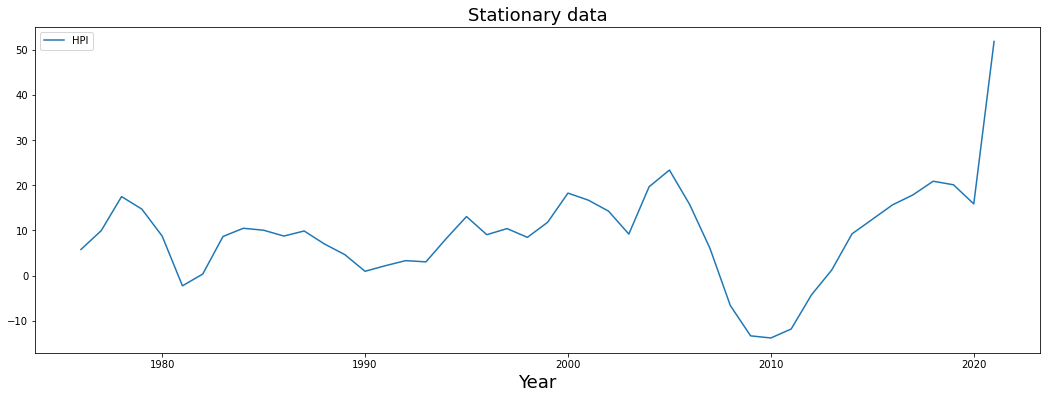

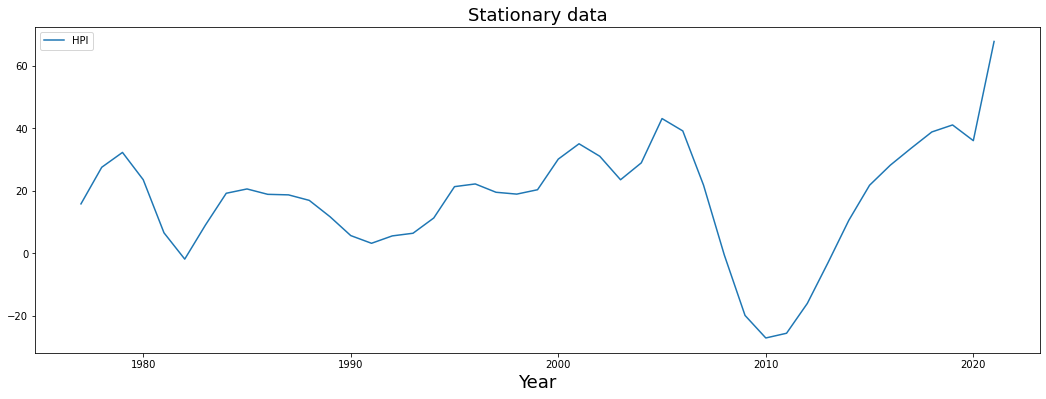

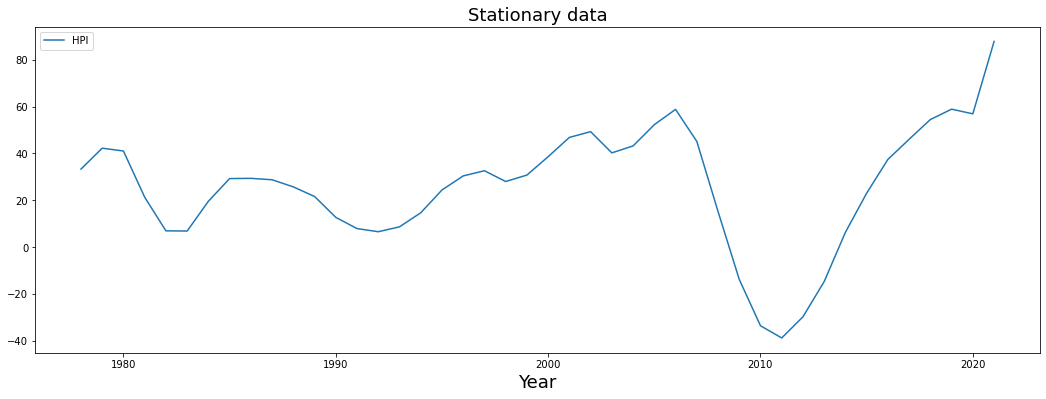

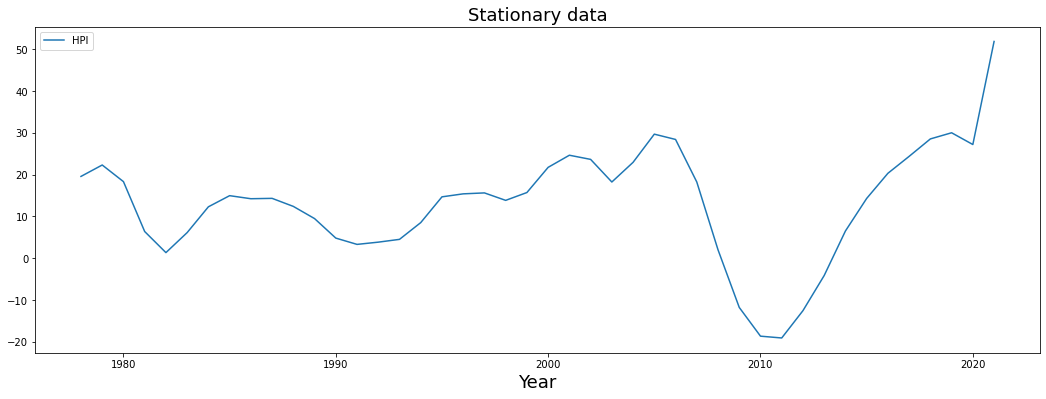

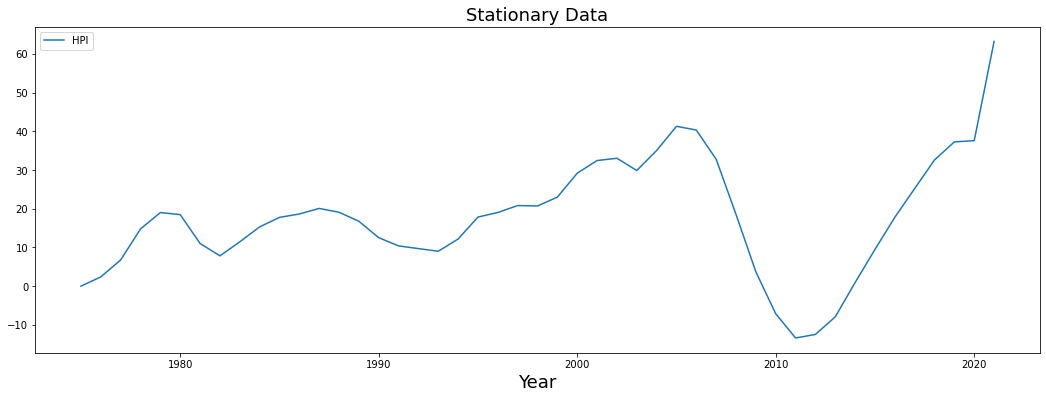

In [35]:
test_state(Missouri)

### Montana
N/A

Differencing:


Test Statistic                 -1.178189
p-value                         0.682907
#Lags Used                      2.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64

None
Second order differencing:


Test Statistic                 -0.620466
p-value                         0.866290
#Lags Used                      3.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64

None
Third order differencing:


Test Statistic                 -1.458269
p-value                         0.554045
#Lags Used                      2.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                 -0.338192
p-value                         0.919918
#Lags Used                      7.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                 -0.218176
p-value                         0.936320
#Lags Used                      2.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64

None


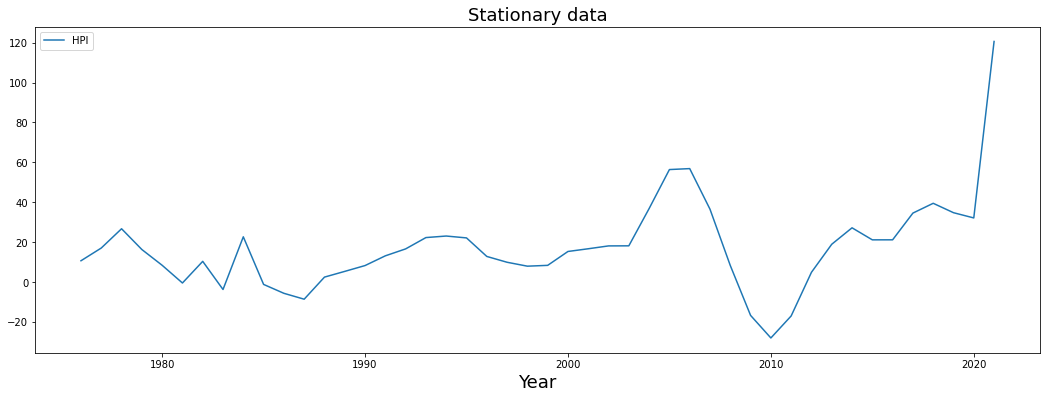

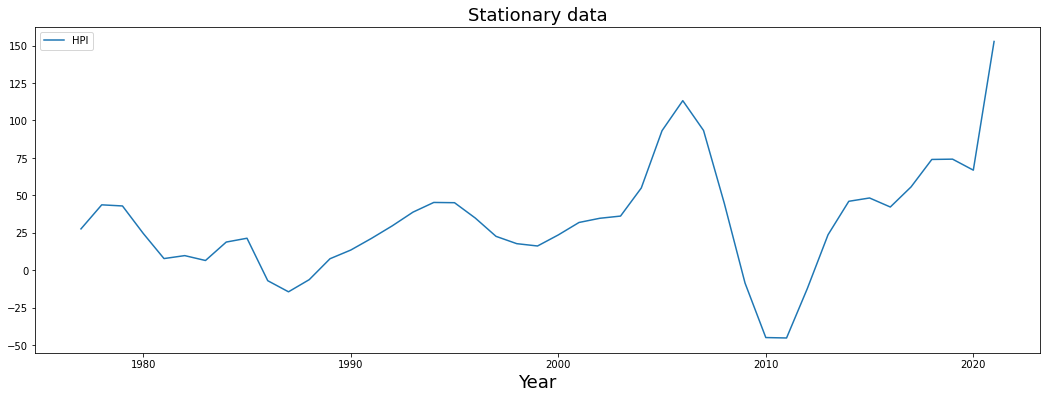

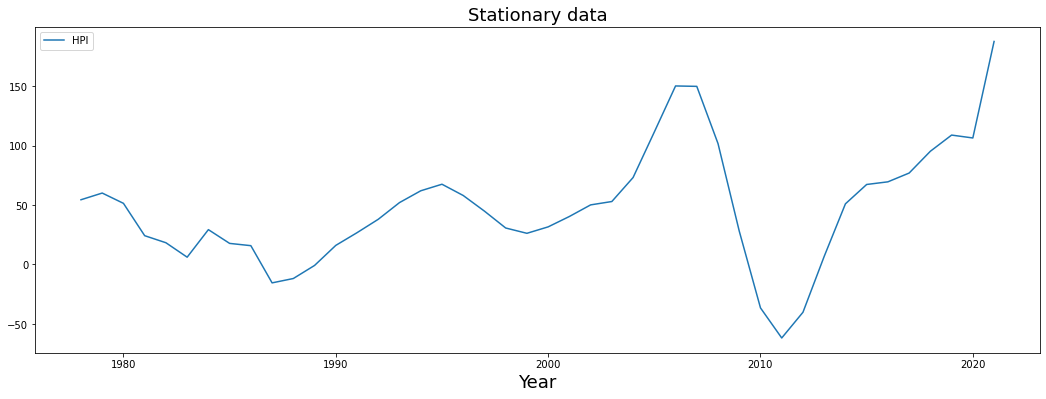

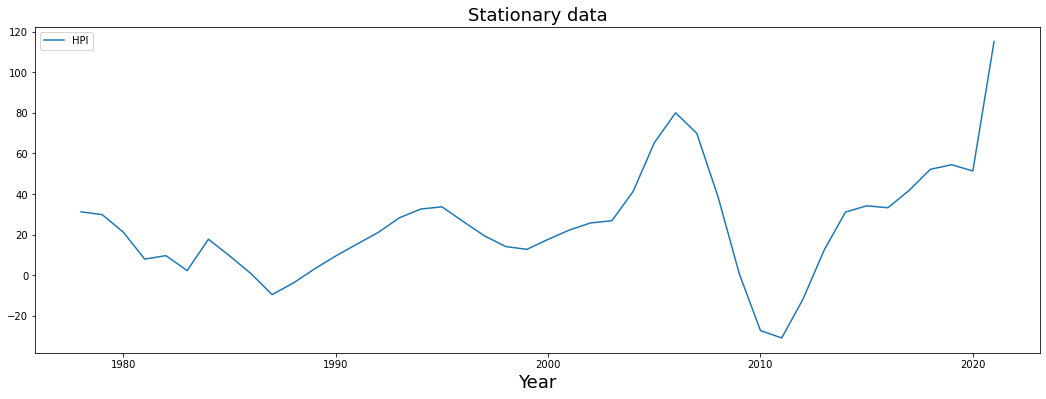

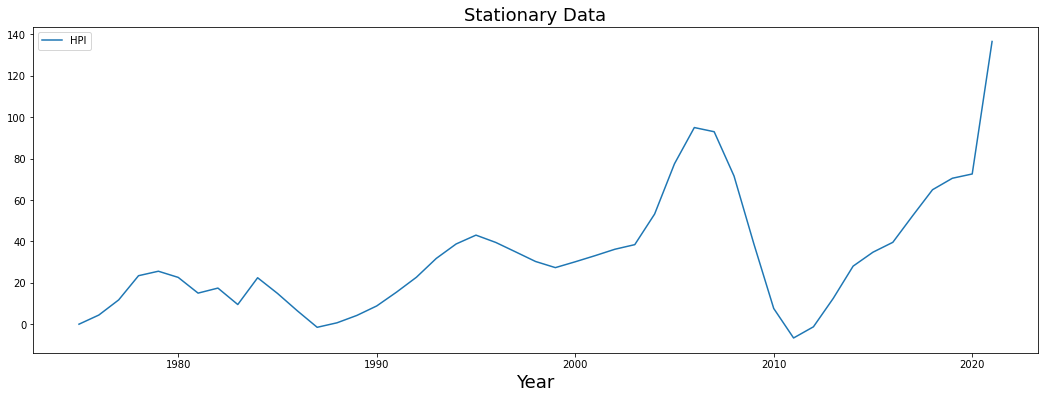

In [36]:
test_state(Montana)

### New Jersey
second_order_differencing(New_Jersey) <br>
third_order_differencing(New_Jersey)

Differencing:


Test Statistic                 -3.100989
p-value                         0.026480
#Lags Used                      1.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64

None
Second order differencing:


Test Statistic                 -3.813141
p-value                         0.002776
#Lags Used                     10.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64

None
Third order differencing:


Test Statistic                 -5.431694
p-value                         0.000003
#Lags Used                     10.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                 -3.633256
p-value                         0.005156
#Lags Used                     10.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                 -3.524459
p-value                         0.007381
#Lags Used                     10.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64

None


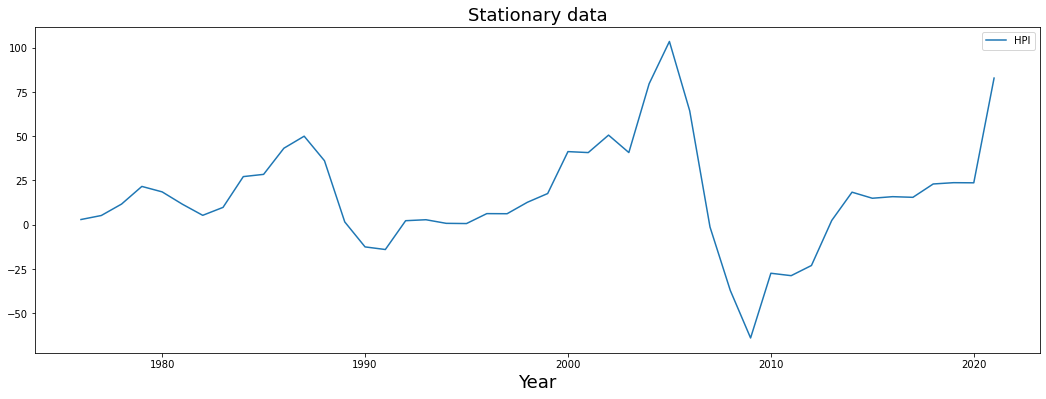

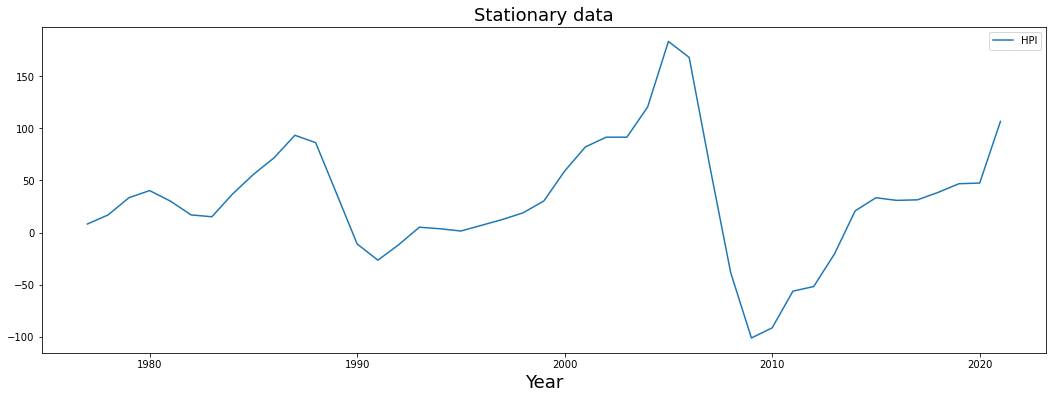

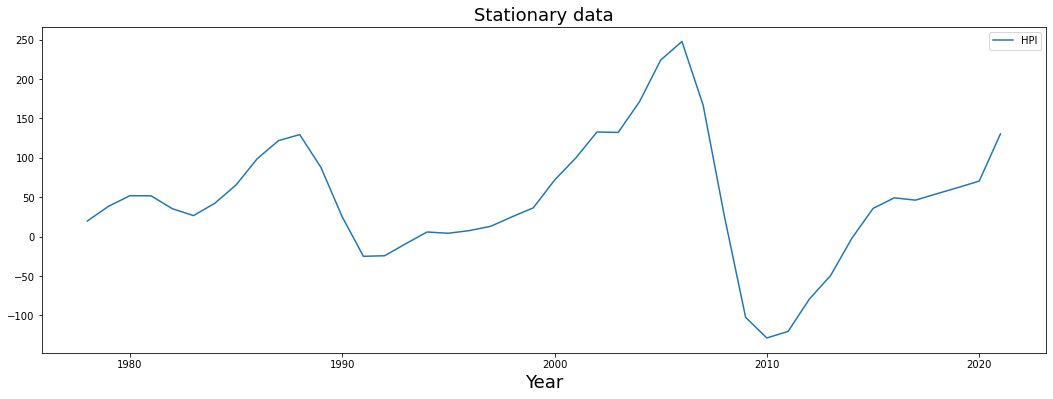

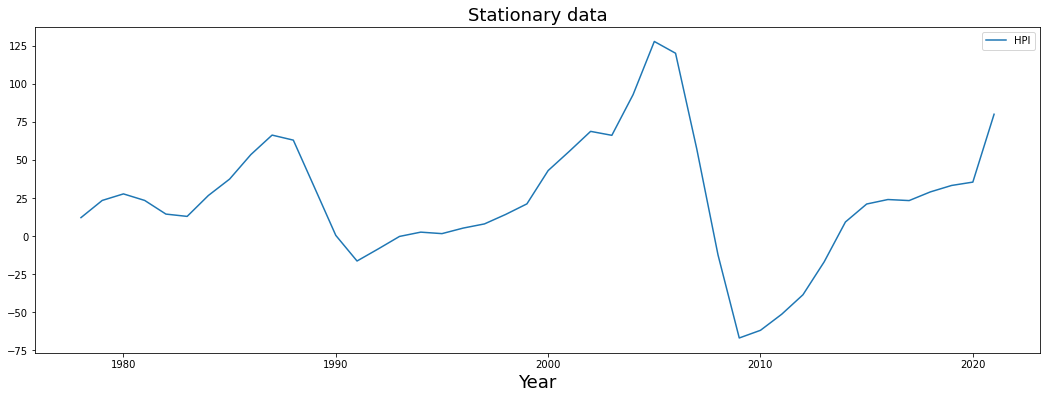

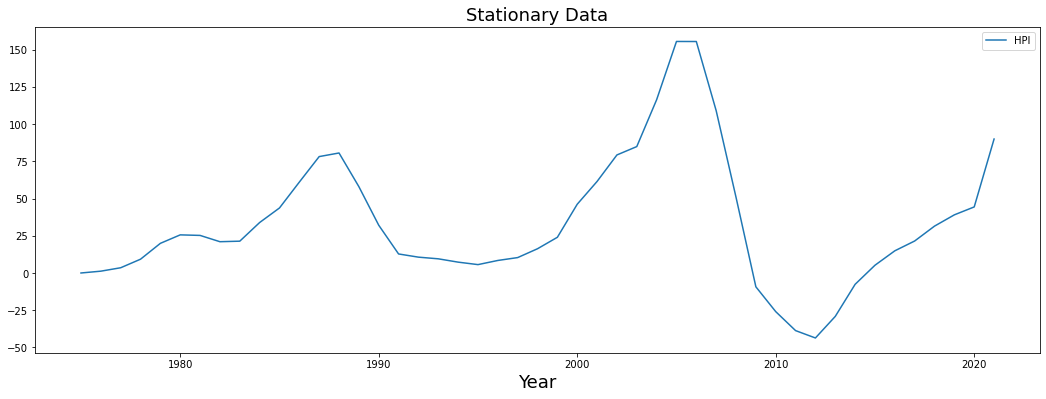

In [37]:
test_state(New_Jersey)

### New Mexico
third_order_diff(New_Mexico) 1% - 5% 

Differencing:


Test Statistic                 -2.640074
p-value                         0.084994
#Lags Used                      1.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64

None
Second order differencing:


Test Statistic                 -3.351247
p-value                         0.012737
#Lags Used                     10.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64

None
Third order differencing:


Test Statistic                 -3.586213
p-value                         0.006030
#Lags Used                     10.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                 -1.732445
p-value                         0.414478
#Lags Used                      2.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                 -2.019995
p-value                         0.277875
#Lags Used                      2.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64

None


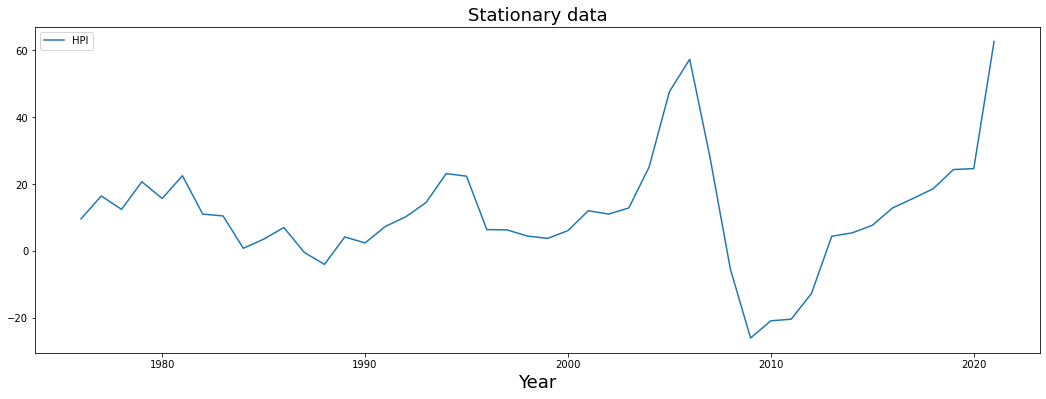

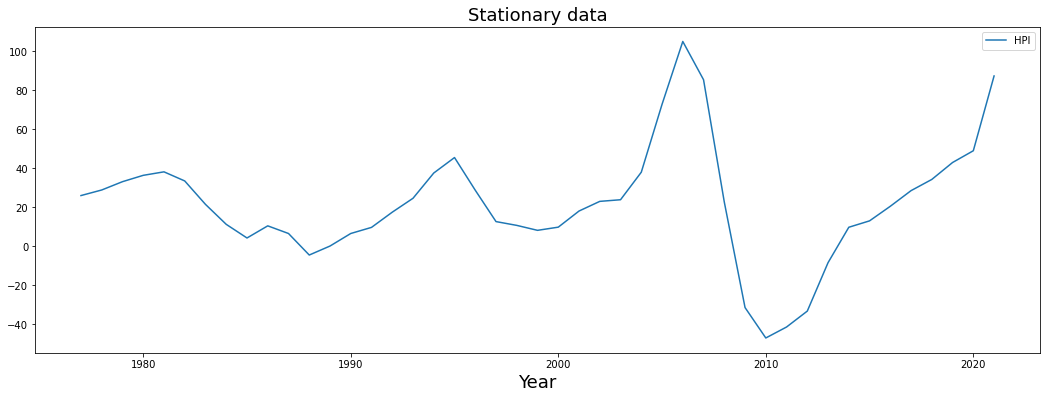

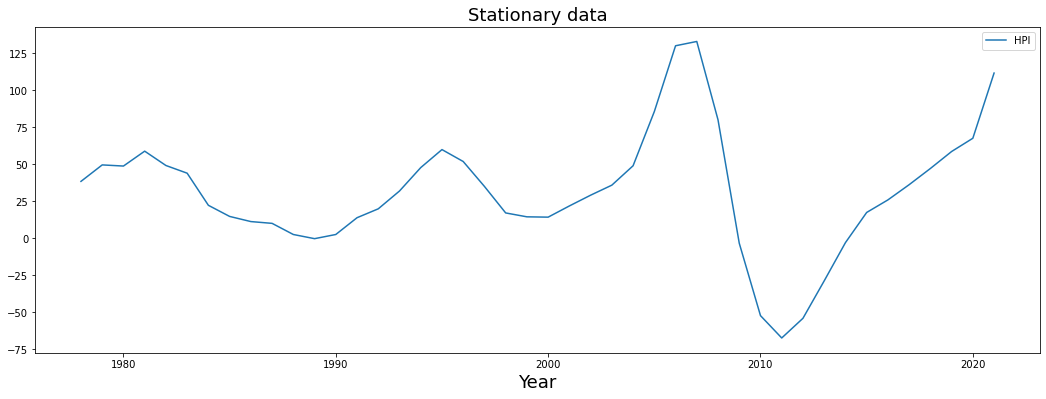

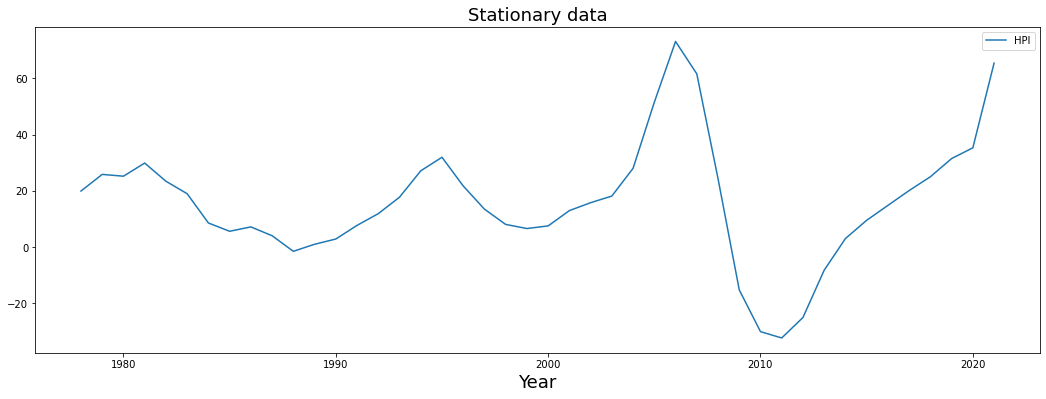

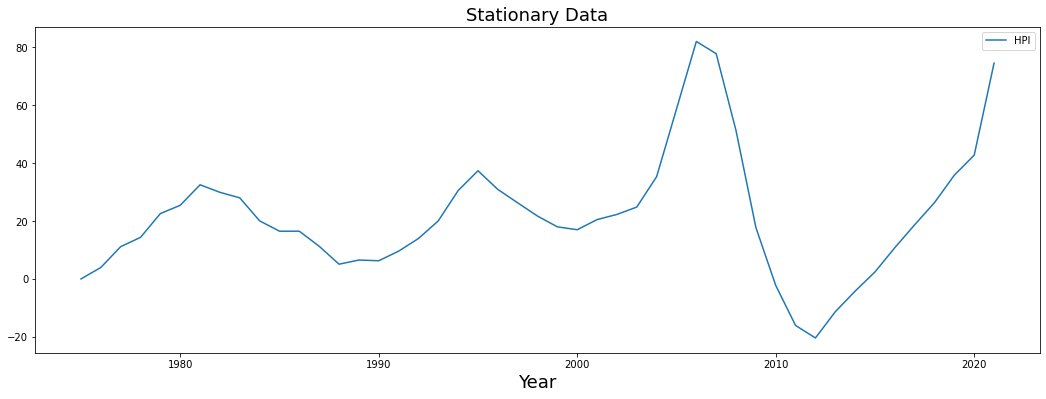

In [38]:
test_state(New_Mexico)

### New York
third_order_diff(New_York)

Differencing:


Test Statistic                 -2.294573
p-value                         0.173724
#Lags Used                      1.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64

None
Second order differencing:


Test Statistic                 -3.113144
p-value                         0.025596
#Lags Used                      9.000000
Number of Observations Used    35.000000
Critical Value (1%)            -3.632743
Critical Value (5%)            -2.948510
Critical Value (10%)           -2.613017
dtype: float64

None
Third order differencing:


Test Statistic                 -4.254506
p-value                         0.000532
#Lags Used                     10.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                 -3.596486
p-value                         0.005829
#Lags Used                     10.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                 -3.336129
p-value                         0.013339
#Lags Used                      1.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64

None


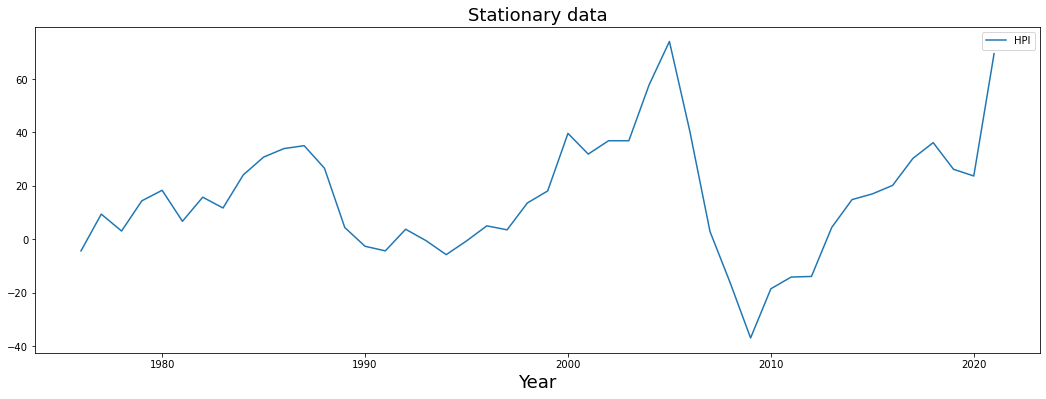

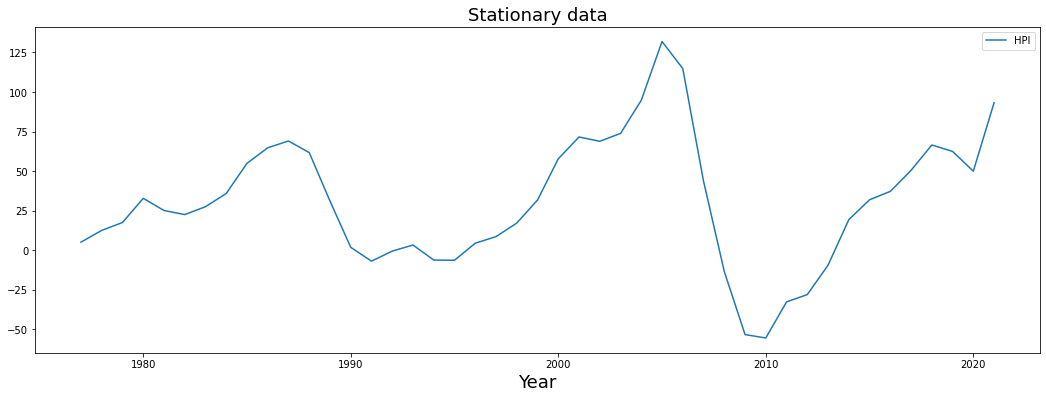

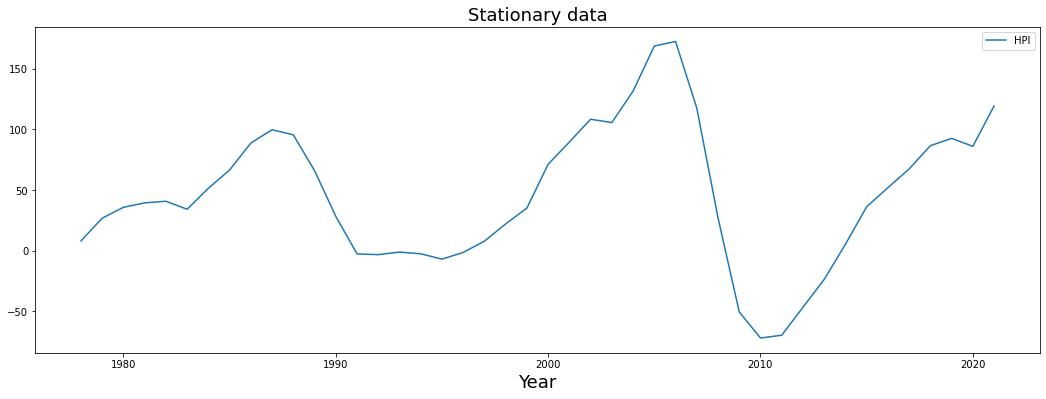

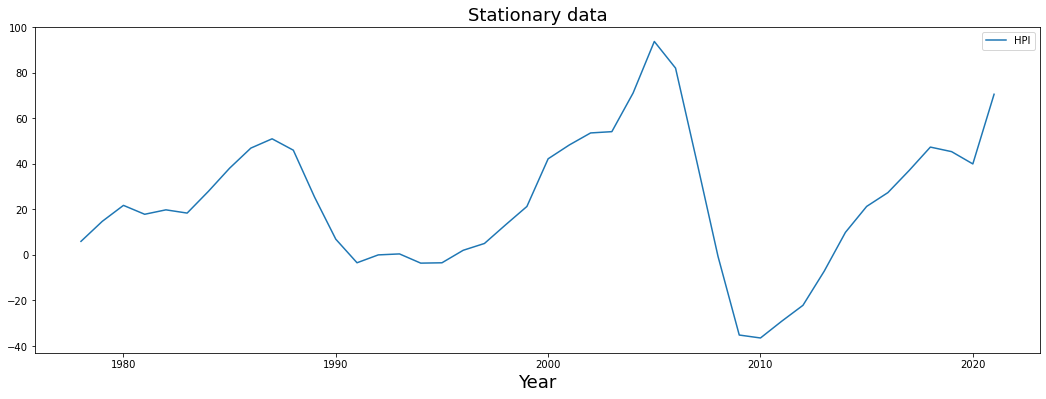

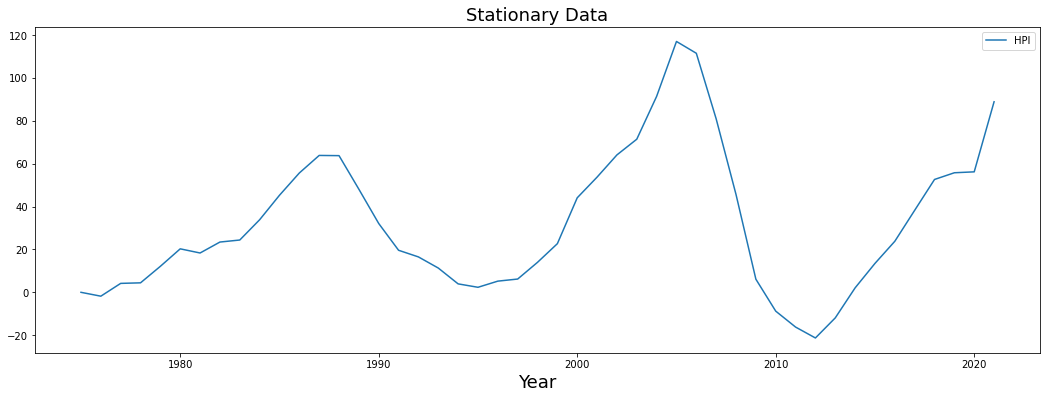

In [39]:
test_state(New_York)

### Nevada
third_order_diff(Nevada)

Differencing:


Test Statistic                 -3.696400
p-value                         0.004164
#Lags Used                      1.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64

None
Second order differencing:


Test Statistic                 -2.379432
p-value                         0.147626
#Lags Used                      7.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64

None
Third order differencing:


Test Statistic                 -4.044596
p-value                         0.001194
#Lags Used                     10.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                 -2.490786
p-value                         0.117732
#Lags Used                      3.000000
Number of Observations Used    40.000000
Critical Value (1%)            -3.605565
Critical Value (5%)            -2.937069
Critical Value (10%)           -2.606986
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                 -2.643615
p-value                         0.084314
#Lags Used                      7.000000
Number of Observations Used    39.000000
Critical Value (1%)            -3.610400
Critical Value (5%)            -2.939109
Critical Value (10%)           -2.608063
dtype: float64

None


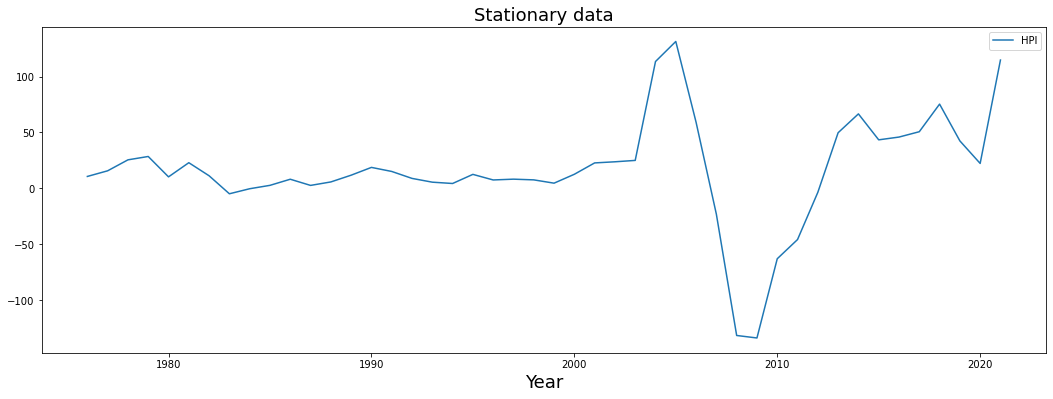

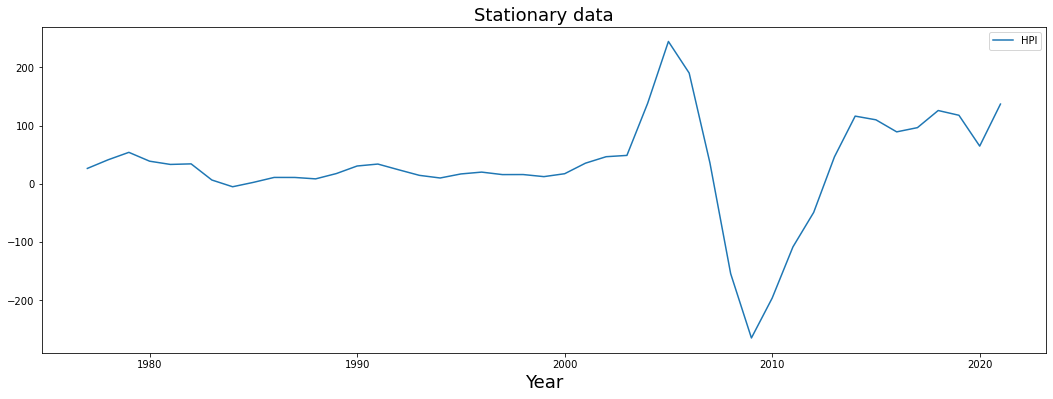

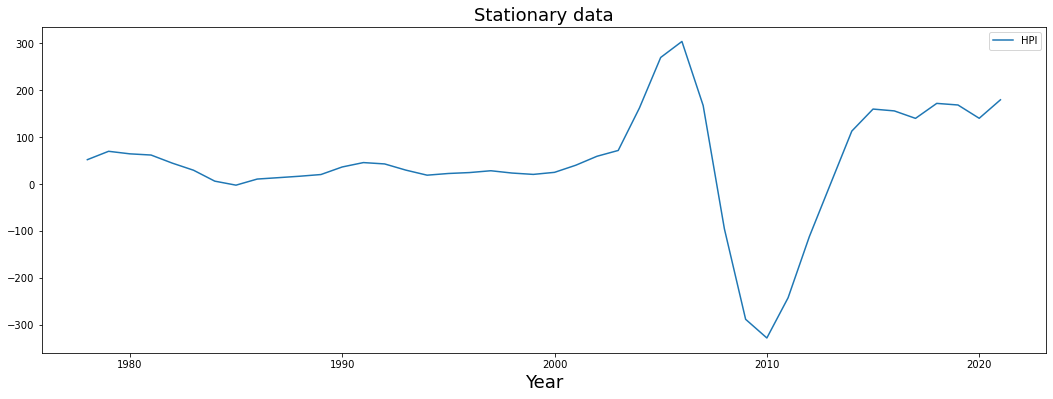

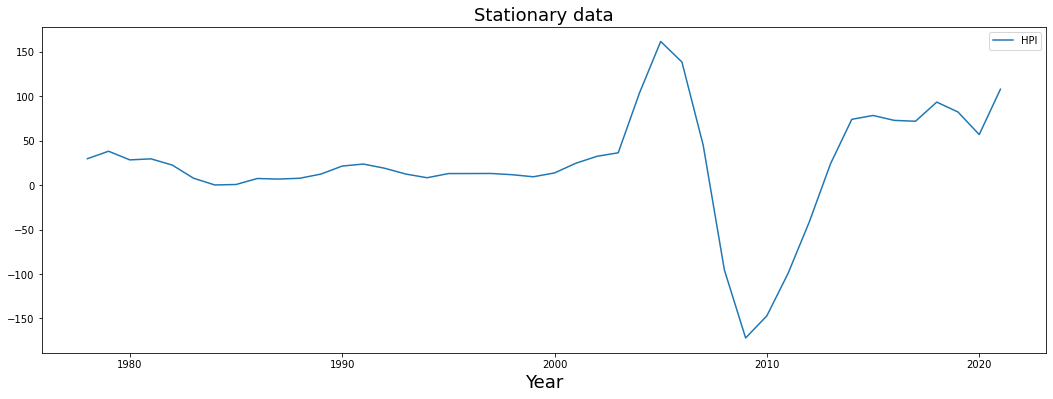

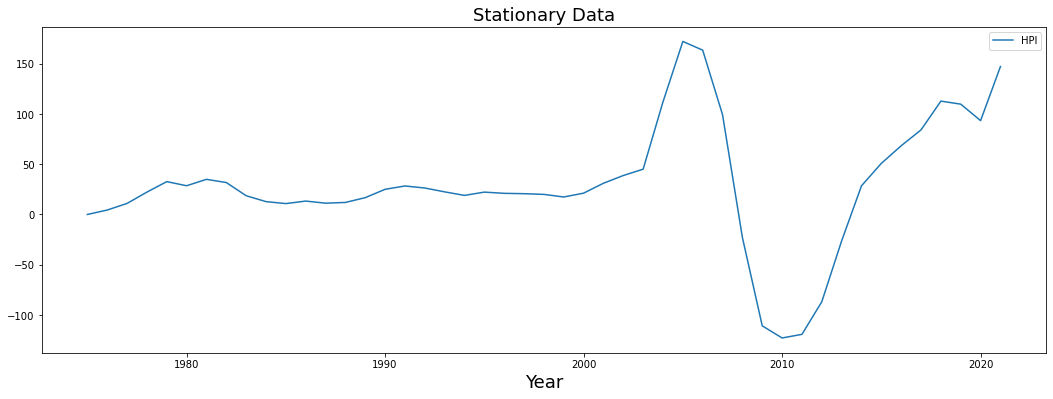

In [40]:
test_state(Nevada)

### Oregon
N/A

Differencing:


Test Statistic                 -2.850390
p-value                         0.051429
#Lags Used                      1.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64

None
Second order differencing:


Test Statistic                 -1.980722
p-value                         0.295089
#Lags Used                     10.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64

None
Third order differencing:


Test Statistic                 -0.919976
p-value                         0.781323
#Lags Used                      2.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                 -0.819133
p-value                         0.813437
#Lags Used                      2.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                 -0.222166
p-value                         0.935827
#Lags Used                      2.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64

None


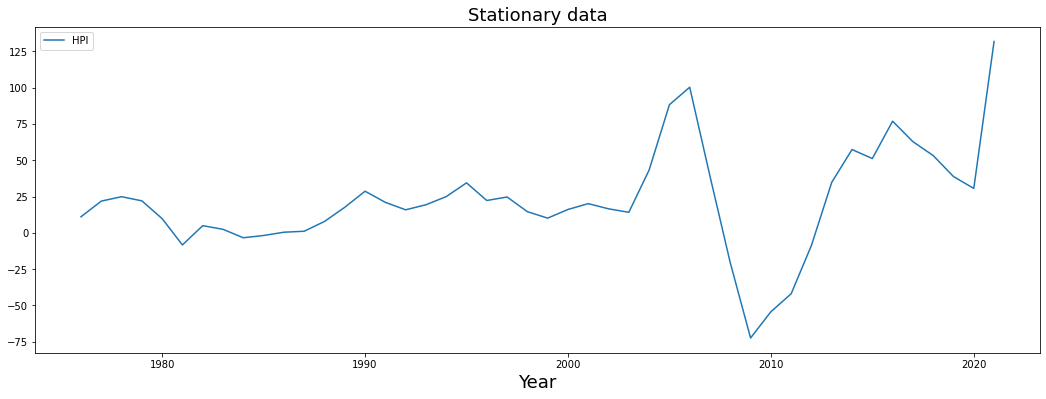

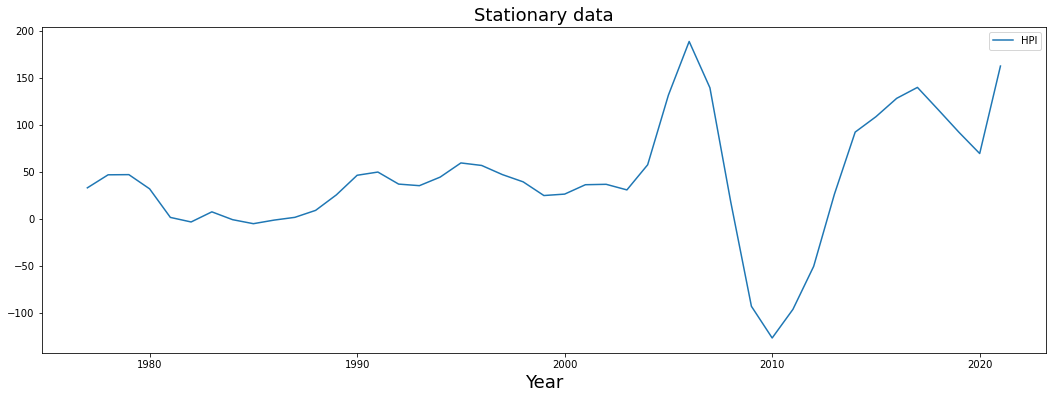

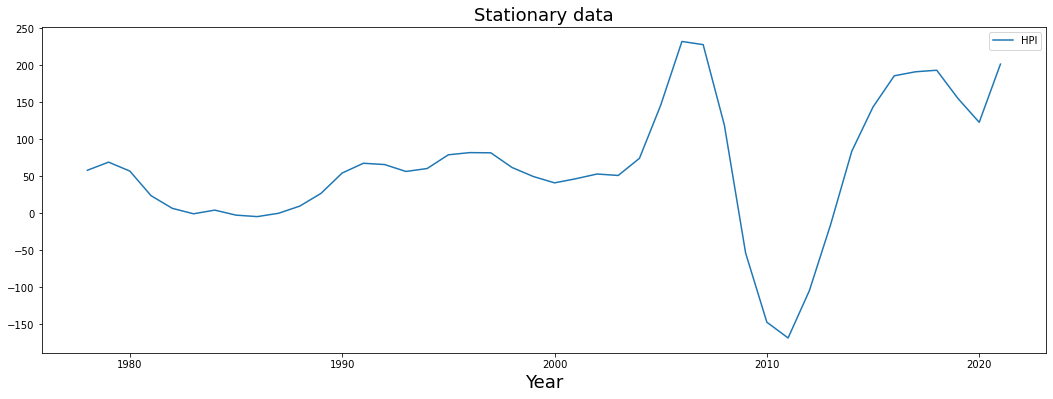

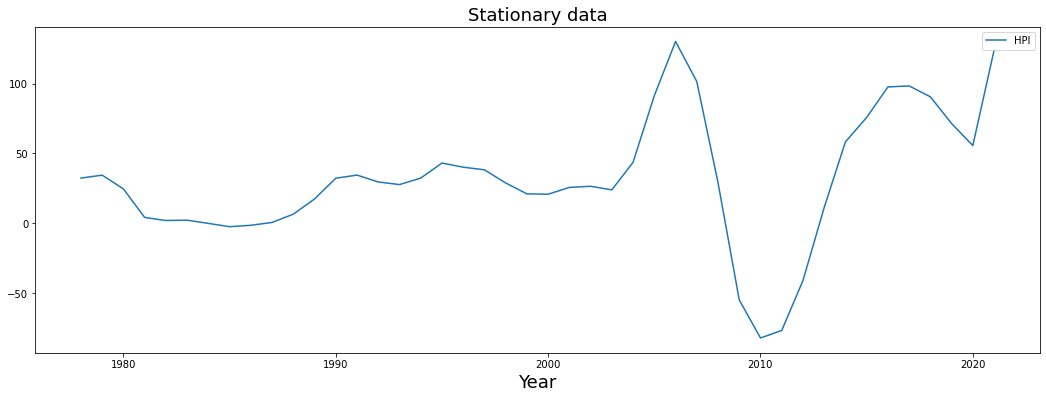

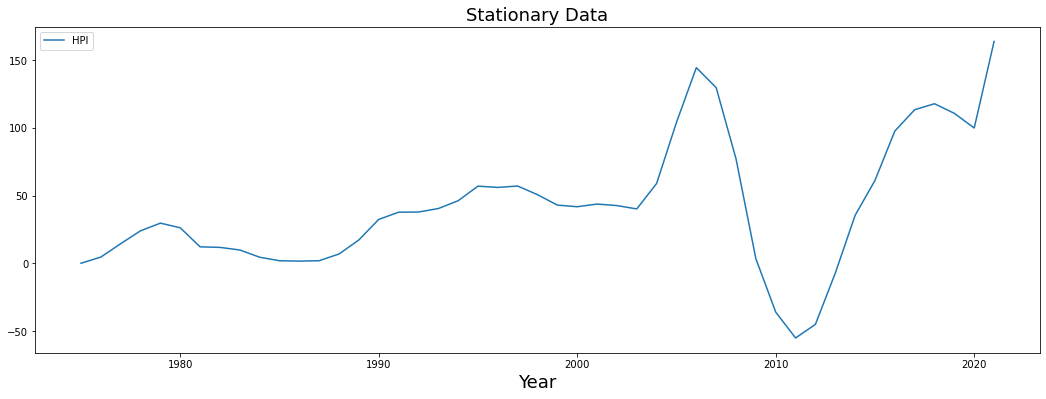

In [41]:
test_state(Oregon)

### Rhode Island
third_order_diff(Rhode_Island)

Differencing:


Test Statistic                 -2.570935
p-value                         0.099155
#Lags Used                      1.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64

None
Second order differencing:


Test Statistic                 -3.480375
p-value                         0.008506
#Lags Used                     10.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64

None
Third order differencing:


Test Statistic                 -4.526884
p-value                         0.000176
#Lags Used                     10.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                 -1.906315
p-value                         0.329096
#Lags Used                      2.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                 -3.668032
p-value                         0.004586
#Lags Used                      1.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64

None


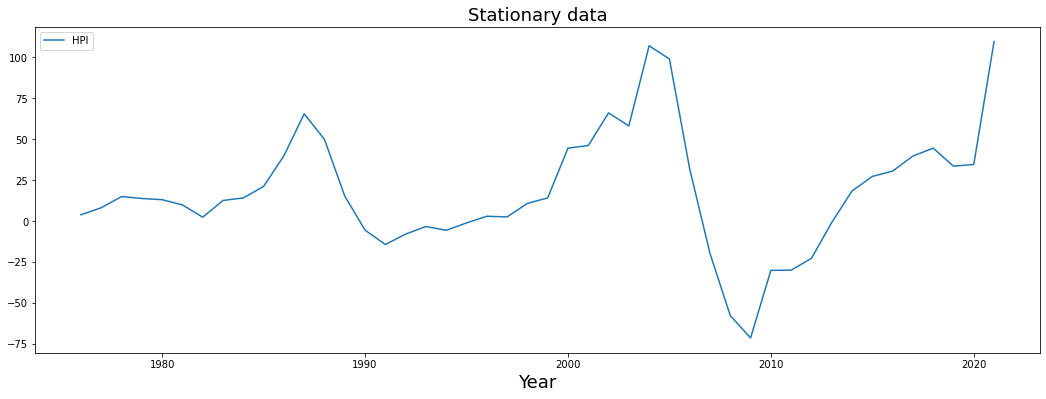

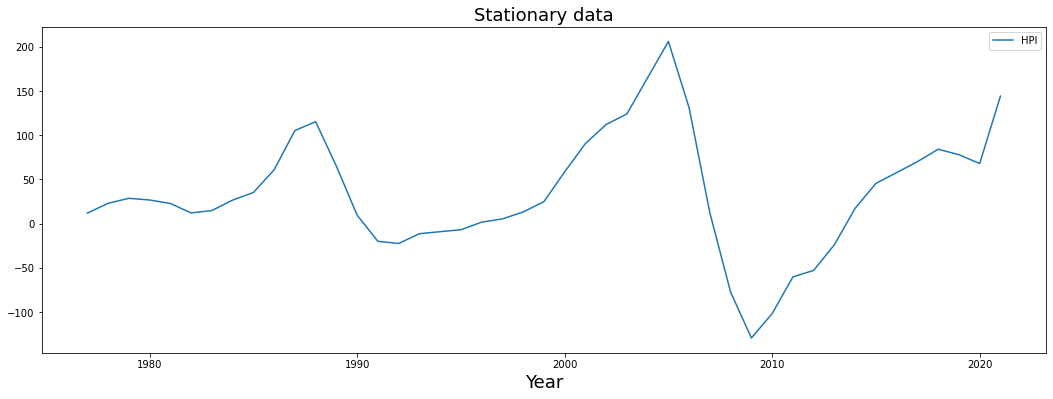

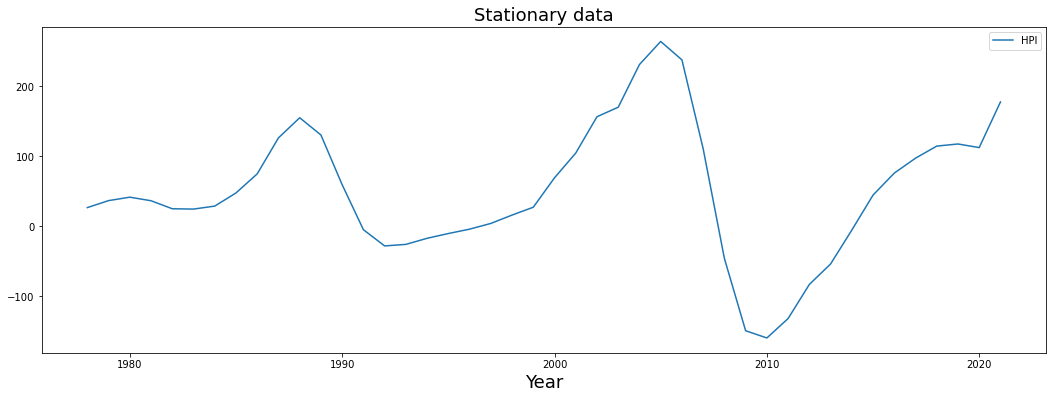

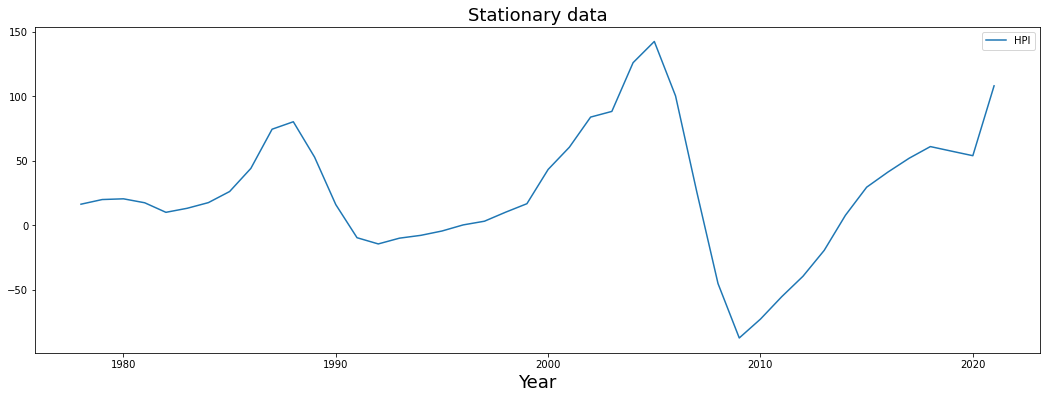

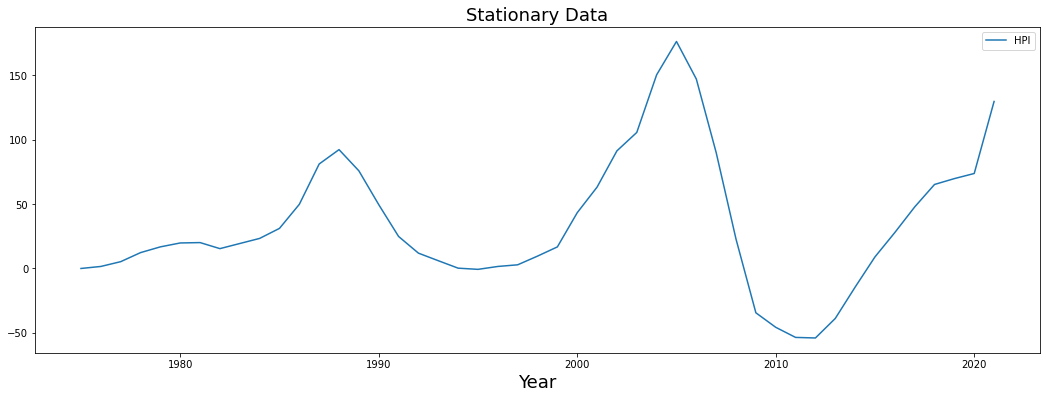

In [42]:
test_state(Rhode_Island)

### Vermont
second_order_diff(Vermont) 1% - 5% 
third_order_diff(Vermont) 1% - 5% 

Differencing:


Test Statistic                 -2.127650
p-value                         0.233543
#Lags Used                      1.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64

None
Second order differencing:


Test Statistic                 -3.550203
p-value                         0.006788
#Lags Used                     10.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64

None
Third order differencing:


Test Statistic                 -3.593236
p-value                         0.005892
#Lags Used                     10.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                 -3.347481
p-value                         0.012885
#Lags Used                     10.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                 -2.819925
p-value                         0.055483
#Lags Used                      6.000000
Number of Observations Used    40.000000
Critical Value (1%)            -3.605565
Critical Value (5%)            -2.937069
Critical Value (10%)           -2.606986
dtype: float64

None


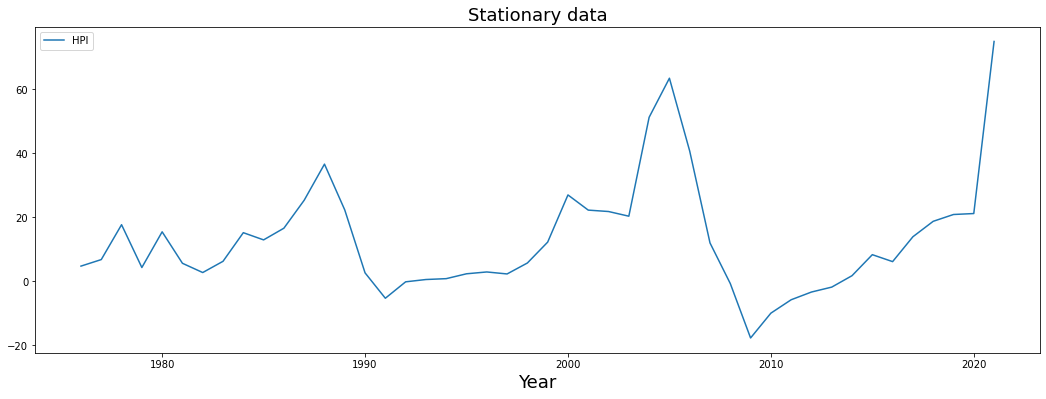

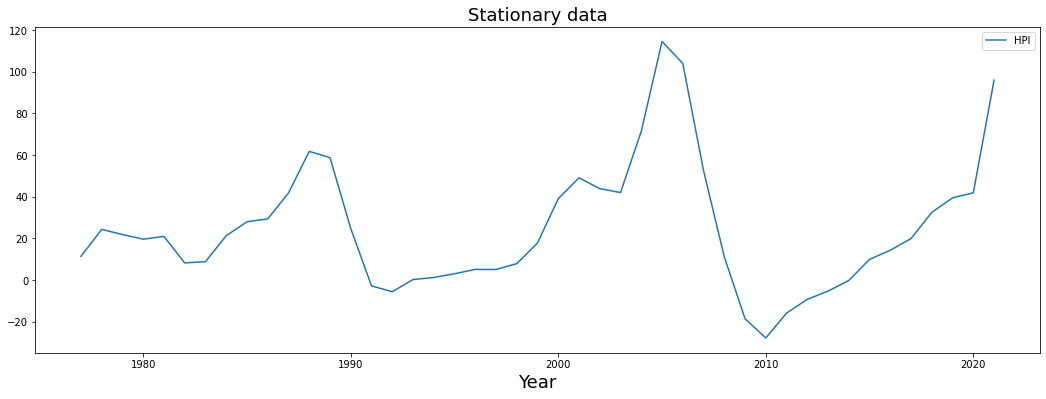

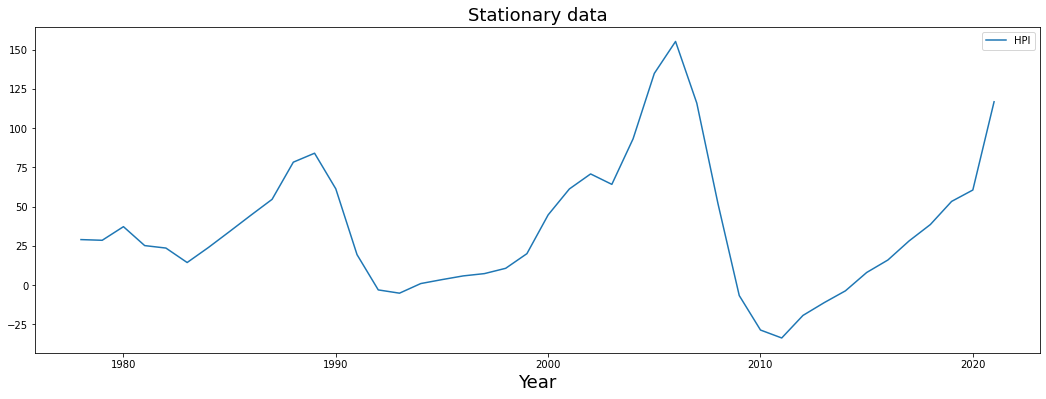

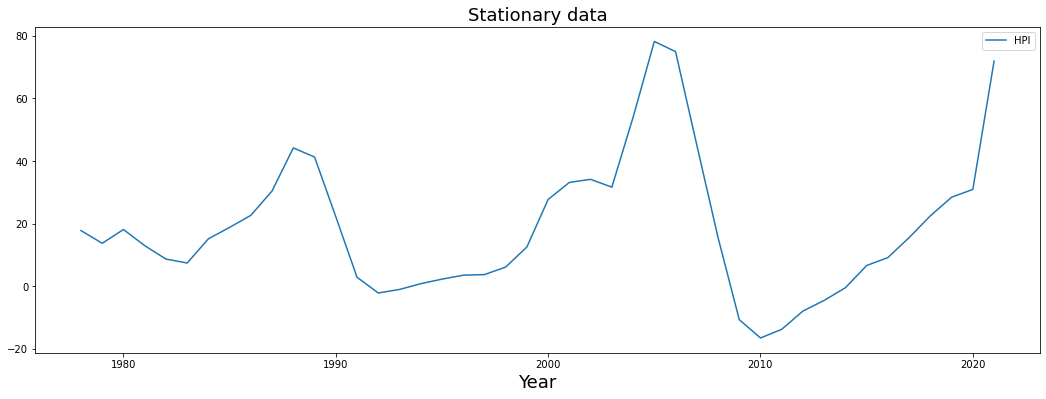

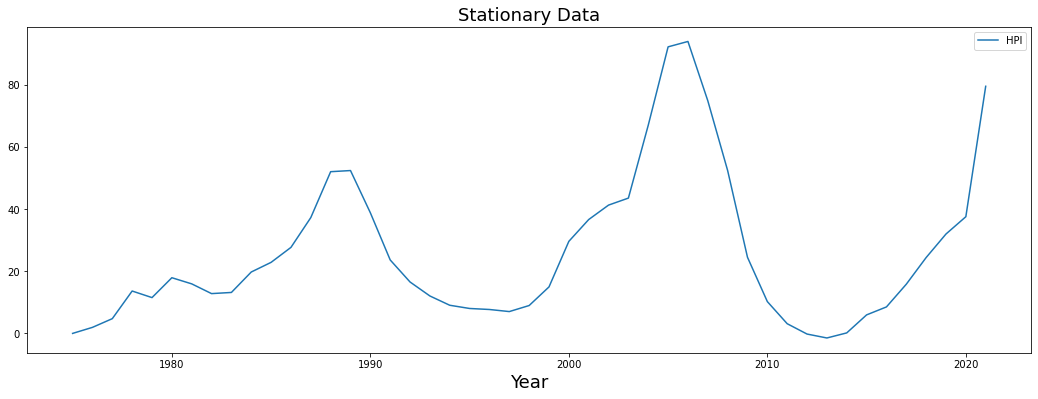

In [43]:
print('Differencing:')
print(diff(Vermont))
print('Second order differencing:')
print(second_order_diff(Vermont))
print('Third order differencing:')
print(third_order_diff(Vermont))
print('Subtracting the rolling mean:')
print(srm(Vermont))
print('Subtracting the exponential rolling mean:')
print(erm(Vermont))

### Virginia
third_order_diff(Virginia)

Differencing:


Test Statistic                 -2.274439
p-value                         0.180344
#Lags Used                      2.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64

None
Second order differencing:


Test Statistic                 -2.988200
p-value                         0.036011
#Lags Used                      7.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64

None
Third order differencing:


Test Statistic                 -3.979741
p-value                         0.001520
#Lags Used                     10.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                 -2.590937
p-value                         0.094885
#Lags Used                      3.000000
Number of Observations Used    40.000000
Critical Value (1%)            -3.605565
Critical Value (5%)            -2.937069
Critical Value (10%)           -2.606986
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                 -2.503459
p-value                         0.114635
#Lags Used                      3.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64

None


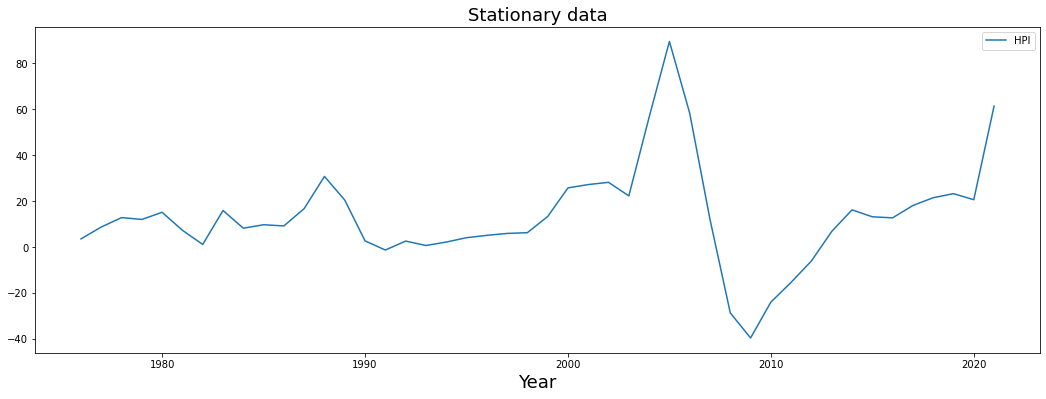

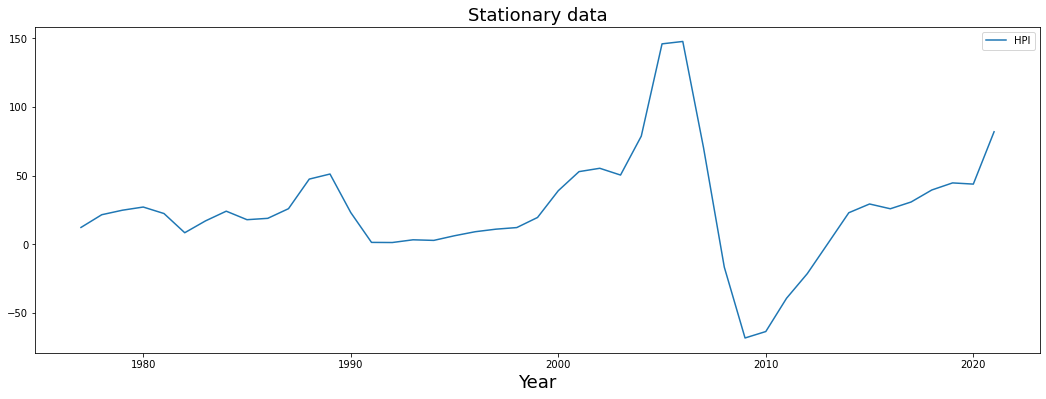

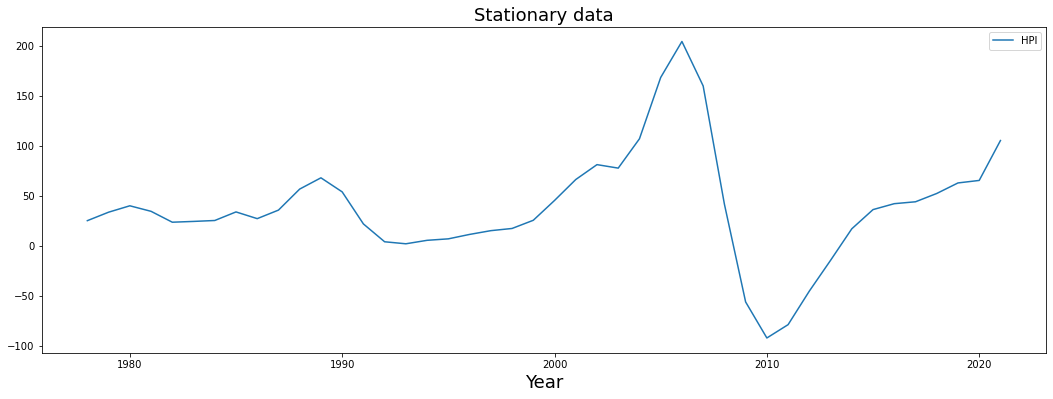

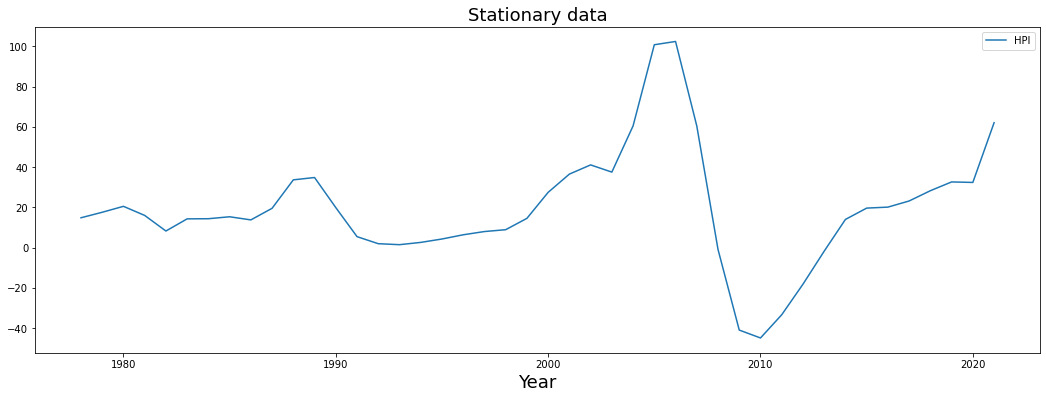

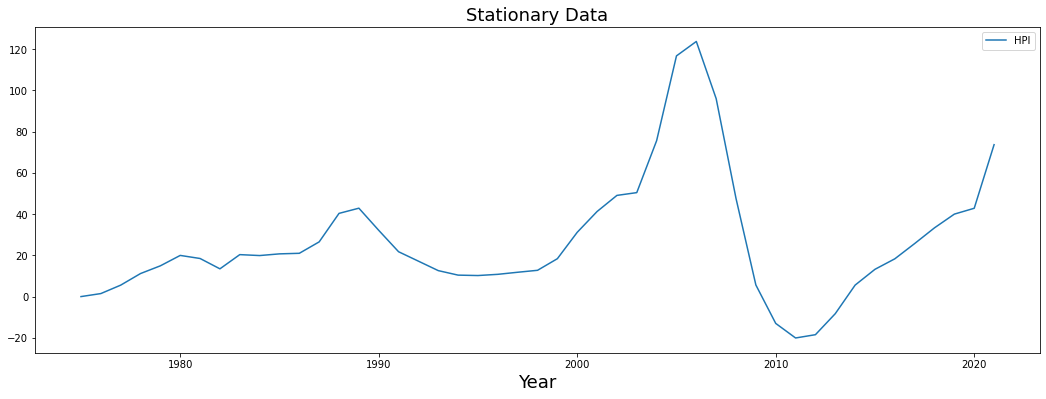

In [44]:
test_state(Virginia)

### Washington
N/A

Differencing:


Test Statistic                 -1.437354
p-value                         0.564243
#Lags Used                      2.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64

None
Second order differencing:


Test Statistic                 -1.100110
p-value                         0.715028
#Lags Used                      3.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64

None
Third order differencing:


Test Statistic                 -0.702394
p-value                         0.846129
#Lags Used                      2.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                 -0.440112
p-value                         0.903183
#Lags Used                      2.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                  0.020003
p-value                         0.960155
#Lags Used                      2.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64

None


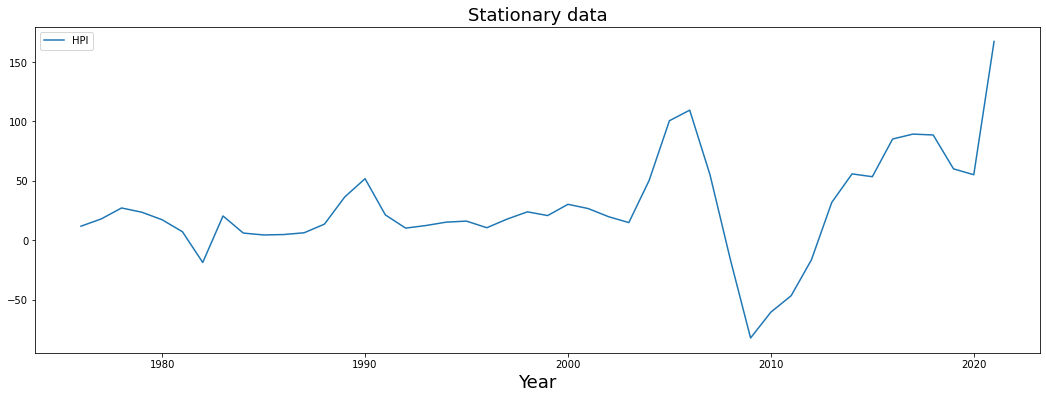

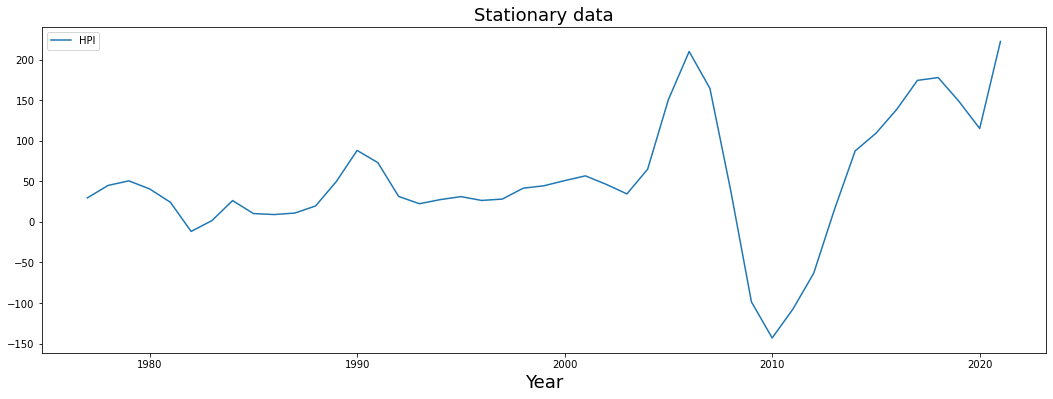

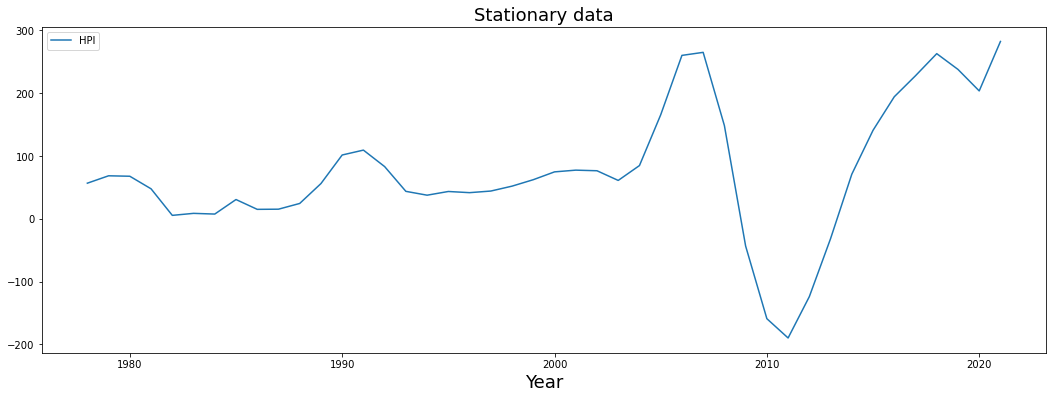

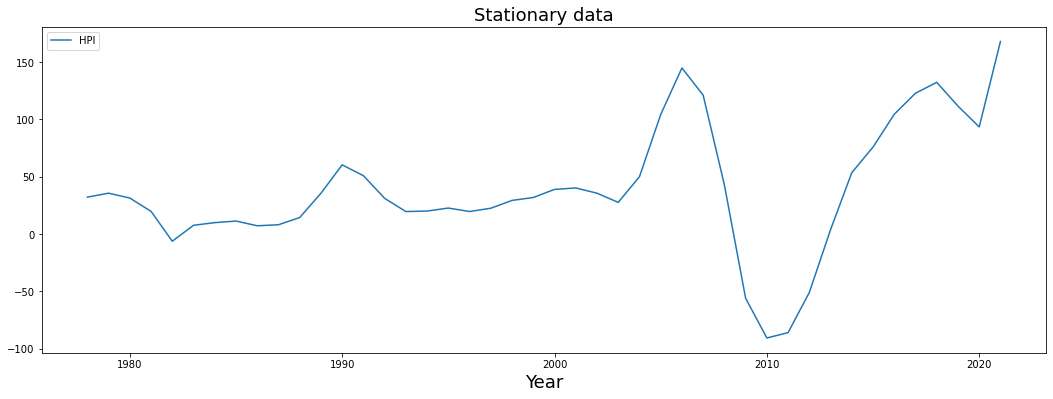

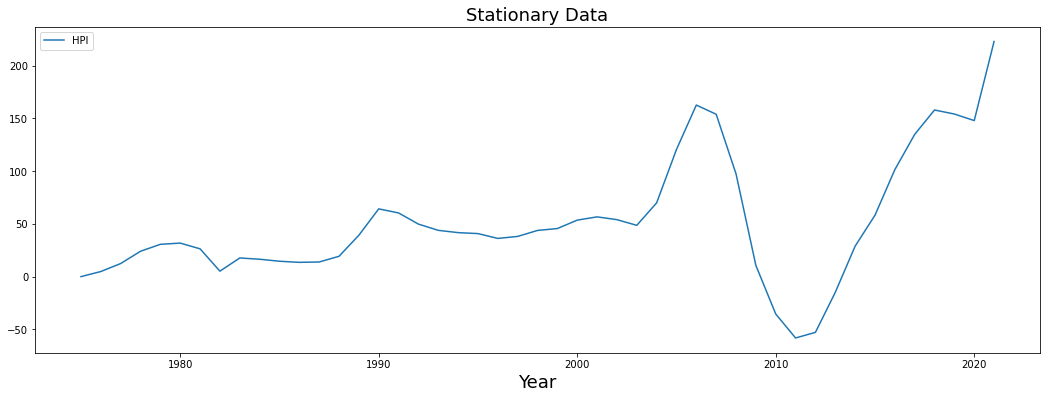

In [45]:
test_state(Washington)

<div class="alert alert-block alert-danger">
Our endeavor to make all of the state HPI information stationary was only a halfway success. Listed below are the states that could not be considered stationary/mean and variance were not constant over time: <br> <br>
    Colorado<br>
    Montana <br>
    Washington
</div>

# States that have not legalized cannabis

In [46]:
Alabama = state_df[state_df['State'] == 'Alabama']
Arkansas = state_df[state_df['State'] == 'Arkansas']
Delaware = state_df[state_df['State'] == 'Delaware']
Florida = state_df[state_df['State'] == 'Florida']
Georgia = state_df[state_df['State'] == 'Georgia']
Hawaii = state_df[state_df['State'] == 'Hawaii']
Indiana = state_df[state_df['State'] == 'Indiana']
Iowa = state_df[state_df['State'] == 'Iowa']
Kentucky = state_df[state_df['State'] == 'Kentucky']
Louisiana = state_df[state_df['State'] == 'Louisiana']
Maryland = state_df[state_df['State'] == 'Maryland']
Minnesota = state_df[state_df['State'] == 'Minnesota']
Mississippi = state_df[state_df['State'] == 'Mississippi']
New_Hampshire = state_df[state_df['State'] == 'New Hampshire']
North_Dakota = state_df[state_df['State'] == 'North Dakota']
Ohio = state_df[state_df['State'] == 'Ohio']
Oklahoma = state_df[state_df['State'] == 'Oklahoma']
Pennsylvania = state_df[state_df['State'] == 'Pennsylvania']
South_Dakota = state_df[state_df['State'] == 'South Dakota']
Tennessee = state_df[state_df['State'] == 'Tennessee']
Texas = state_df[state_df['State'] == 'Texas']
Utah = state_df[state_df['State'] == 'Utah']
West_Virginia = state_df[state_df['State'] == 'West Virginia']
Wisconsin = state_df[state_df['State'] == 'Wisconsin']

## Alabama 
third_order_diff

In [84]:
Alabama.head()

State     HPI
Year                 
1975  Alabama  100.00
1976  Alabama  106.70
1977  Alabama  117.37
1978  Alabama  127.21
1979  Alabama  140.86

Differencing:


Test Statistic                 -1.430883
p-value                         0.567384
#Lags Used                      1.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64

None
Second order differencing:


Test Statistic                 -3.534796
p-value                         0.007137
#Lags Used                     10.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64

None
Third order differencing:


Test Statistic                 -3.916093
p-value                         0.001920
#Lags Used                     10.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                 -3.768844
p-value                         0.003243
#Lags Used                     10.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                 -2.104609
p-value                         0.242665
#Lags Used                      1.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64

None


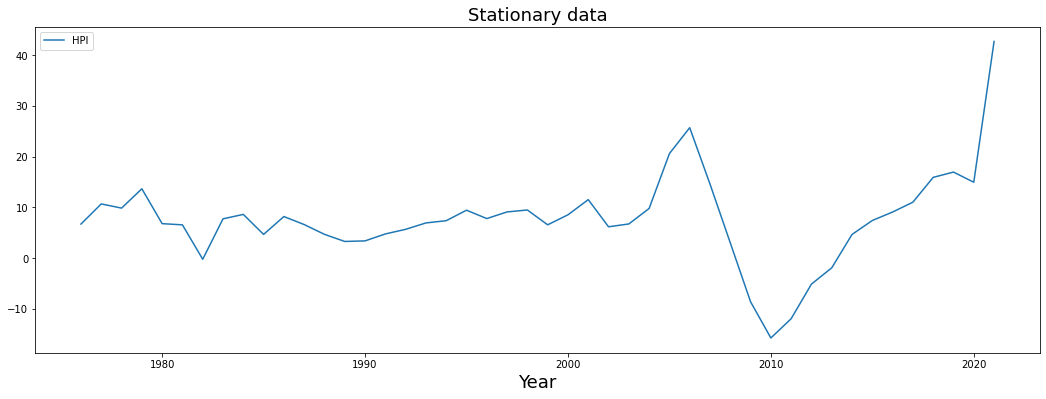

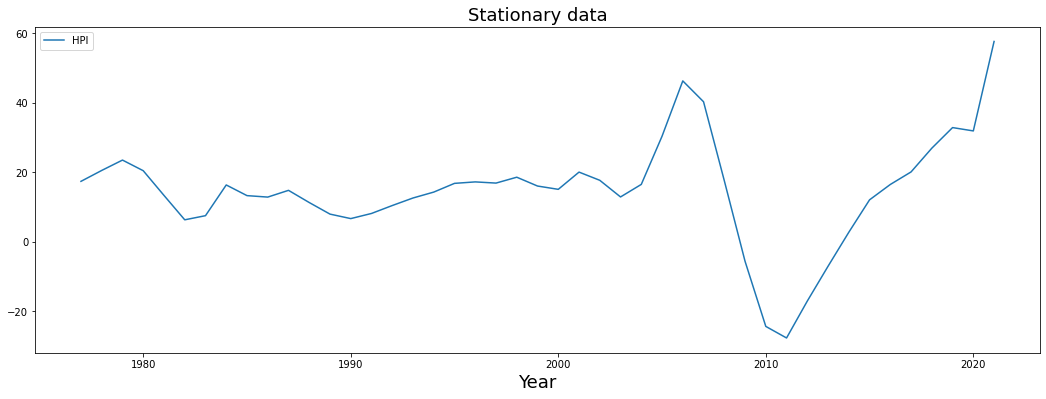

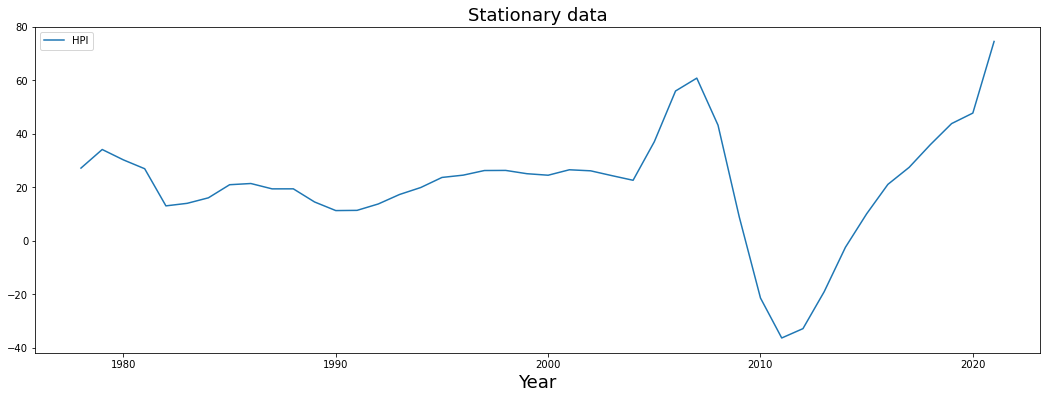

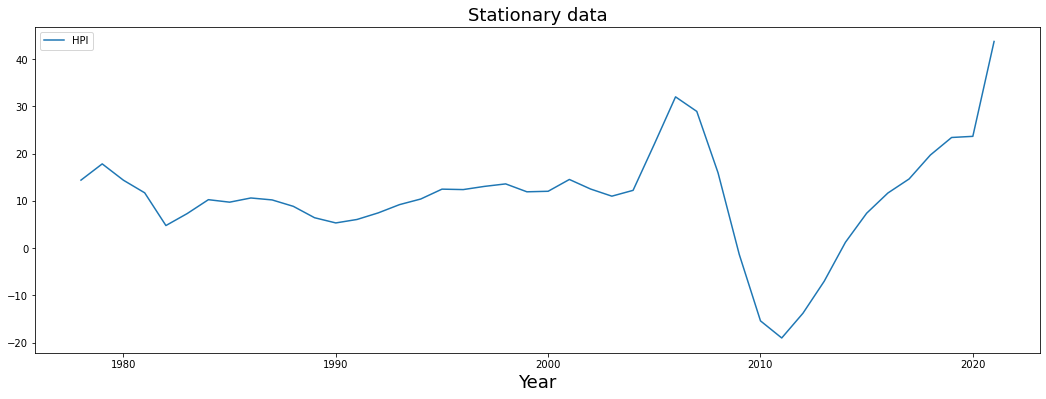

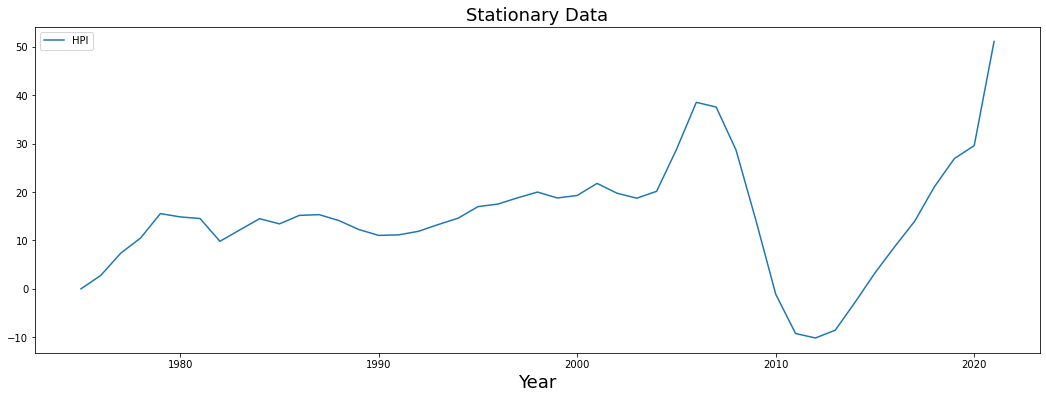

In [47]:
test_state(Alabama)

## Arkansas
N/A

Differencing:


Test Statistic                 -1.457365
p-value                         0.554487
#Lags Used                      0.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64

None
Second order differencing:


Test Statistic                 -2.040671
p-value                         0.269030
#Lags Used                      3.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64

None
Third order differencing:


Test Statistic                 -2.173185
p-value                         0.216121
#Lags Used                      2.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                 -1.988153
p-value                         0.291791
#Lags Used                      1.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                 -1.506429
p-value                         0.530329
#Lags Used                      1.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64

None


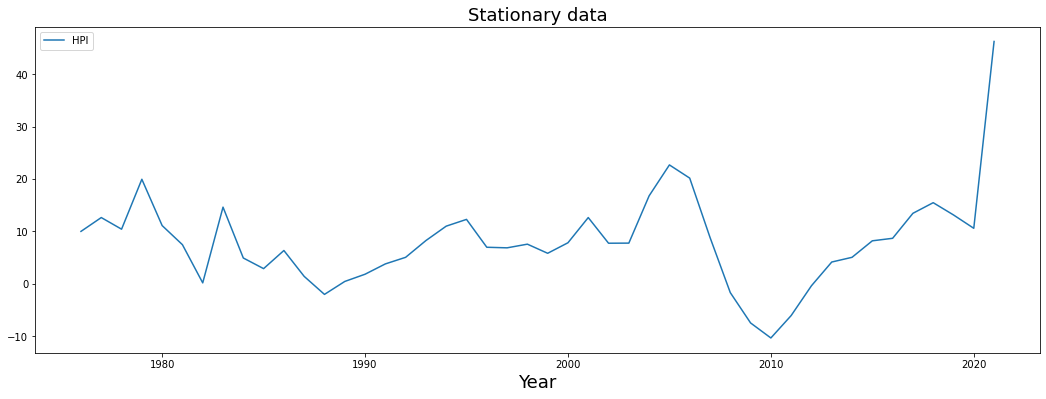

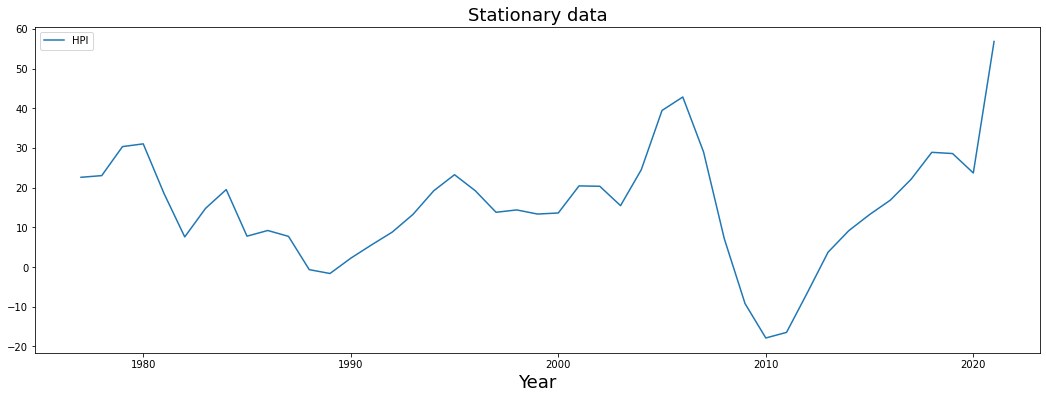

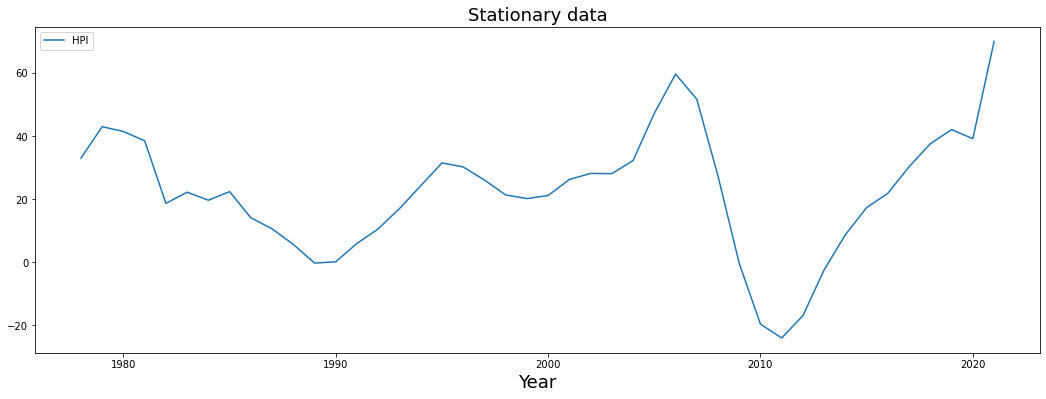

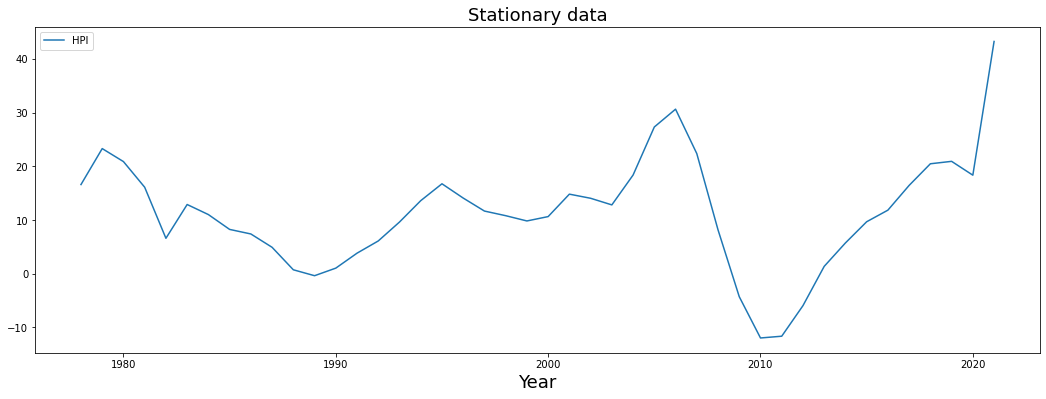

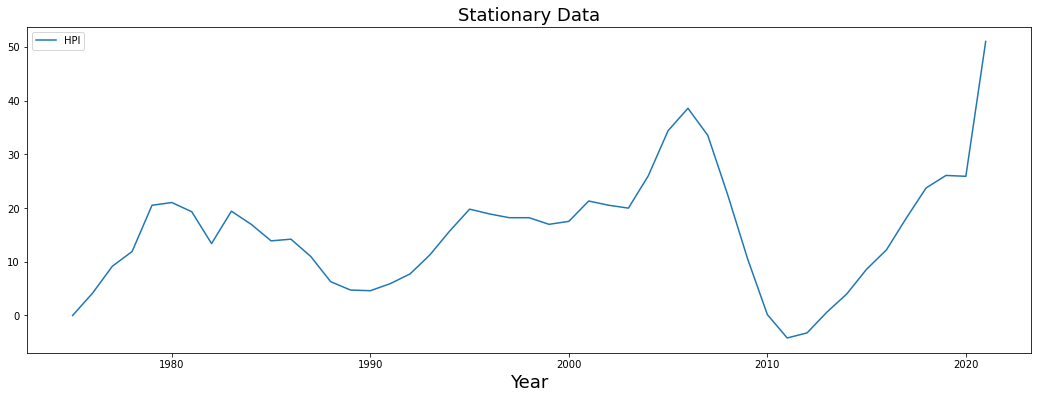

In [48]:
test_state(Arkansas)

## Delaware
third_order_diff

Differencing:


Test Statistic                 -2.985537
p-value                         0.036267
#Lags Used                      1.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64

None
Second order differencing:


Test Statistic                 -3.892035
p-value                         0.002094
#Lags Used                     10.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64

None
Third order differencing:


Test Statistic                 -4.838370
p-value                         0.000046
#Lags Used                     10.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                 -3.654929
p-value                         0.004794
#Lags Used                     10.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                 -4.249530
p-value                         0.000543
#Lags Used                      8.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64

None


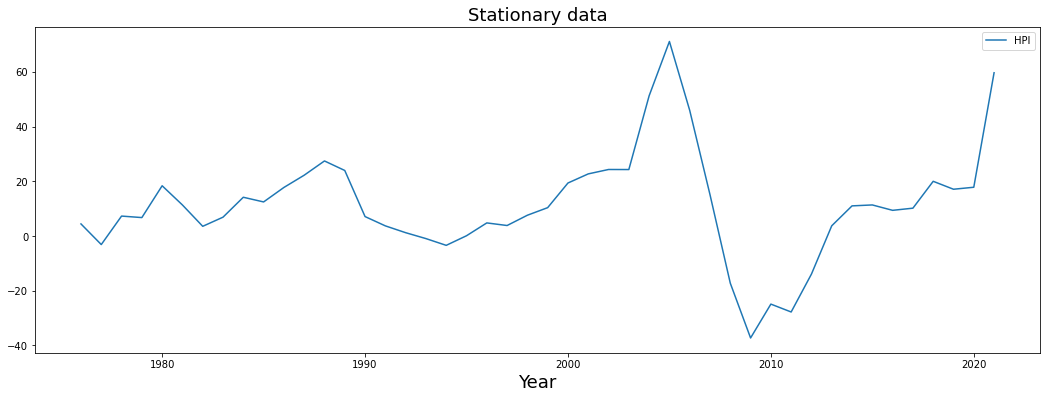

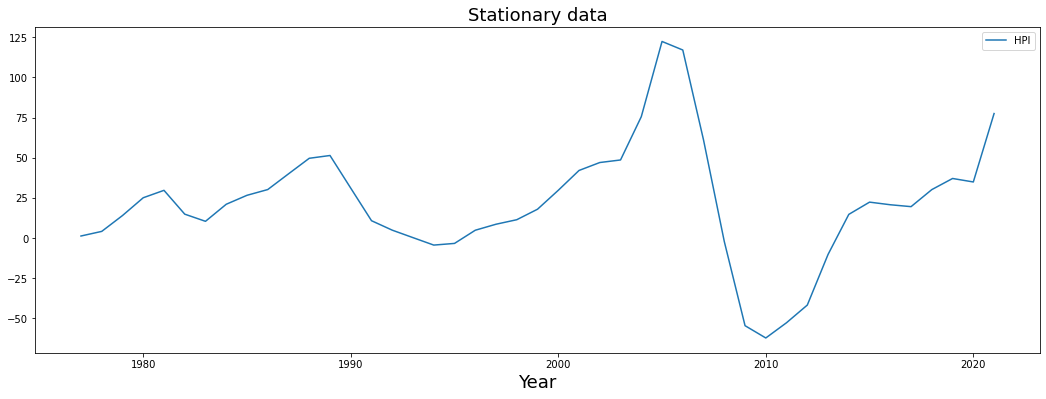

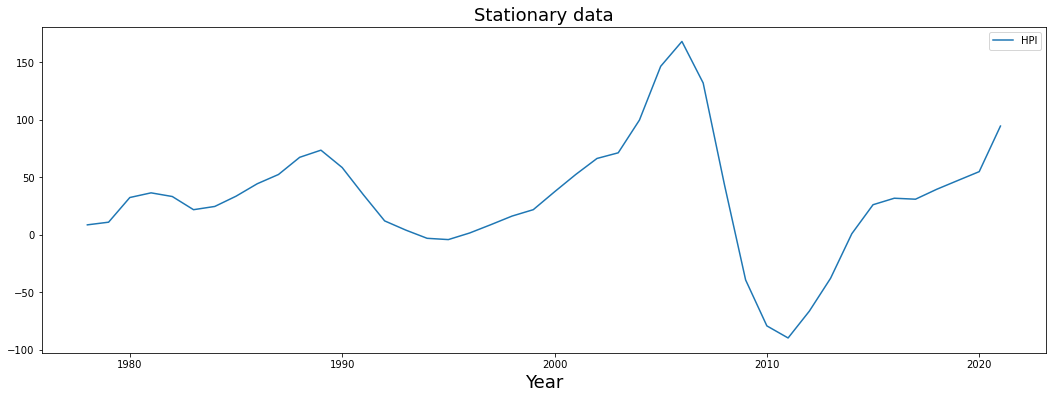

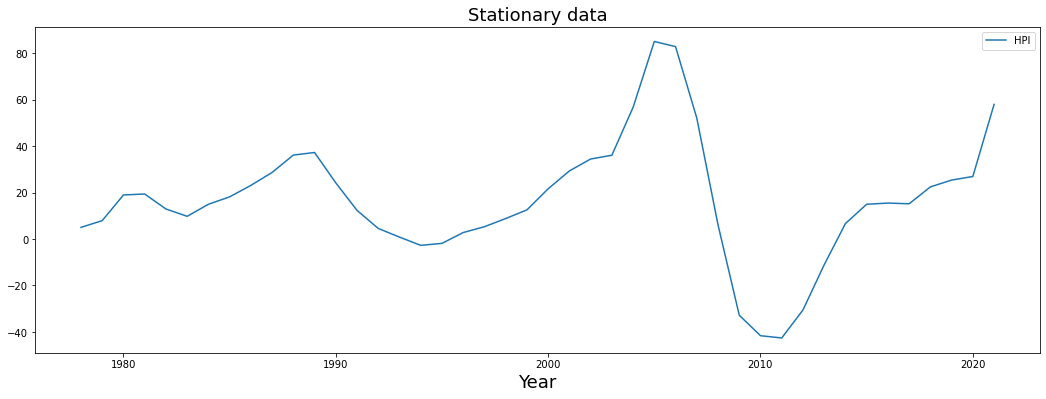

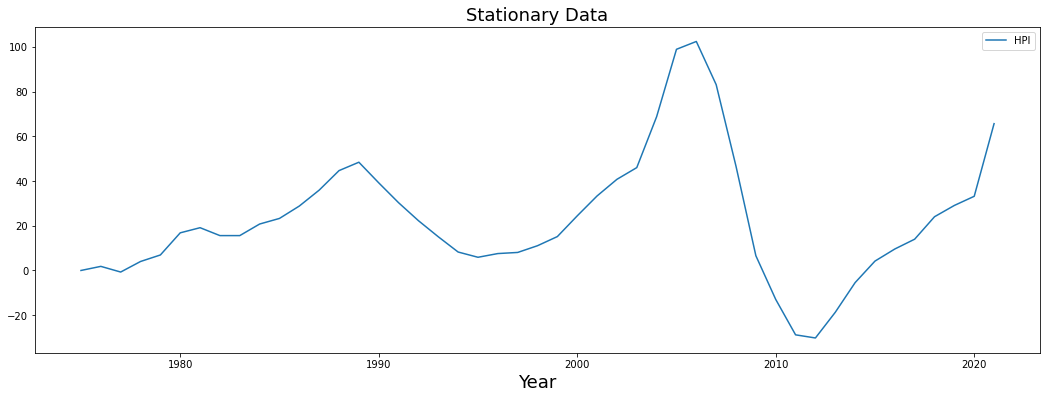

In [49]:
test_state(Delaware)

## Florida
third_order_diff between 95% - 99%

Differencing:


Test Statistic                 -2.275247
p-value                         0.180076
#Lags Used                      3.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64

None
Second order differencing:


Test Statistic                 -2.905373
p-value                         0.044727
#Lags Used                     10.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64

None
Third order differencing:


Test Statistic                 -3.635737
p-value                         0.005113
#Lags Used                     10.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                 -2.998422
p-value                         0.035042
#Lags Used                     10.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                 -2.209248
p-value                         0.202906
#Lags Used                      3.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64

None


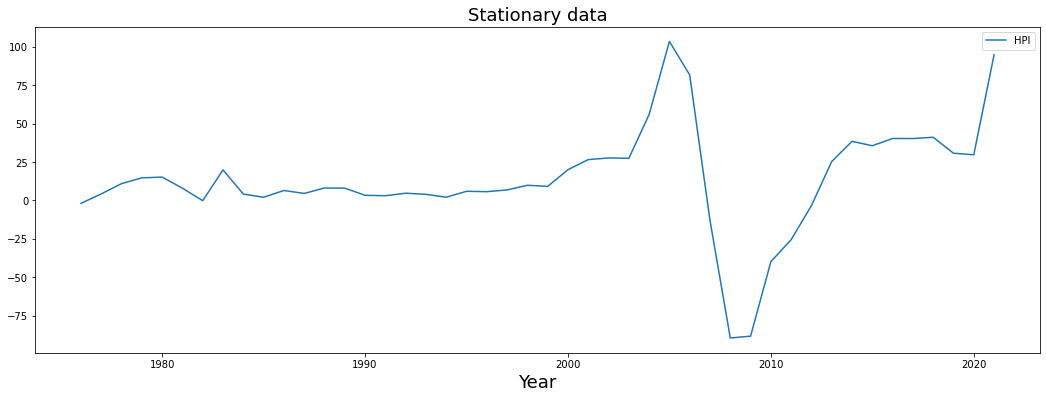

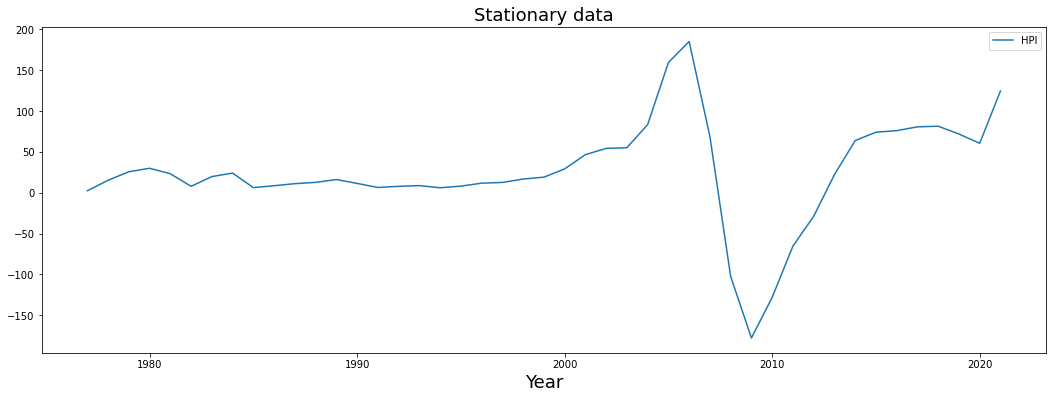

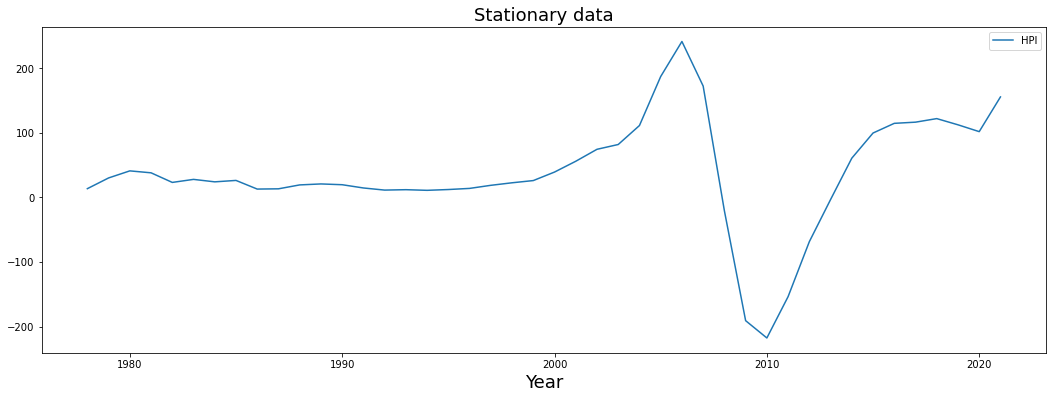

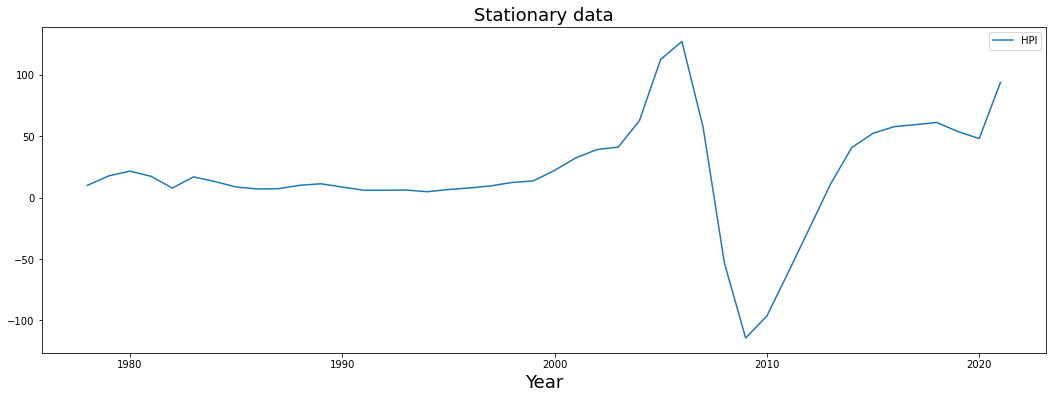

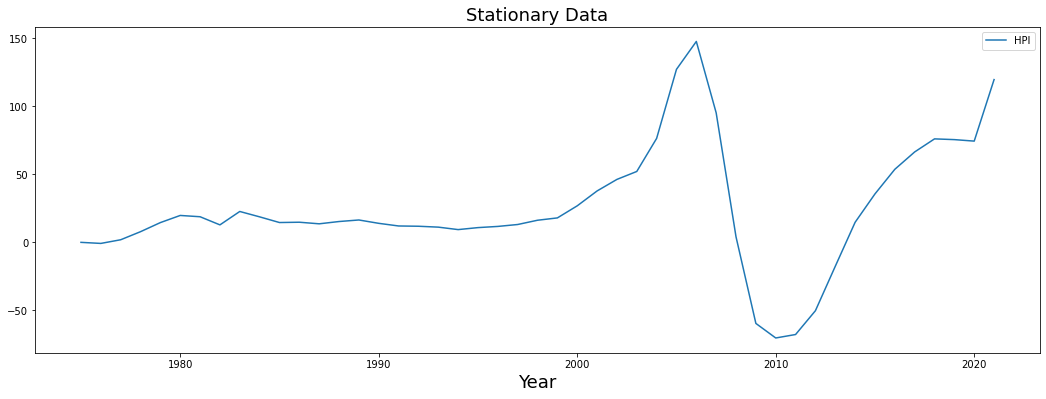

In [50]:
test_state(Florida)

## Georgia
third_order_diff

Differencing:


Test Statistic                 -3.857837
p-value                         0.002368
#Lags Used                      8.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64

None
Second order differencing:


Test Statistic                 -3.879420
p-value                         0.002192
#Lags Used                      9.000000
Number of Observations Used    35.000000
Critical Value (1%)            -3.632743
Critical Value (5%)            -2.948510
Critical Value (10%)           -2.613017
dtype: float64

None
Third order differencing:


Test Statistic                -6.085449e+00
p-value                        1.067141e-07
#Lags Used                     1.000000e+01
Number of Observations Used    3.300000e+01
Critical Value (1%)           -3.646135e+00
Critical Value (5%)           -2.954127e+00
Critical Value (10%)          -2.615968e+00
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                 -3.987451
p-value                         0.001478
#Lags Used                     10.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                 -4.545458
p-value                         0.000163
#Lags Used                      8.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64

None


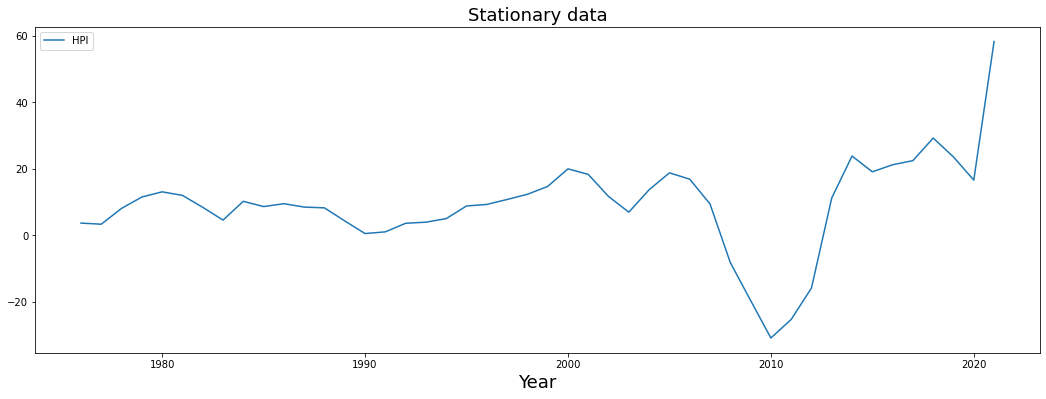

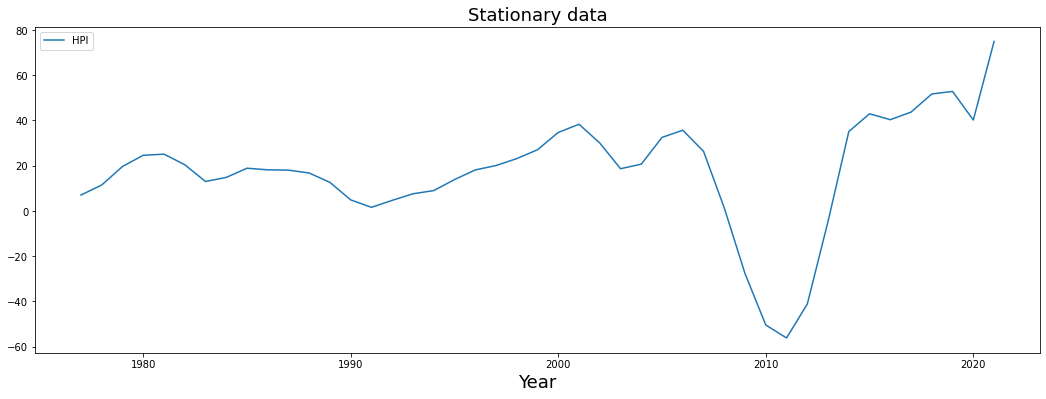

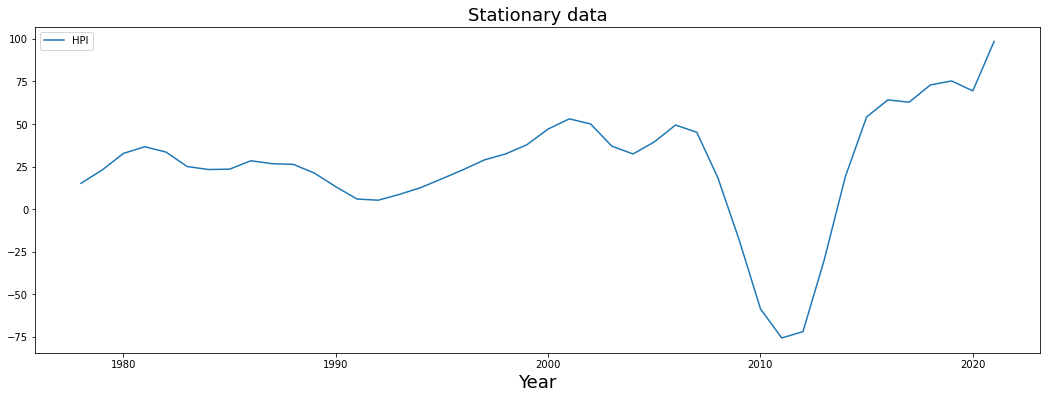

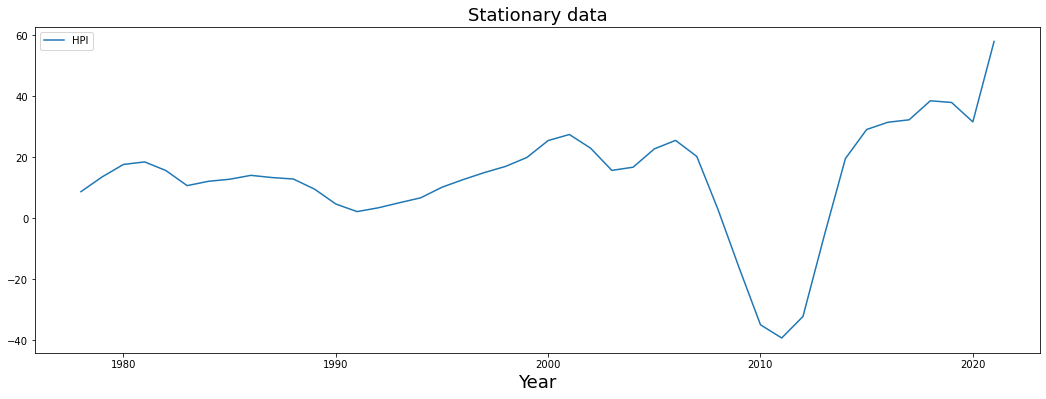

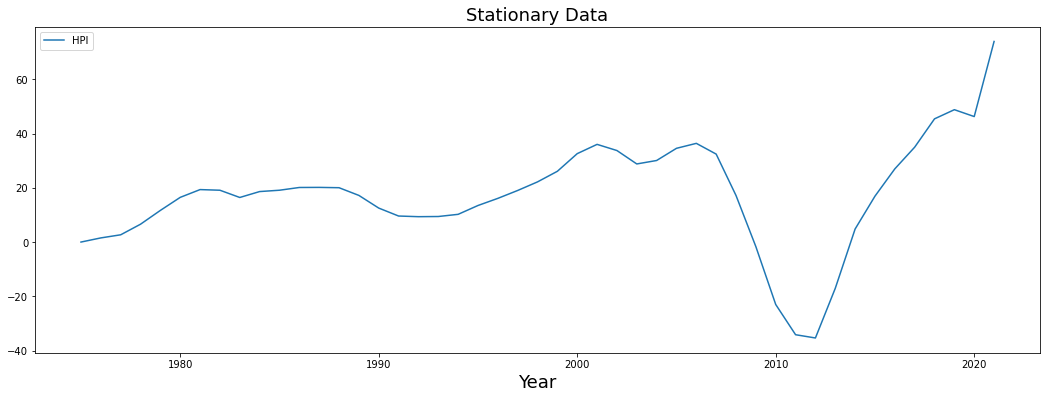

In [51]:
test_state(Georgia)

## Hawaii
second_order_diff

Differencing:


Test Statistic                 -3.698192
p-value                         0.004139
#Lags Used                      1.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64

None
Second order differencing:


Test Statistic                 -5.298656
p-value                         0.000006
#Lags Used                      1.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64

None
Third order differencing:


Test Statistic                 -3.819927
p-value                         0.002710
#Lags Used                      4.000000
Number of Observations Used    39.000000
Critical Value (1%)            -3.610400
Critical Value (5%)            -2.939109
Critical Value (10%)           -2.608063
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                 -5.123447
p-value                         0.000013
#Lags Used                      1.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                 -4.496430
p-value                         0.000200
#Lags Used                      1.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64

None


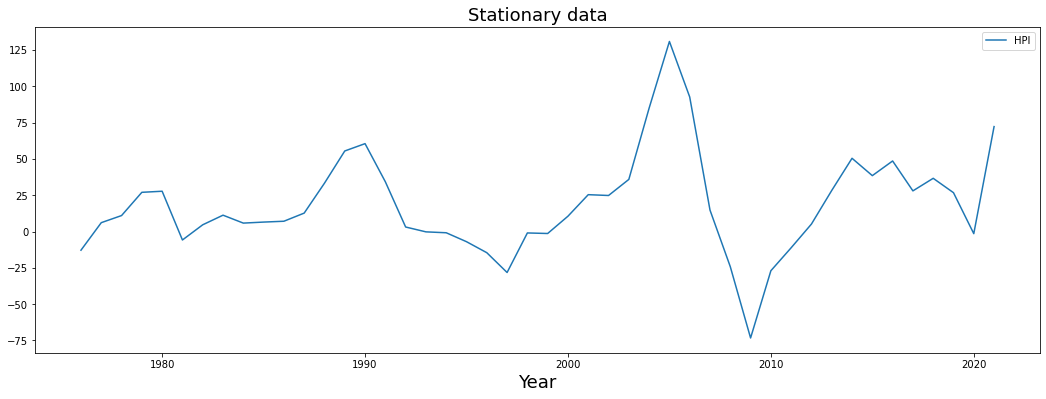

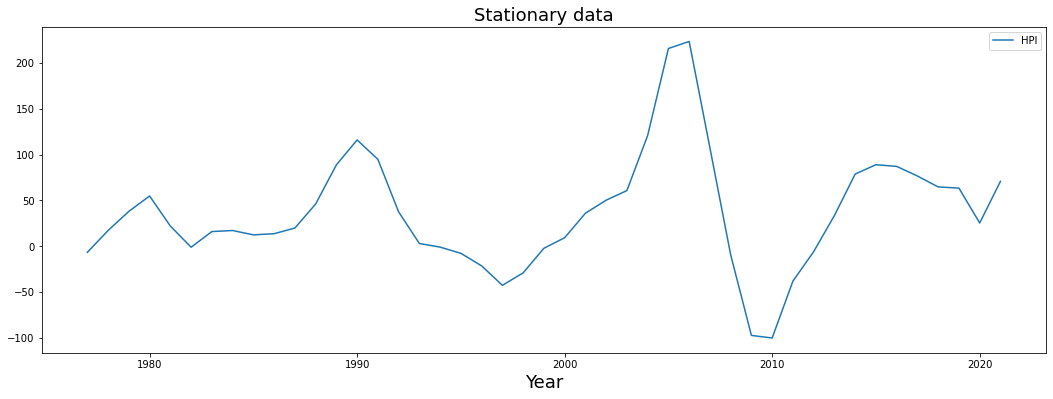

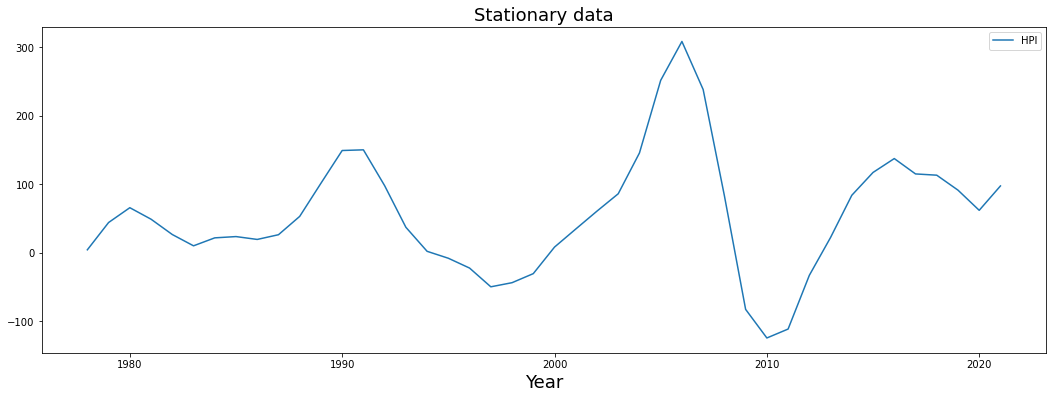

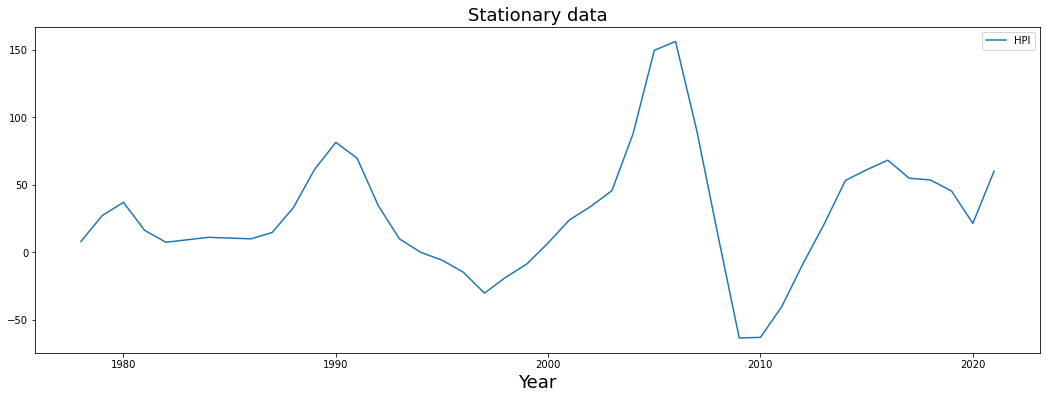

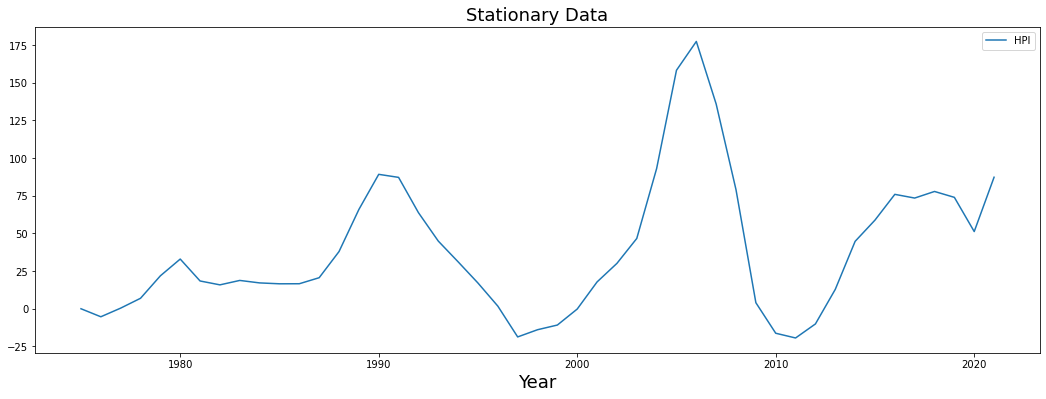

In [52]:
test_state(Hawaii)

## Indiana
N/A

Differencing:


Test Statistic                 -0.461873
p-value                         0.899245
#Lags Used                      3.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64

None
Second order differencing:


Test Statistic                 -0.126063
p-value                         0.946780
#Lags Used                      0.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64

None
Third order differencing:


Test Statistic                 -1.057312
p-value                         0.731792
#Lags Used                      1.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                 -2.845706
p-value                         0.052036
#Lags Used                     10.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                 -0.626555
p-value                         0.864868
#Lags Used                      3.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64

None


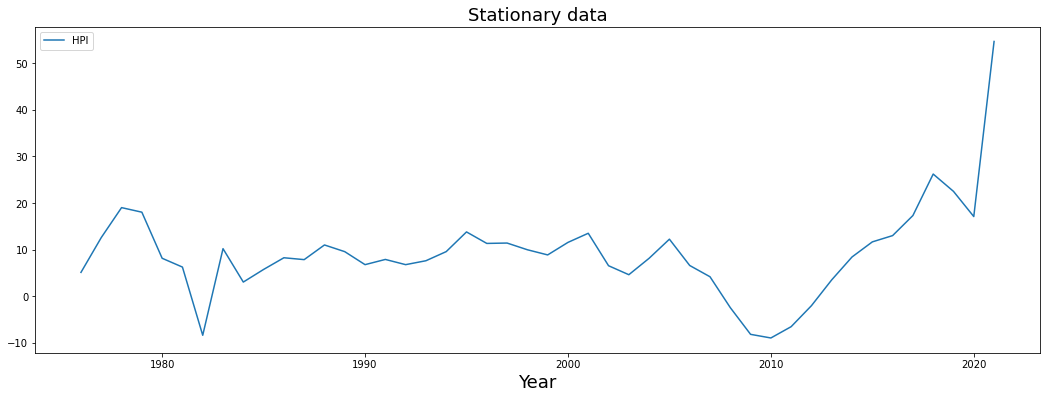

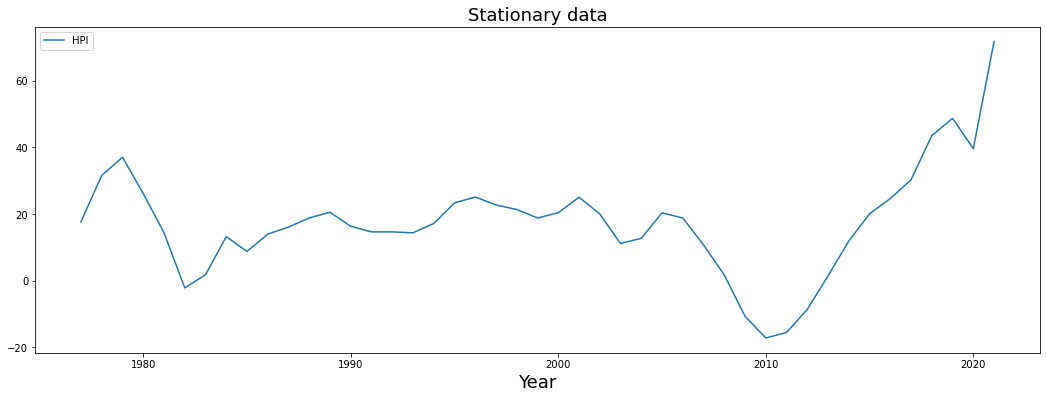

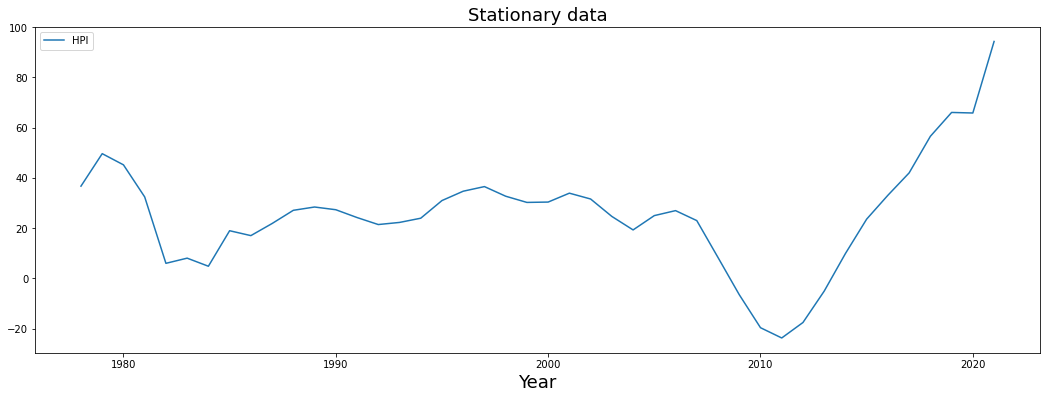

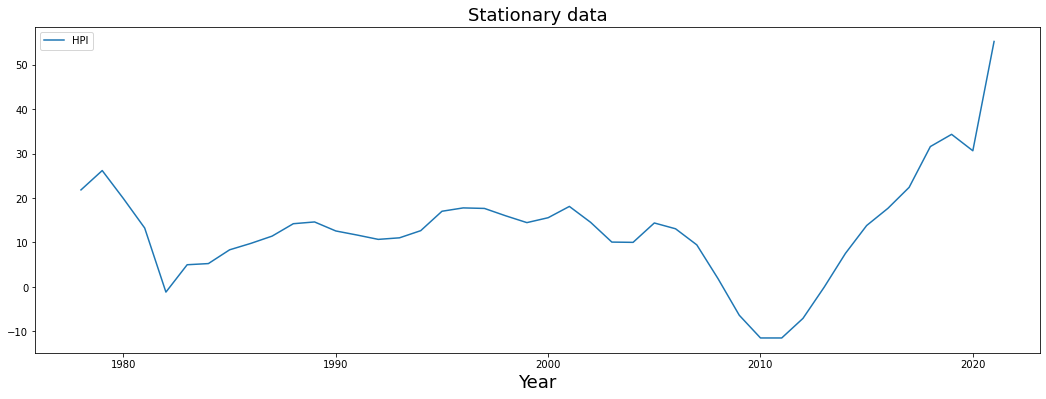

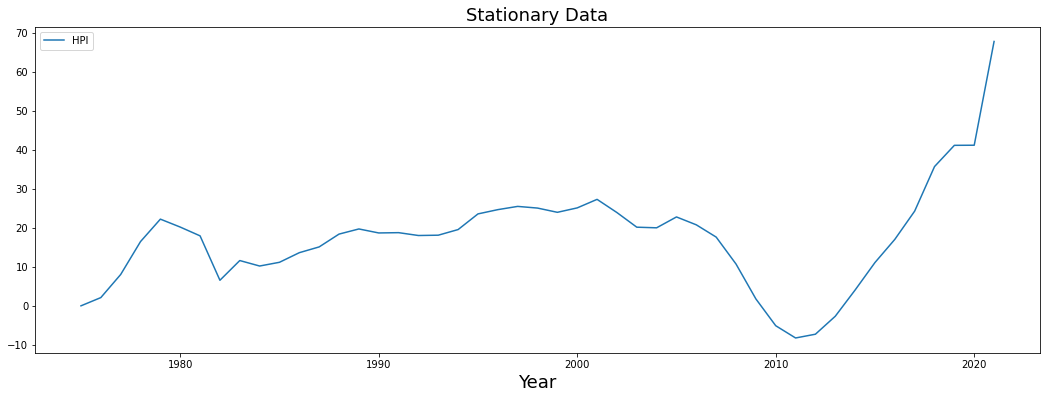

In [53]:
test_state(Indiana)

## Iowa
N/A

Differencing:


Test Statistic                 -2.042306
p-value                         0.268337
#Lags Used                      0.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64

None
Second order differencing:


Test Statistic                 -2.771131
p-value                         0.062517
#Lags Used                      1.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64

None
Third order differencing:


Test Statistic                 -2.642766
p-value                         0.084477
#Lags Used                      1.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                 -2.171526
p-value                         0.216742
#Lags Used                      1.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                 -1.130557
p-value                         0.702733
#Lags Used                      1.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64

None


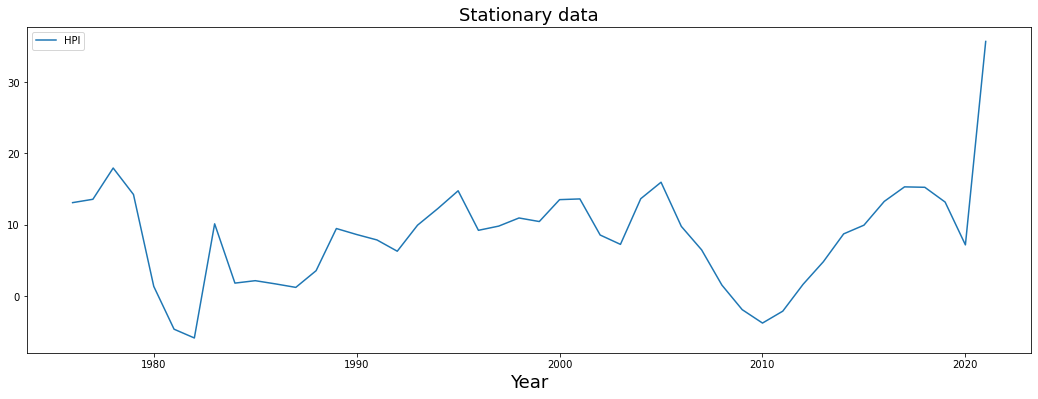

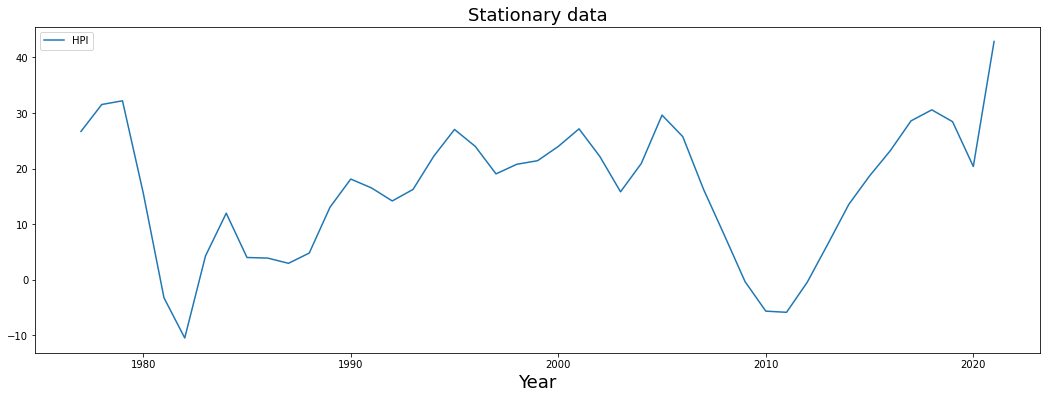

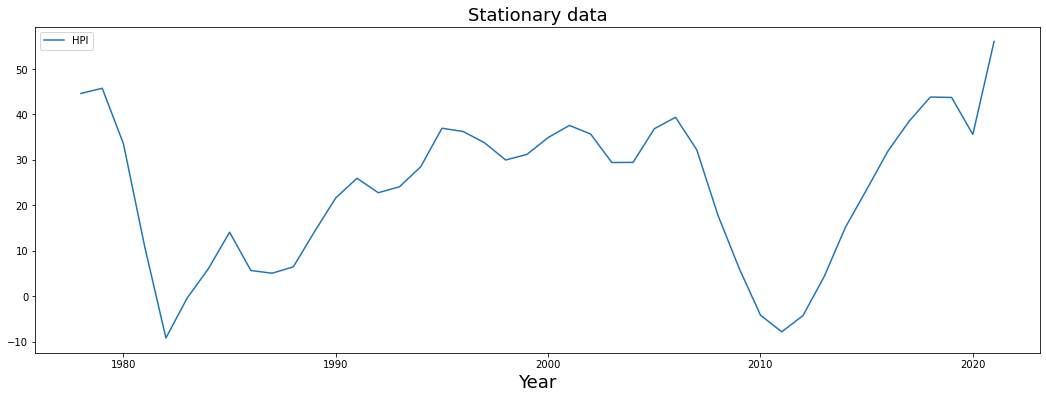

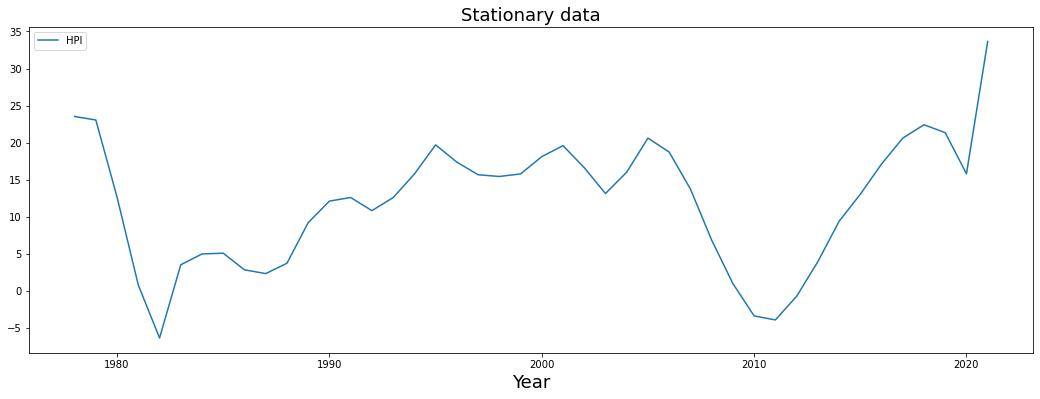

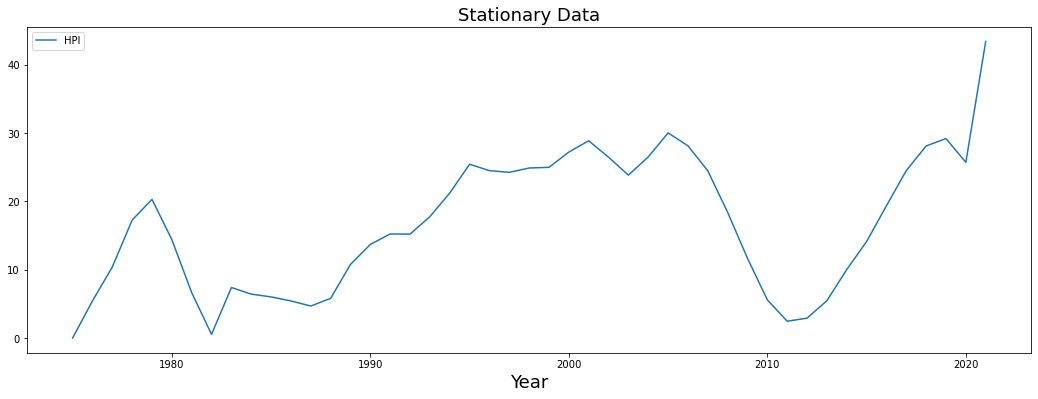

In [54]:
test_state(Iowa)

## Kentucky 
N/A

Differencing:


Test Statistic                 -0.203848
p-value                         0.938061
#Lags Used                      0.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64

None
Second order differencing:


Test Statistic                  0.428306
p-value                         0.982523
#Lags Used                      2.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64

None
Third order differencing:


Test Statistic                 -2.812802
p-value                         0.056468
#Lags Used                      9.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                  0.488816
p-value                         0.984529
#Lags Used                      2.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                 -0.537262
p-value                         0.884538
#Lags Used                      1.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64

None


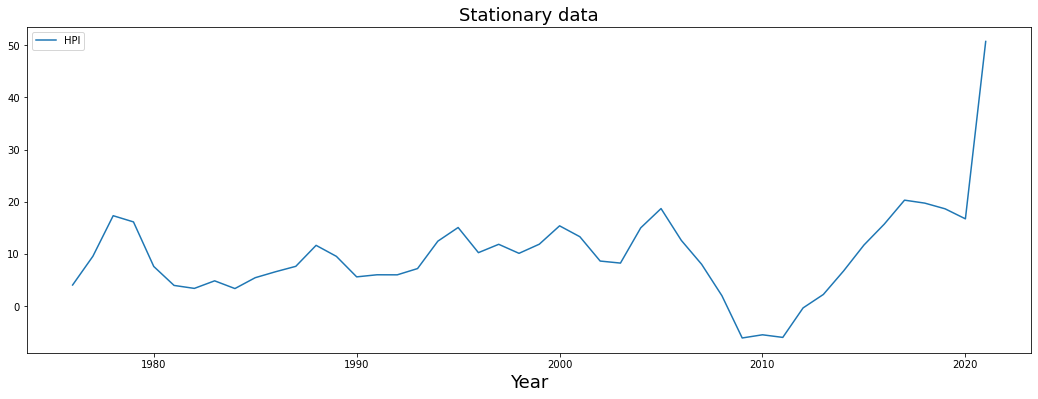

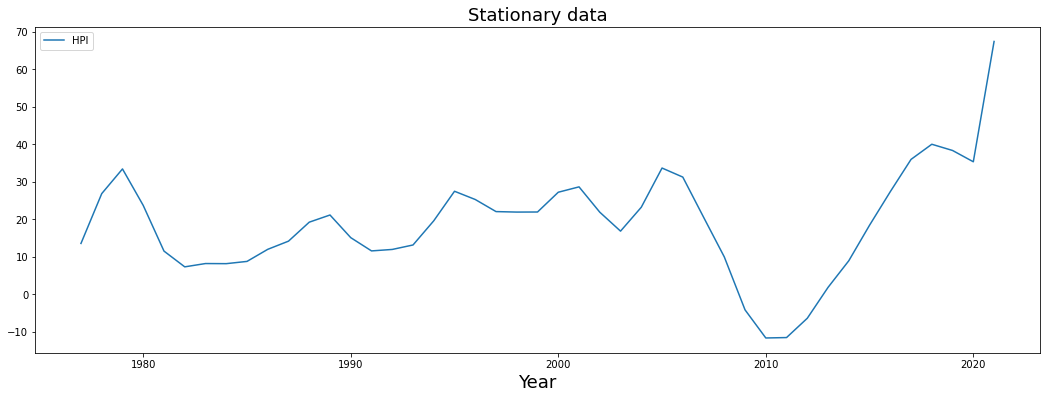

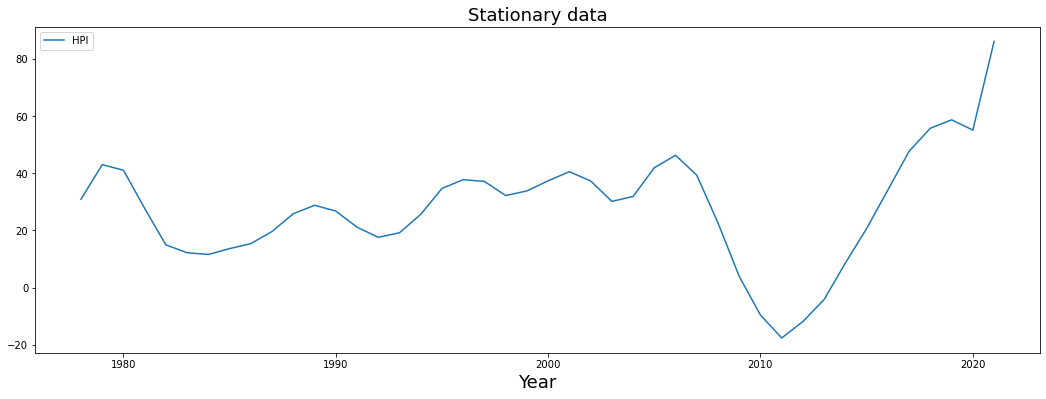

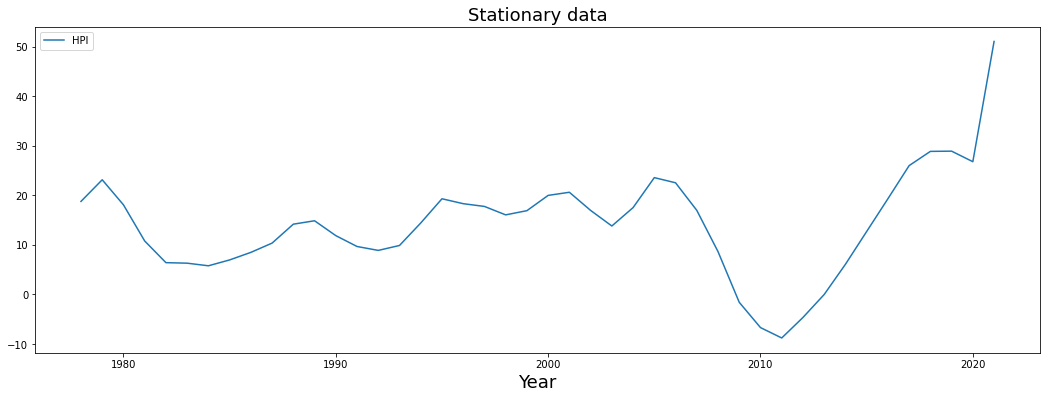

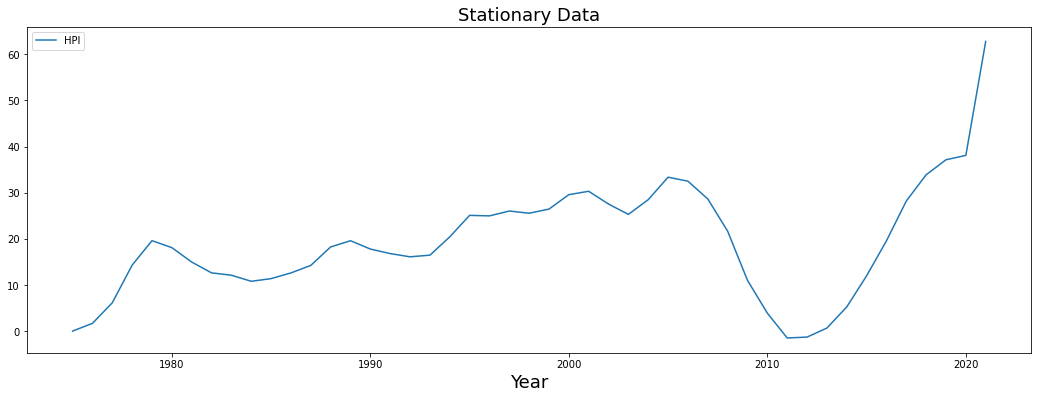

In [55]:
test_state(Kentucky)

## Louisiana
srm

Differencing:


Test Statistic                 -2.639269
p-value                         0.085150
#Lags Used                      1.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64

None
Second order differencing:


Test Statistic                 -2.219623
p-value                         0.199201
#Lags Used                      7.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64

None
Third order differencing:


Test Statistic                 -2.917688
p-value                         0.043329
#Lags Used                      2.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                 -4.014344
p-value                         0.001337
#Lags Used                      1.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                 -3.104183
p-value                         0.026245
#Lags Used                      1.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64

None


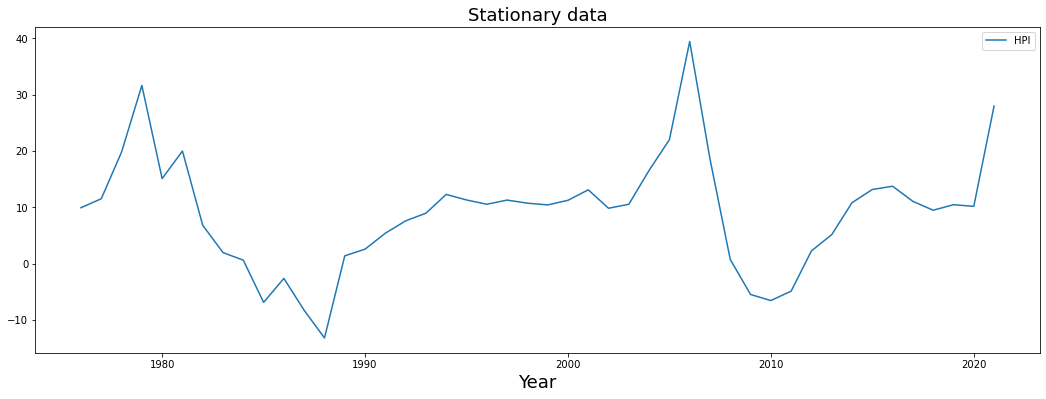

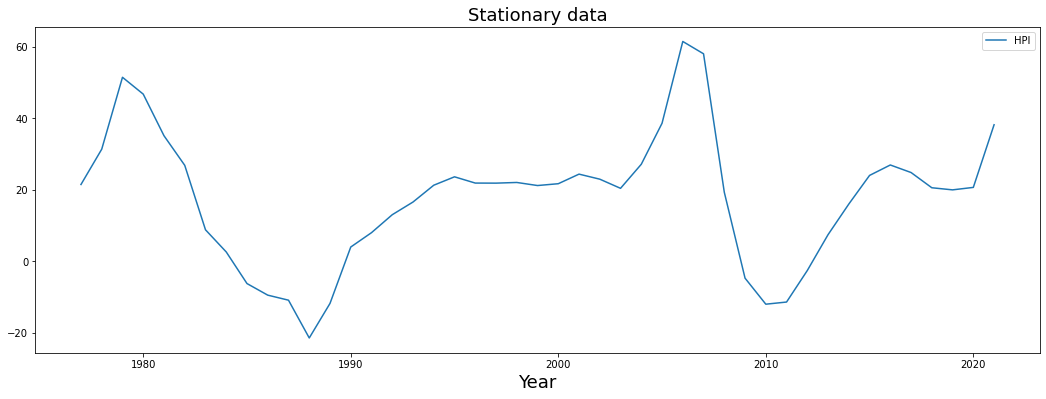

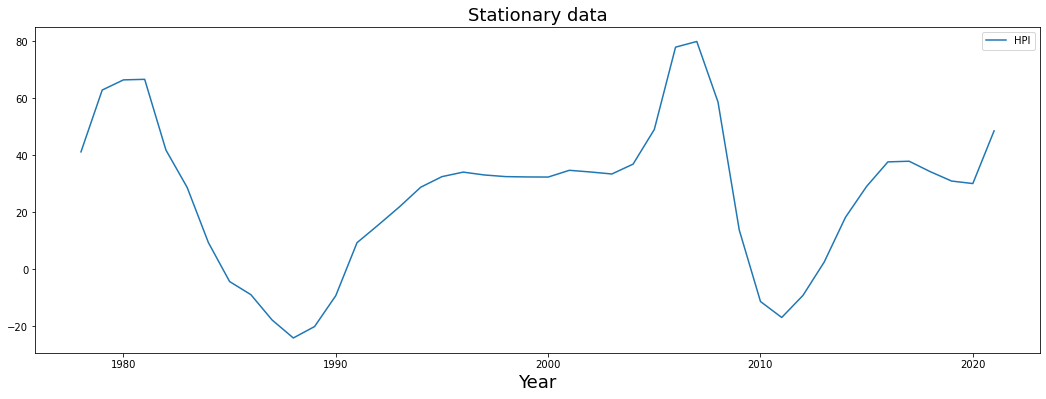

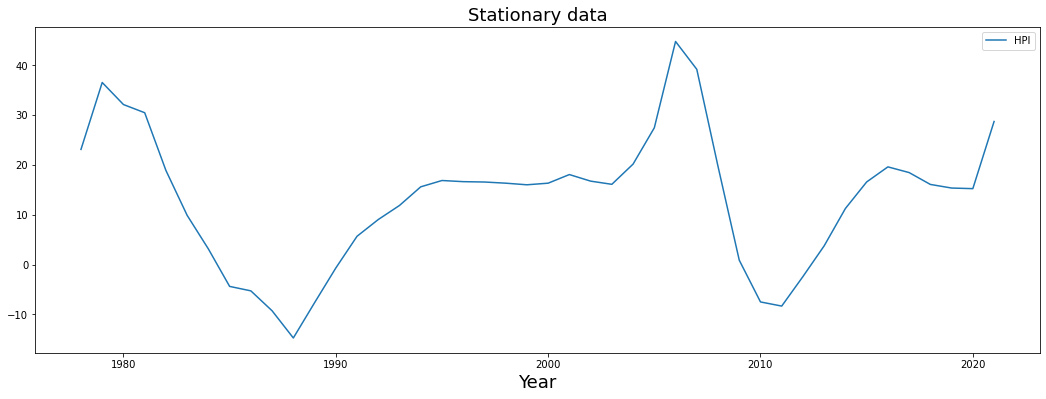

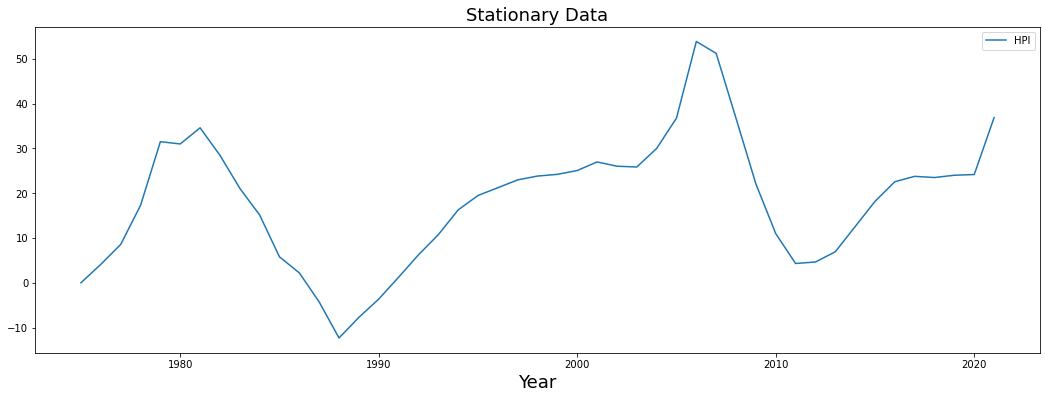

In [56]:
test_state(Louisiana)

## Maryland
third_order_diff

Differencing:


Test Statistic                 -4.046856
p-value                         0.001184
#Lags Used                      1.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64

None
Second order differencing:


Test Statistic                 -3.021910
p-value                         0.032898
#Lags Used                      7.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64

None
Third order differencing:


Test Statistic                 -4.742769
p-value                         0.000070
#Lags Used                     10.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                 -2.609740
p-value                         0.091001
#Lags Used                      3.000000
Number of Observations Used    40.000000
Critical Value (1%)            -3.605565
Critical Value (5%)            -2.937069
Critical Value (10%)           -2.606986
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                 -2.491277
p-value                         0.117611
#Lags Used                      2.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64

None


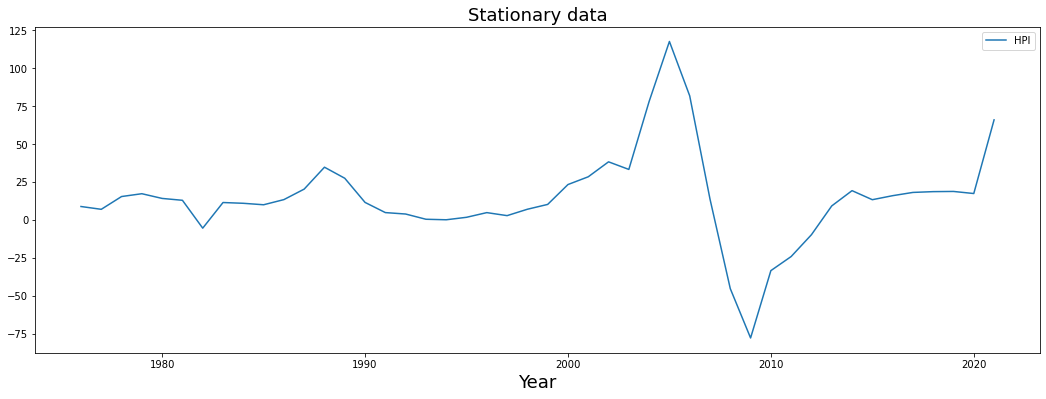

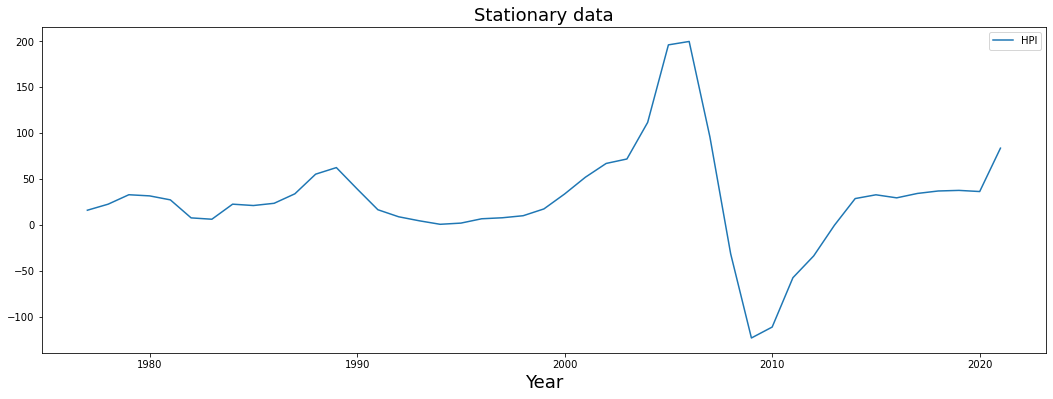

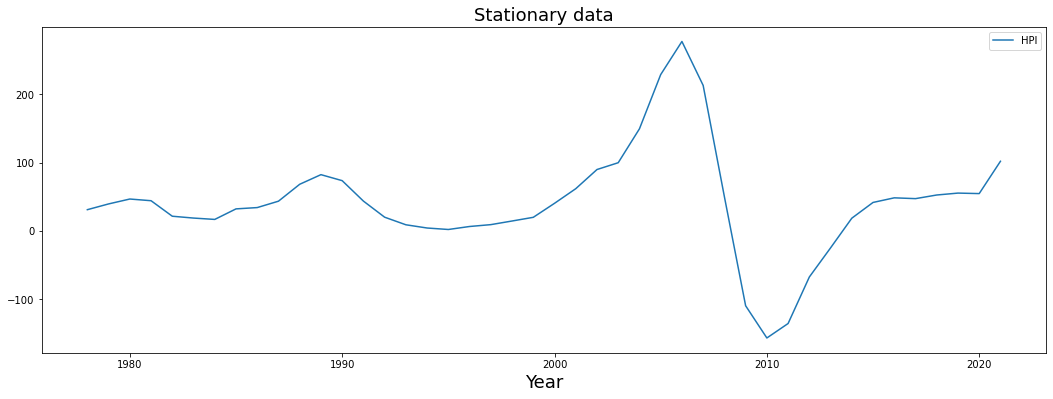

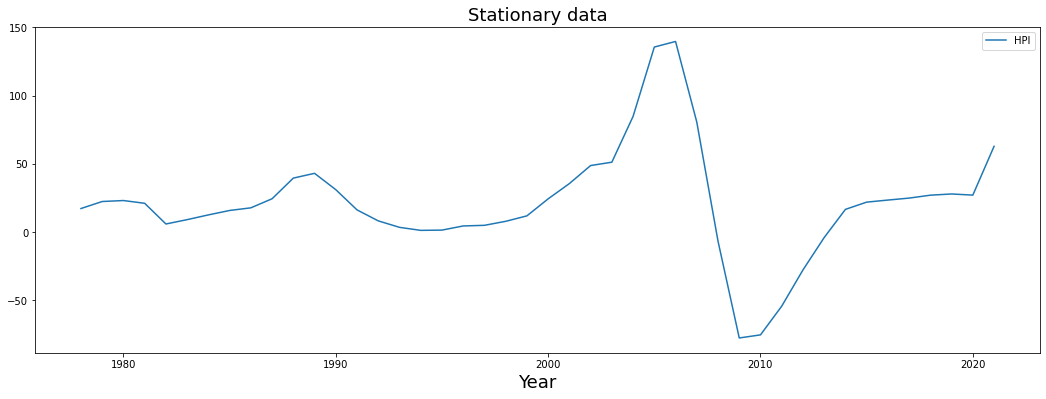

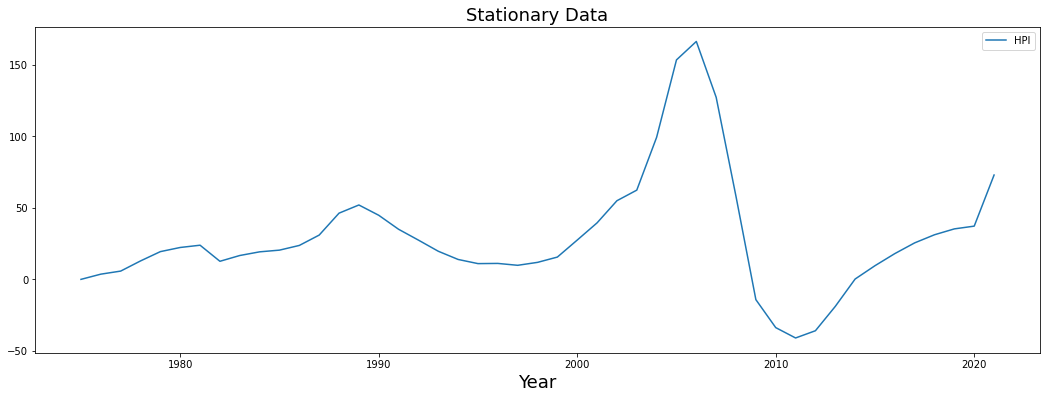

In [57]:
test_state(Maryland)

## Minnesota
third_order_diff between 95% - 99%

Differencing:


Test Statistic                 -2.137732
p-value                         0.229615
#Lags Used                      1.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64

None
Second order differencing:


Test Statistic                 -2.708311
p-value                         0.072611
#Lags Used                      3.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64

None
Third order differencing:


Test Statistic                 -3.342770
p-value                         0.013072
#Lags Used                     10.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                 -2.485108
p-value                         0.119140
#Lags Used                      1.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                 -2.208084
p-value                         0.203325
#Lags Used                      1.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64

None


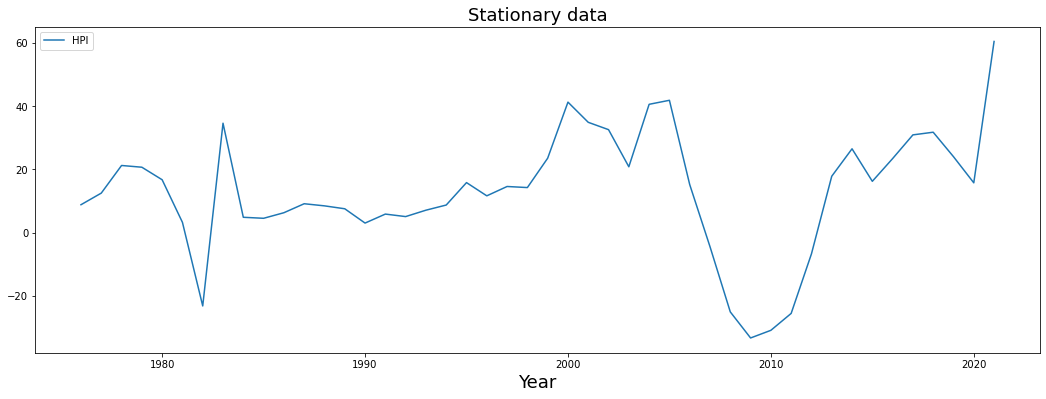

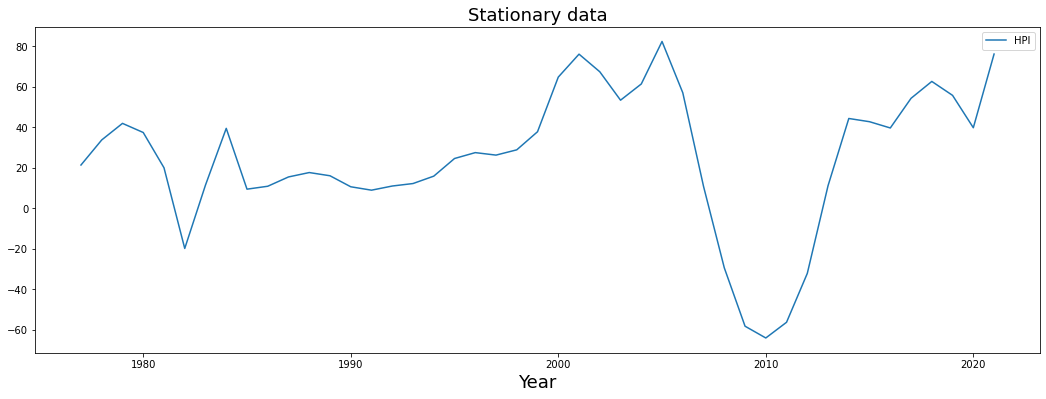

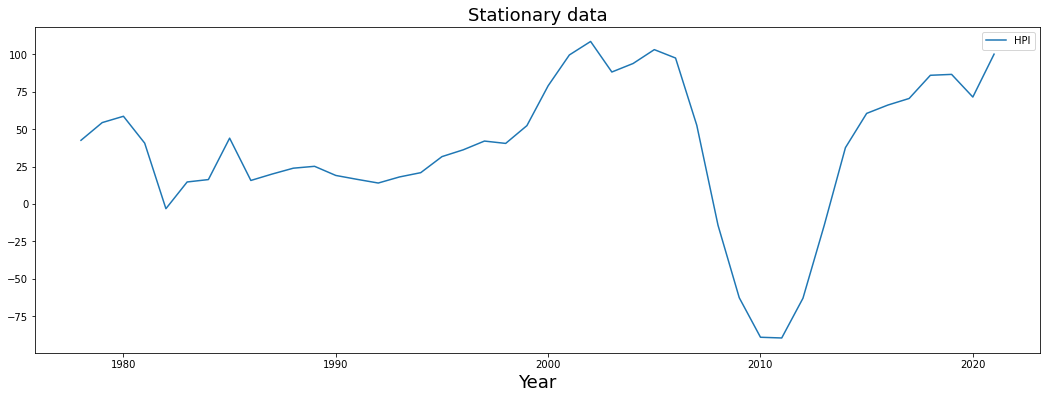

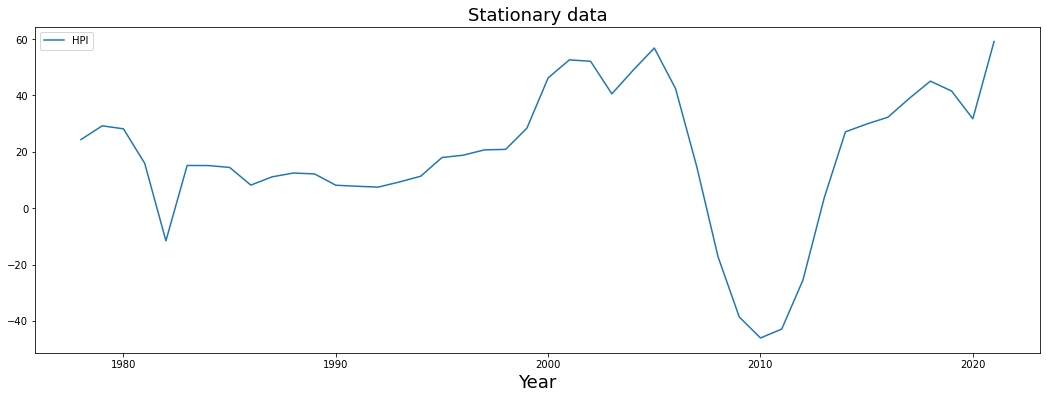

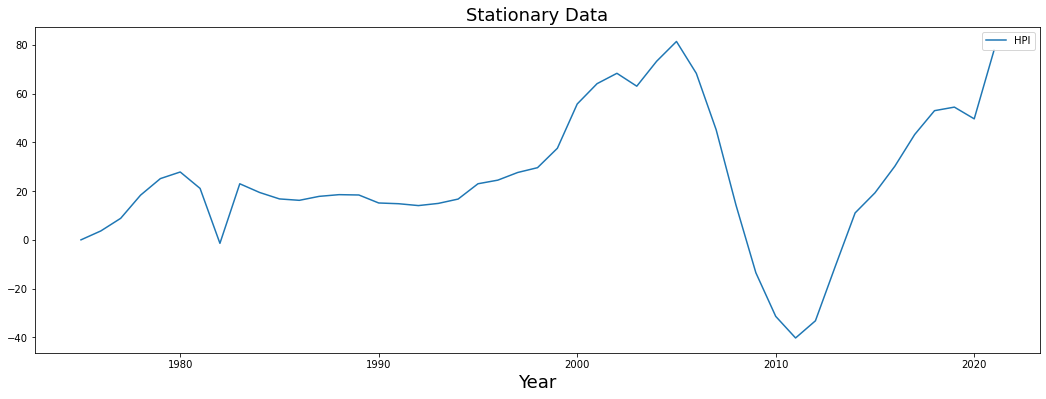

In [58]:
test_state(Minnesota)

## Mississippi

Differencing:


Test Statistic                 -2.781620
p-value                         0.060947
#Lags Used                      1.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64

None
Second order differencing:


Test Statistic                 -2.135629
p-value                         0.230431
#Lags Used                      2.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64

None
Third order differencing:


Test Statistic                 -3.591111
p-value                         0.005933
#Lags Used                     10.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                 -1.718637
p-value                         0.421536
#Lags Used                      2.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                 -2.734060
p-value                         0.068327
#Lags Used                      1.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64

None


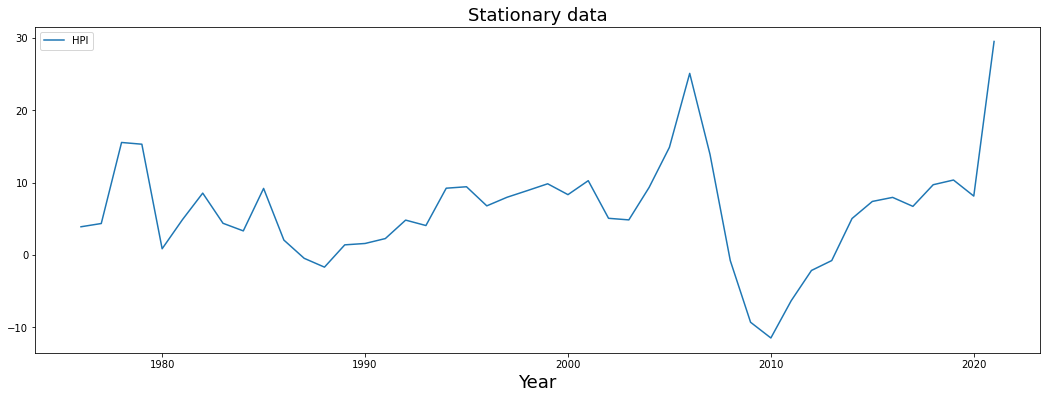

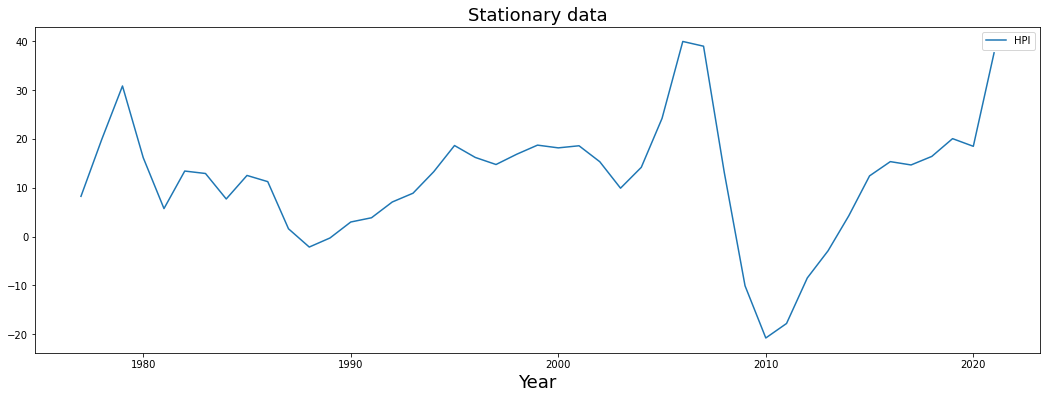

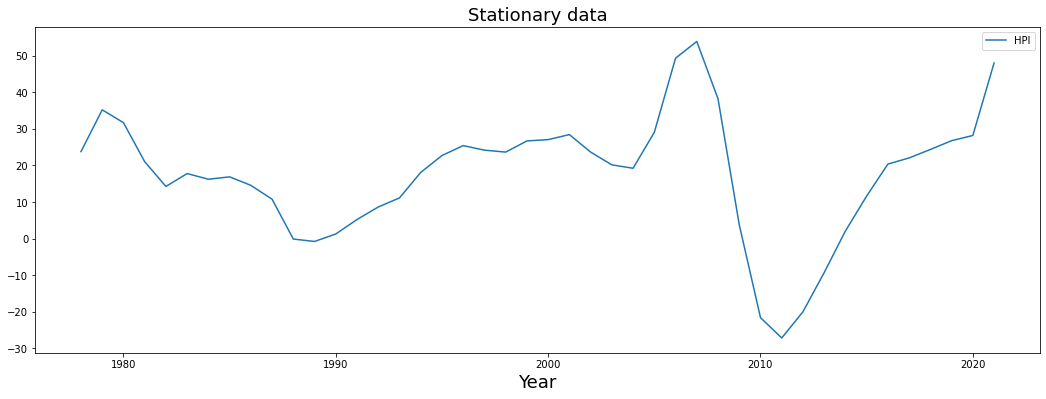

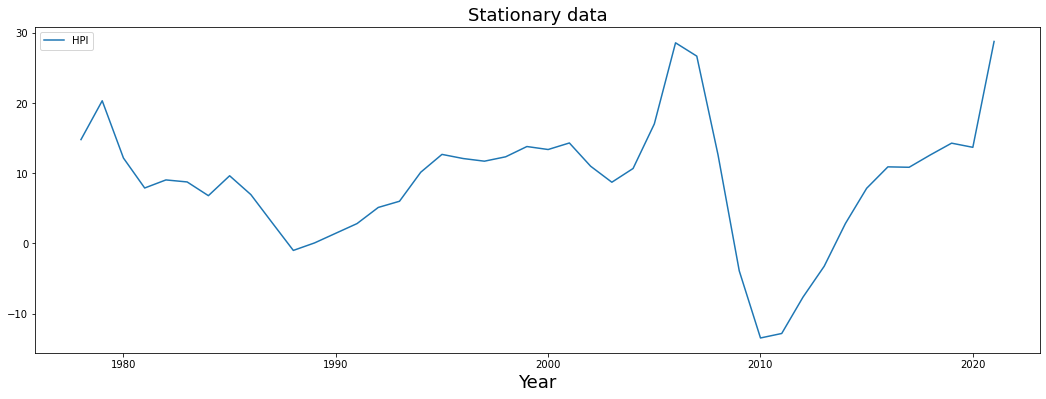

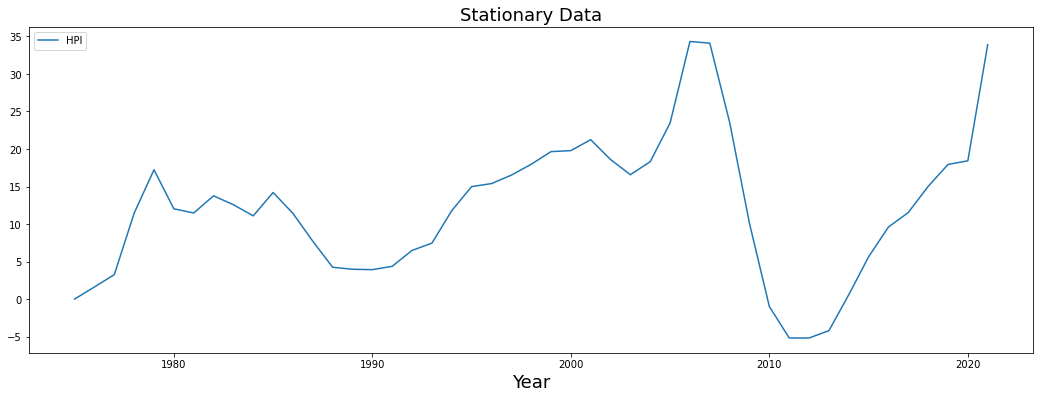

In [59]:
test_state(Mississippi)

## New Hampshire
third_order_diff between 95% - 99%

Differencing:


Test Statistic                 -1.631301
p-value                         0.466810
#Lags Used                      1.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64

None
Second order differencing:


Test Statistic                 -3.196797
p-value                         0.020171
#Lags Used                     10.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64

None
Third order differencing:


Test Statistic                 -3.615564
p-value                         0.005470
#Lags Used                     10.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                 -2.631206
p-value                         0.086718
#Lags Used                      1.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                 -2.651043
p-value                         0.082900
#Lags Used                      1.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64

None


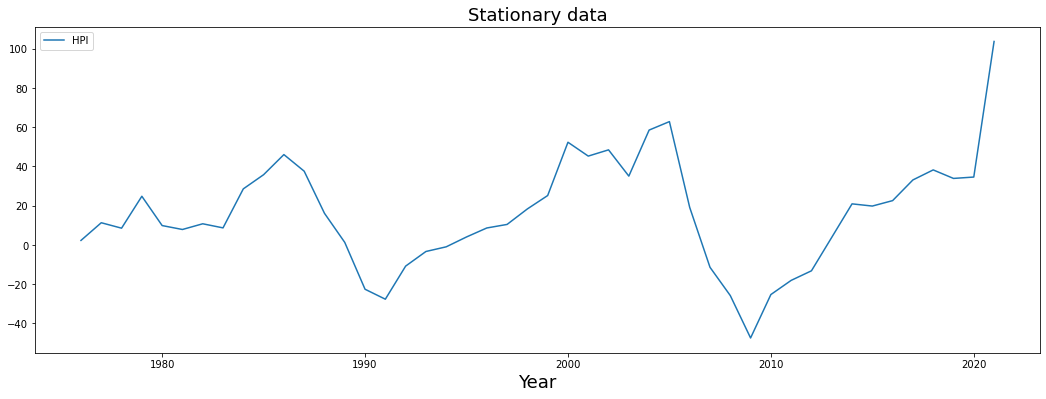

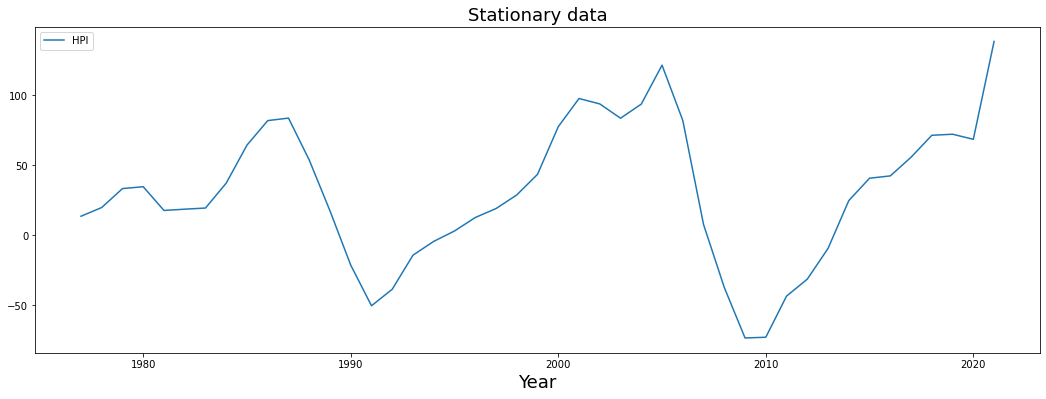

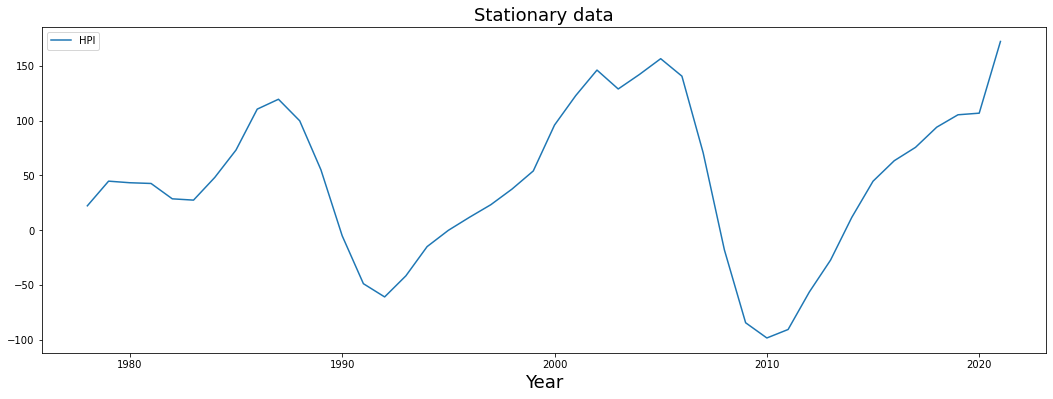

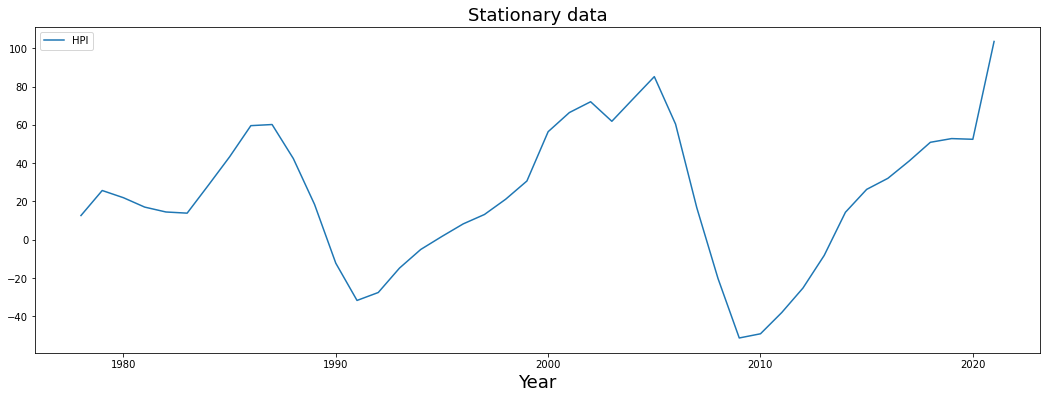

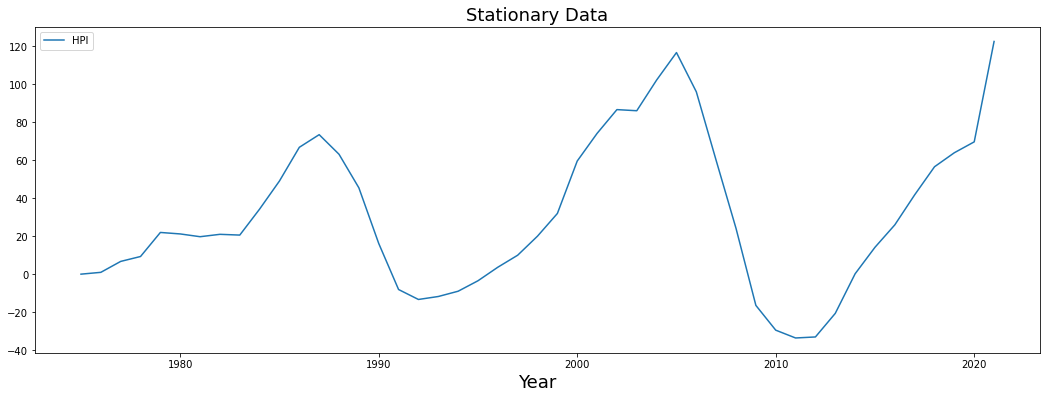

In [60]:
test_state(New_Hampshire)

## North Dakota

Differencing:


Test Statistic                 -0.661731
p-value                         0.856415
#Lags Used                      7.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64

None
Second order differencing:


Test Statistic                 -0.753266
p-value                         0.832466
#Lags Used                      7.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64

None
Third order differencing:


Test Statistic                 -0.431499
p-value                         0.904705
#Lags Used                      7.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                 -0.268453
p-value                         0.929855
#Lags Used                      7.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                 -0.524773
p-value                         0.887091
#Lags Used                      5.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64

None


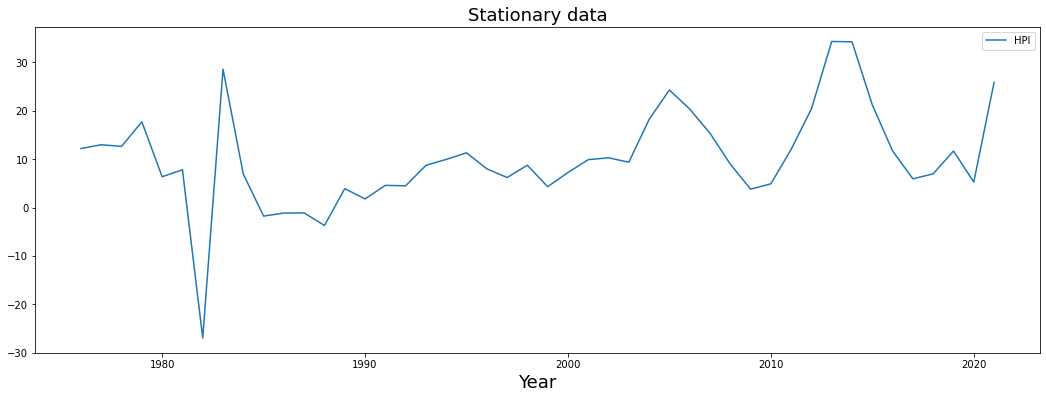

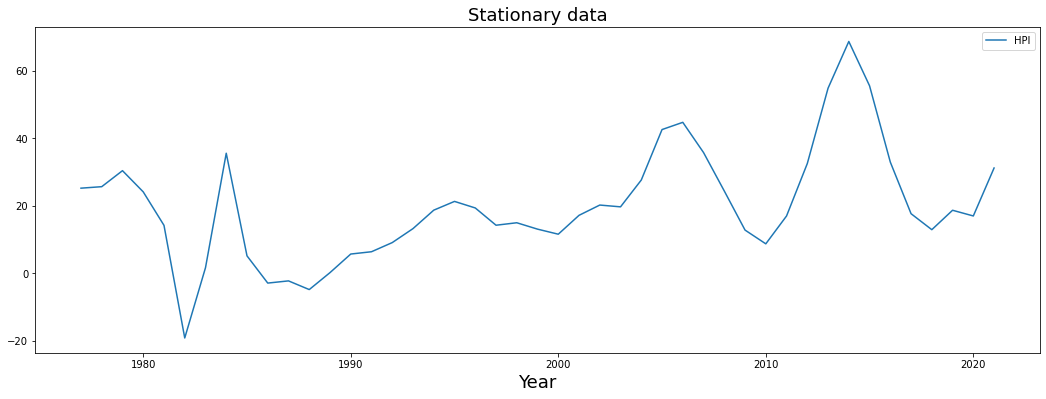

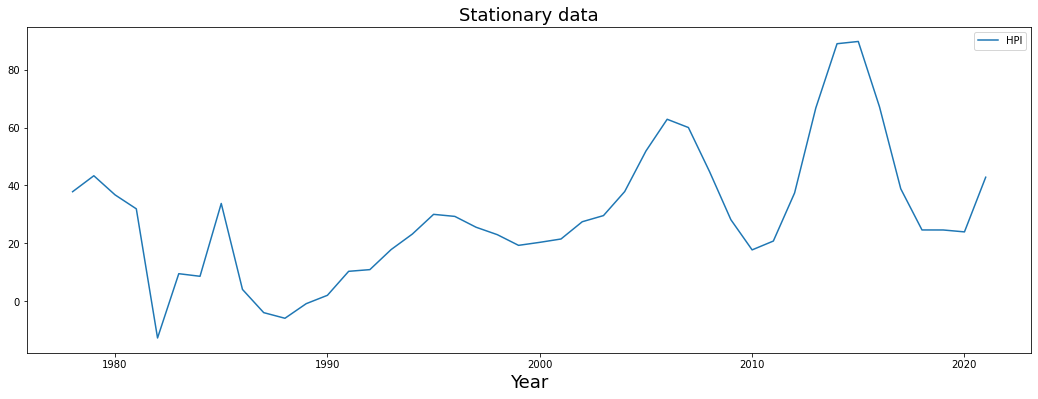

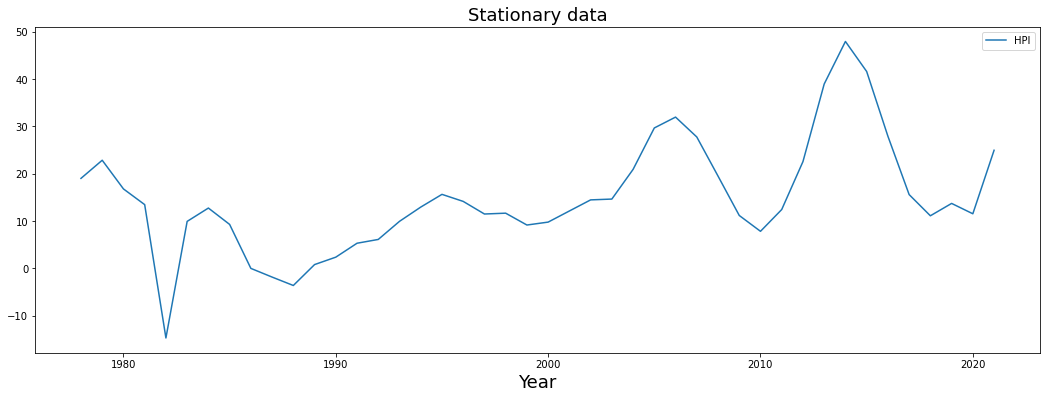

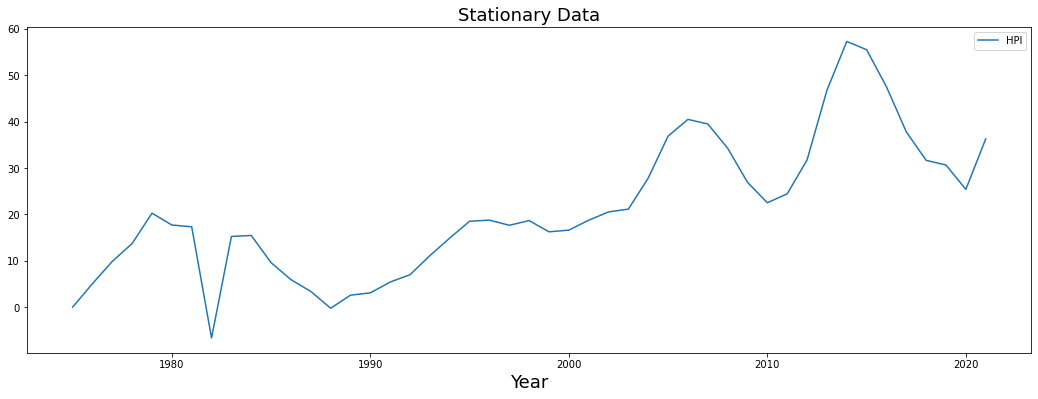

In [61]:
test_state(North_Dakota)

## Ohio
third_order_diff between 95% - 99% 

Differencing:


Test Statistic                 -0.838972
p-value                         0.807405
#Lags Used                      0.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64

None
Second order differencing:


Test Statistic                 -1.100018
p-value                         0.715065
#Lags Used                      3.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64

None
Third order differencing:


Test Statistic                 -3.285624
p-value                         0.015533
#Lags Used                     10.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                 -2.758088
p-value                         0.064514
#Lags Used                     10.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                 -2.849965
p-value                         0.051483
#Lags Used                      7.000000
Number of Observations Used    39.000000
Critical Value (1%)            -3.610400
Critical Value (5%)            -2.939109
Critical Value (10%)           -2.608063
dtype: float64

None


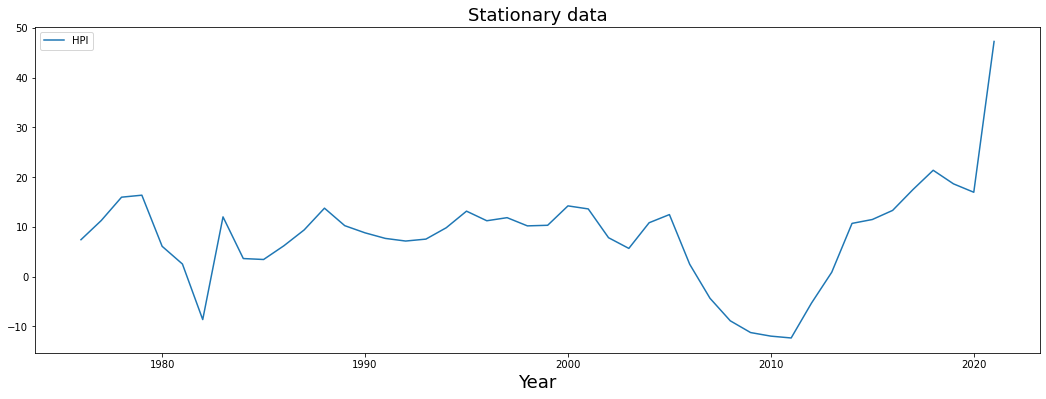

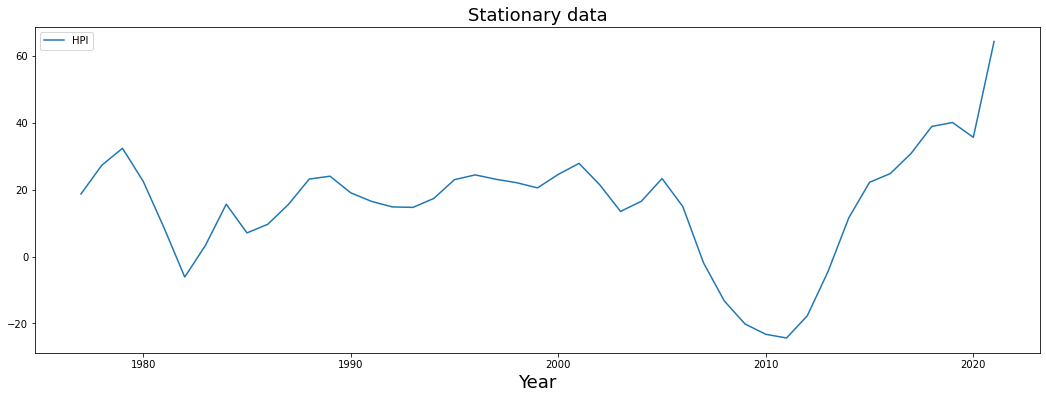

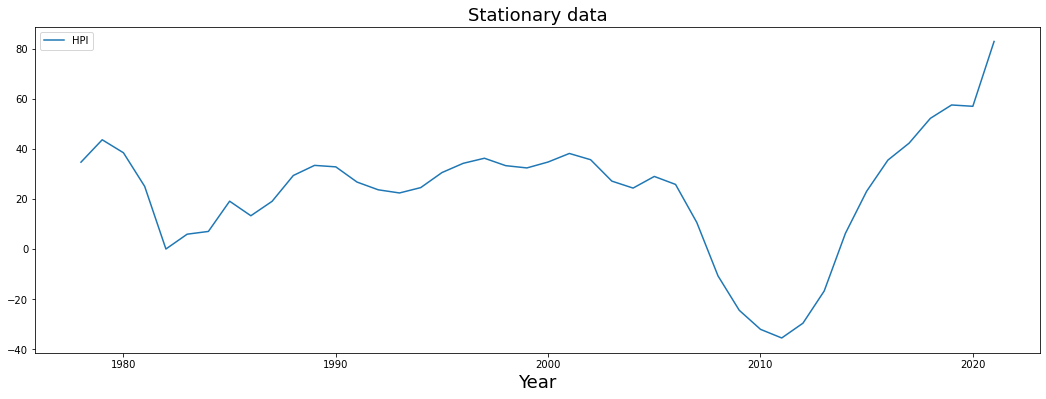

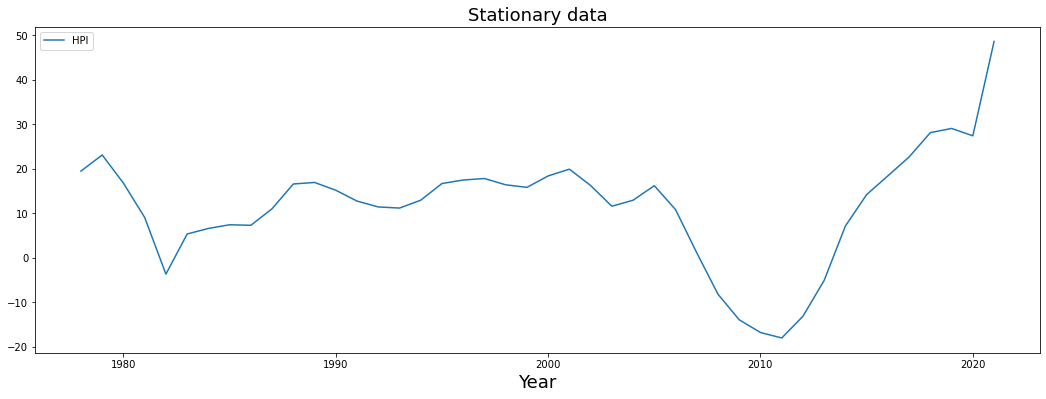

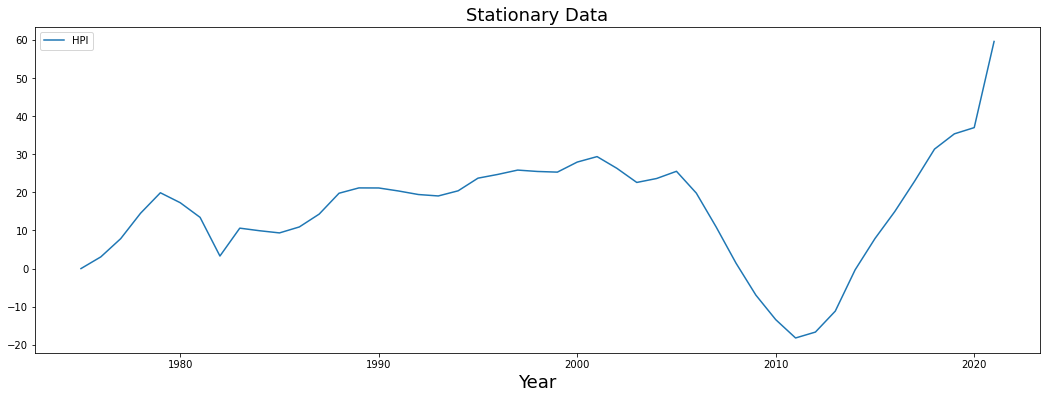

In [62]:
test_state(Ohio)

## Oklahoma

Differencing:


Test Statistic                 -1.281785
p-value                         0.637464
#Lags Used                      0.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64

None
Second order differencing:


Test Statistic                 -1.358464
p-value                         0.602019
#Lags Used                      4.000000
Number of Observations Used    40.000000
Critical Value (1%)            -3.605565
Critical Value (5%)            -2.937069
Critical Value (10%)           -2.606986
dtype: float64

None
Third order differencing:


Test Statistic                 -0.723718
p-value                         0.840510
#Lags Used                      8.000000
Number of Observations Used    35.000000
Critical Value (1%)            -3.632743
Critical Value (5%)            -2.948510
Critical Value (10%)           -2.613017
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                 -2.148156
p-value                         0.225597
#Lags Used                      1.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                 -1.781742
p-value                         0.389563
#Lags Used                      1.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64

None


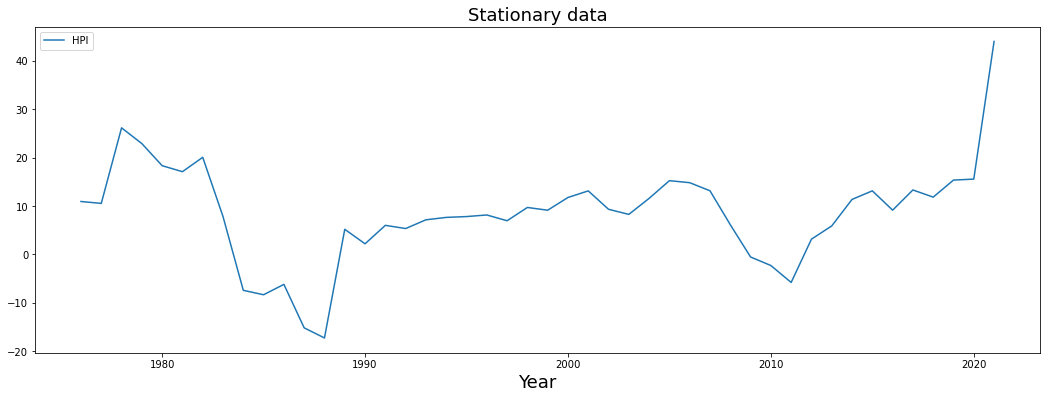

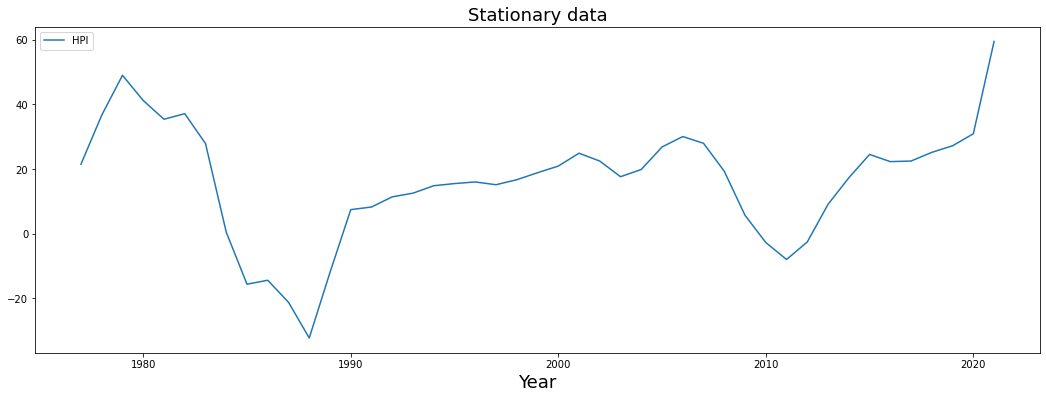

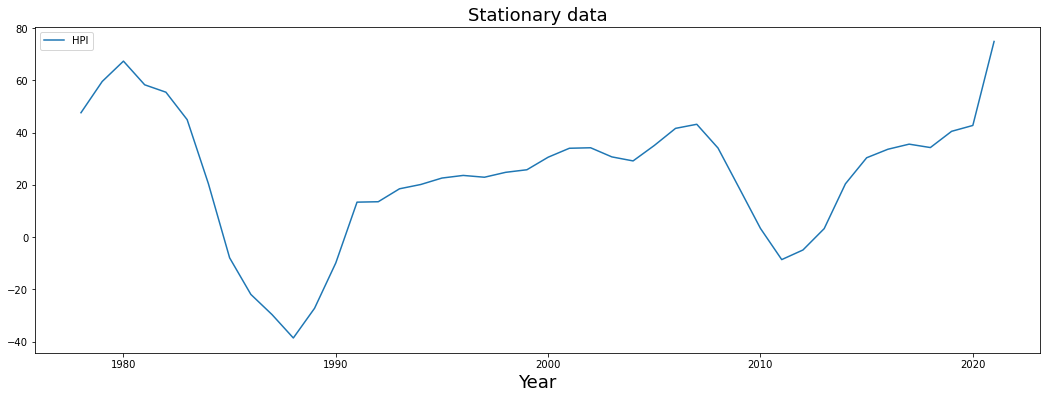

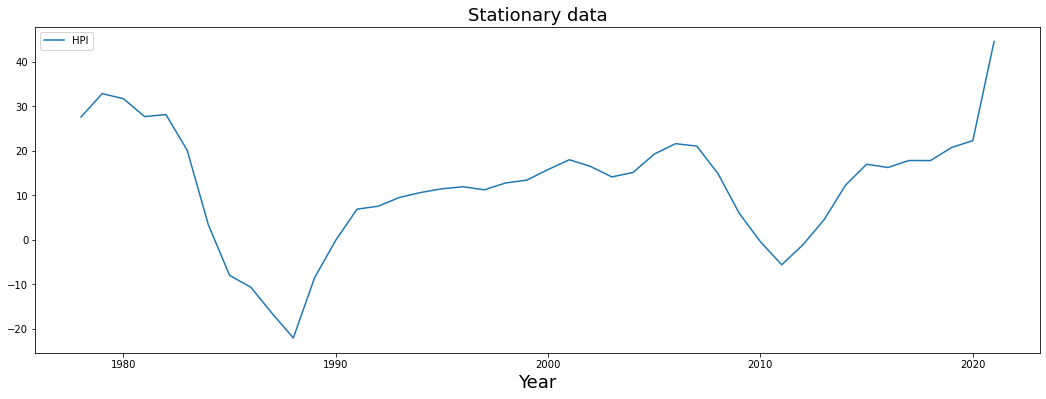

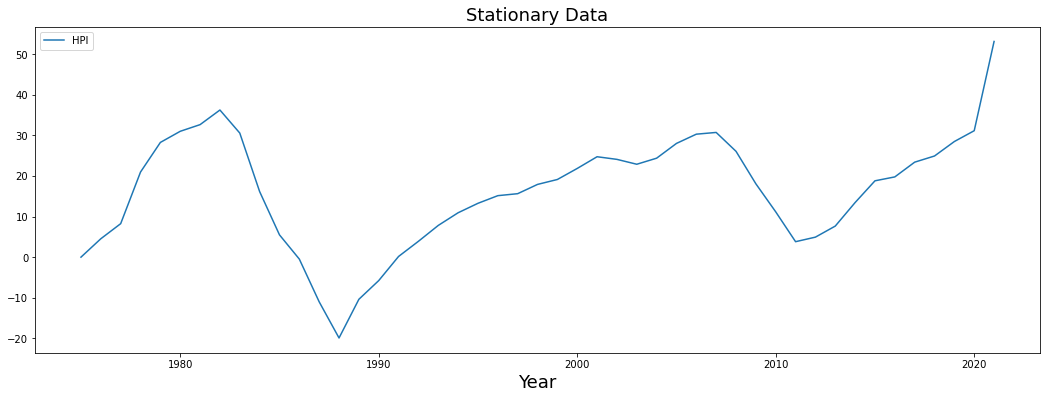

In [63]:
test_state(Oklahoma)

## Pennsylvania

Differencing:


Test Statistic                 -2.263760
p-value                         0.183922
#Lags Used                      1.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64

None
Second order differencing:


Test Statistic                 -3.636246
p-value                         0.005105
#Lags Used                     10.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64

None
Third order differencing:


Test Statistic                 -4.744417
p-value                         0.000069
#Lags Used                     10.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                 -3.756261
p-value                         0.003388
#Lags Used                     10.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                 -2.213125
p-value                         0.201517
#Lags Used                      3.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64

None


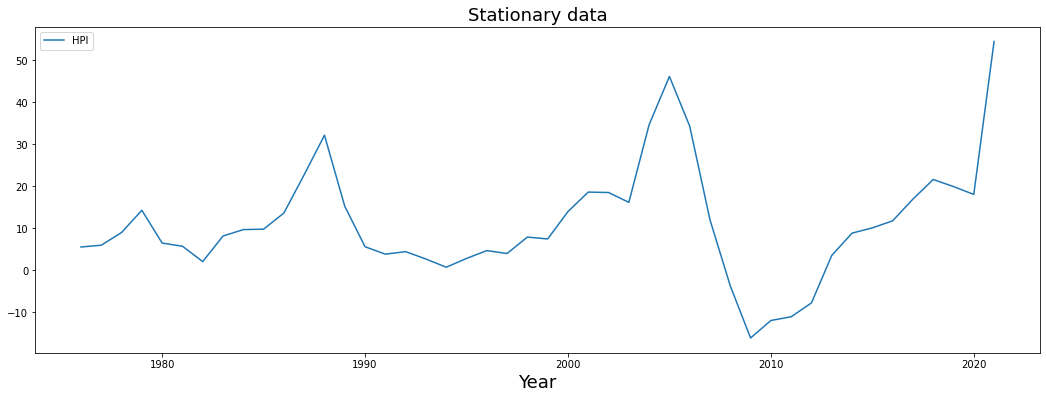

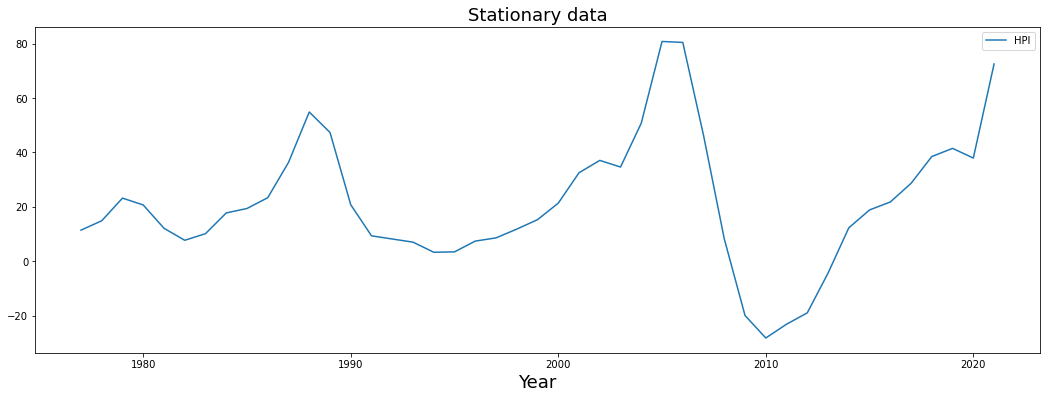

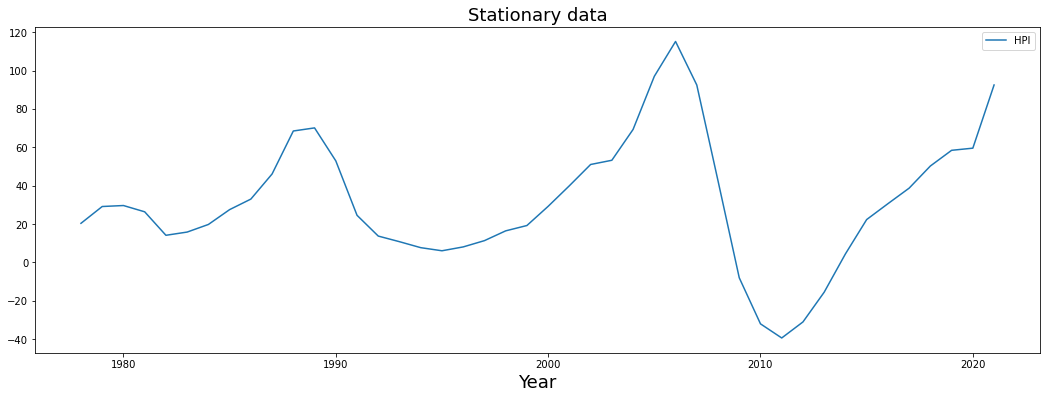

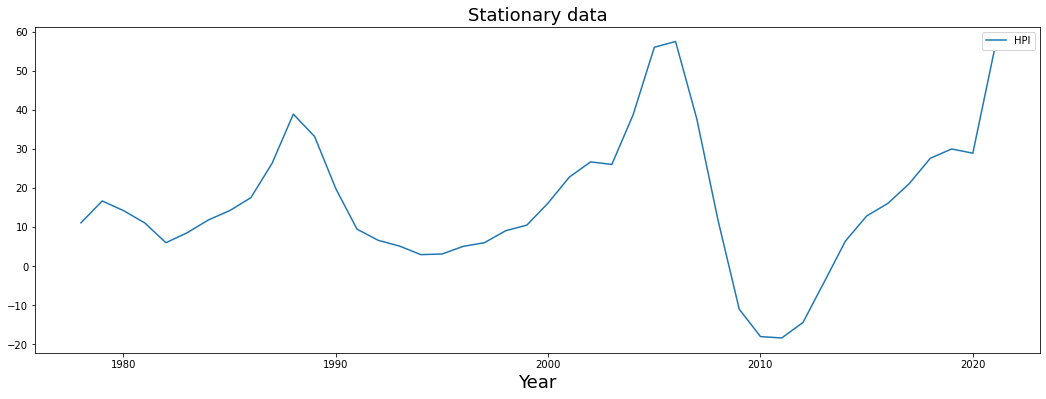

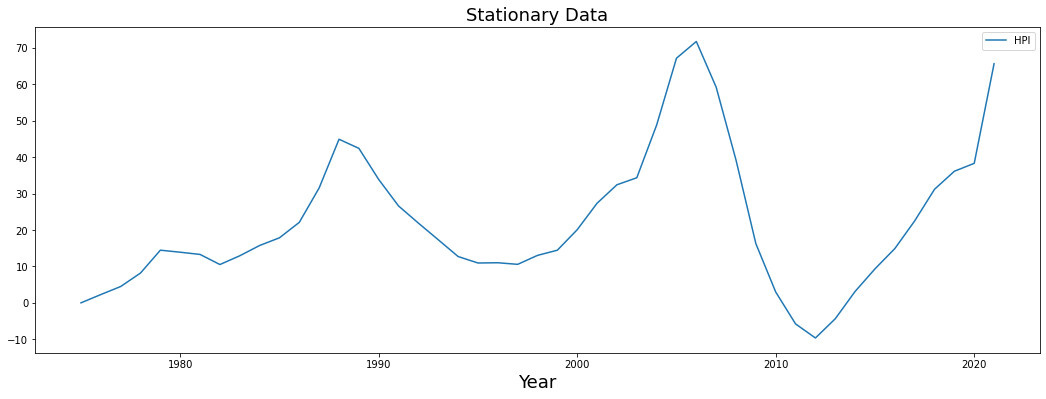

In [64]:
test_state(Pennsylvania)

## South Dakota
diff between 95% - 99% 

Differencing:


Test Statistic                 -3.005495
p-value                         0.034384
#Lags Used                      0.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64

None
Second order differencing:


Test Statistic                 -0.884750
p-value                         0.792953
#Lags Used                      1.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64

None
Third order differencing:


Test Statistic                 -0.593236
p-value                         0.872503
#Lags Used                      1.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                 -0.353780
p-value                         0.917534
#Lags Used                      1.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                  0.203887
p-value                         0.972479
#Lags Used                      1.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64

None


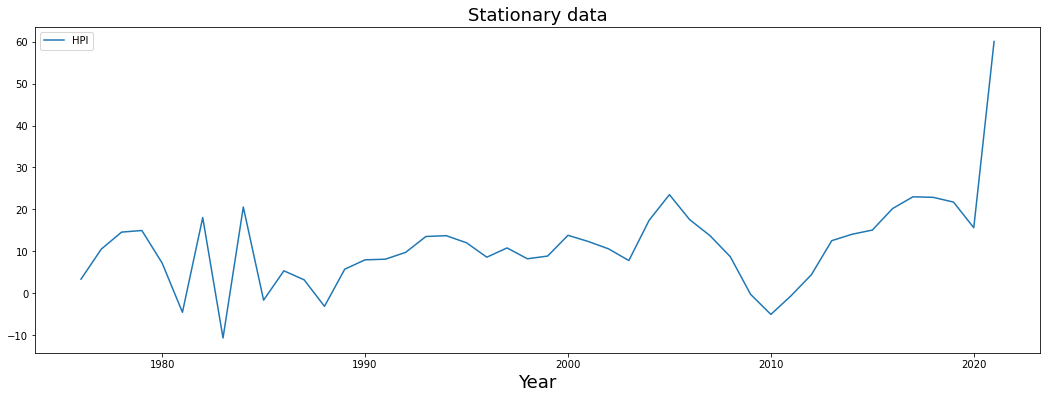

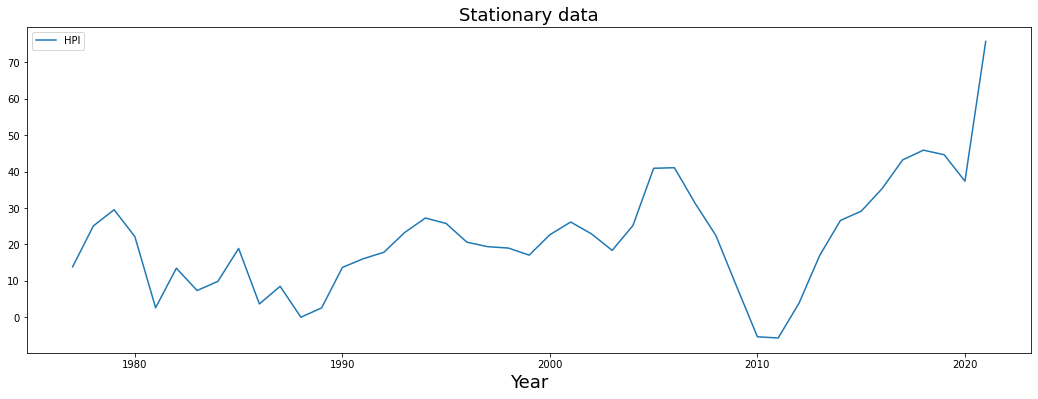

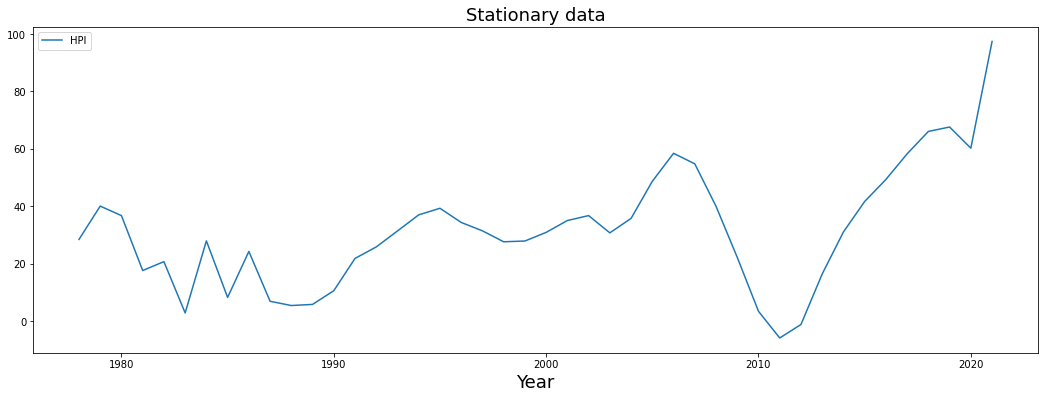

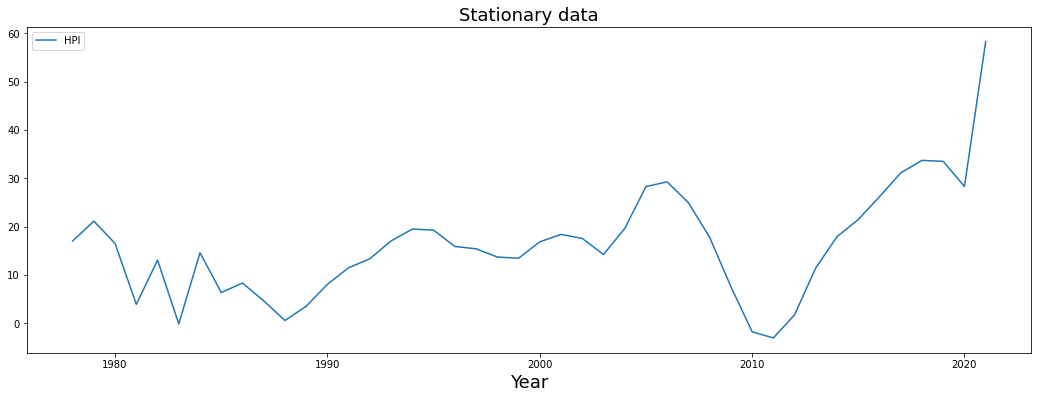

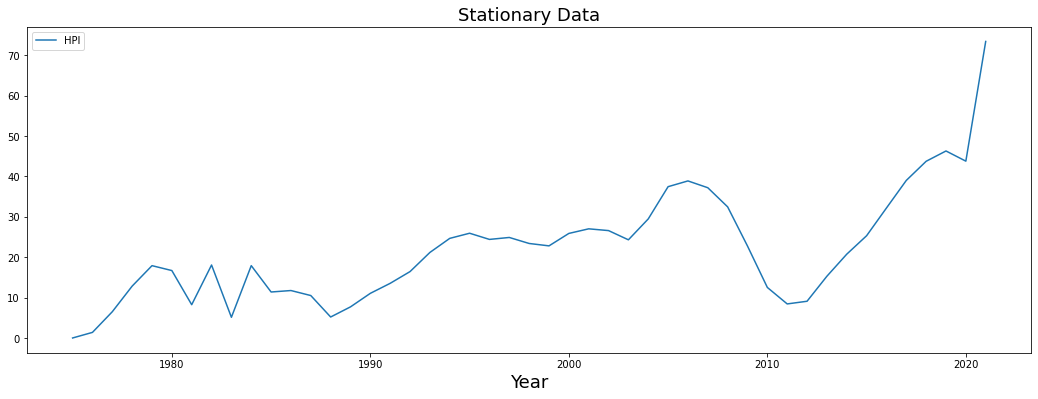

In [65]:
test_state(South_Dakota)

## Tennessee 

Differencing:


Test Statistic                 -0.181435
p-value                         0.940699
#Lags Used                      2.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64

None
Second order differencing:


Test Statistic                  0.400160
p-value                         0.981501
#Lags Used                      2.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64

None
Third order differencing:


Test Statistic                 -2.241483
p-value                         0.191535
#Lags Used                     10.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                 -1.481765
p-value                         0.542512
#Lags Used                     10.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                  0.620927
p-value                         0.988120
#Lags Used                      2.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64

None


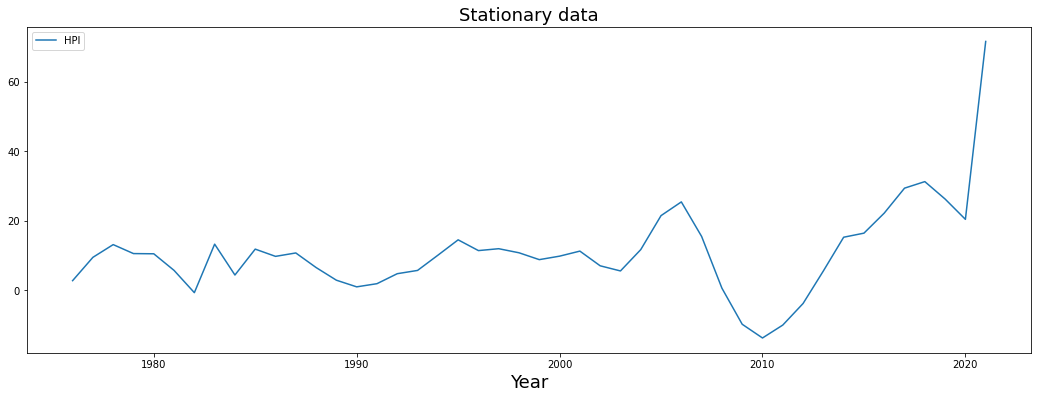

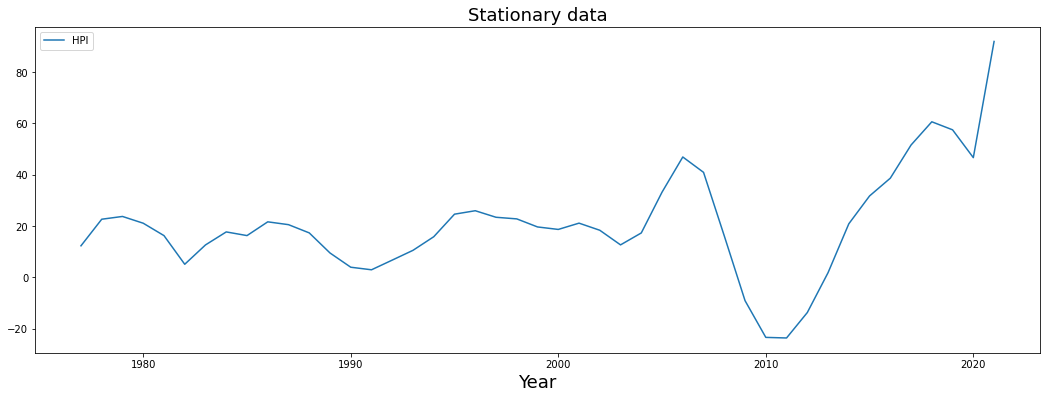

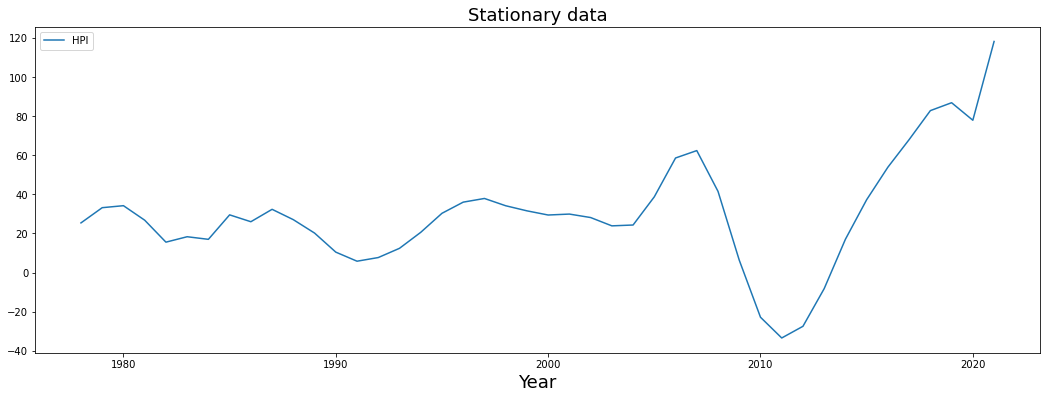

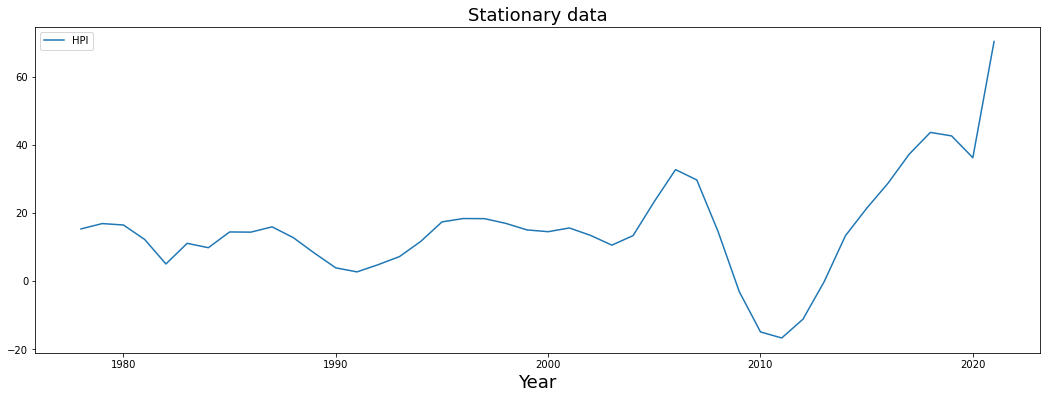

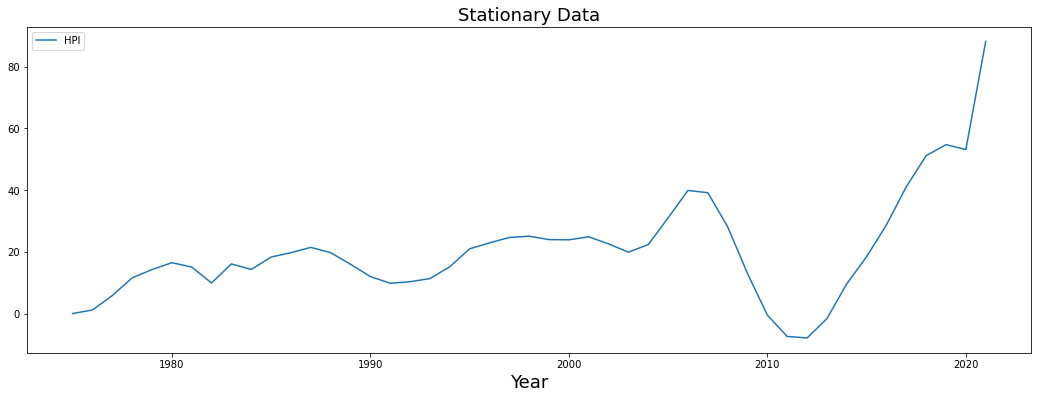

In [66]:
test_state(Tennessee)

## Texas

Differencing:


Test Statistic                 -0.679381
p-value                         0.852018
#Lags Used                      0.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64

None
Second order differencing:


Test Statistic                  0.650804
p-value                         0.988803
#Lags Used                      4.000000
Number of Observations Used    40.000000
Critical Value (1%)            -3.605565
Critical Value (5%)            -2.937069
Critical Value (10%)           -2.606986
dtype: float64

None
Third order differencing:


Test Statistic                  0.211132
p-value                         0.972879
#Lags Used                      2.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                  0.242802
p-value                         0.974563
#Lags Used                      2.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                  0.911959
p-value                         0.993244
#Lags Used                      2.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64

None


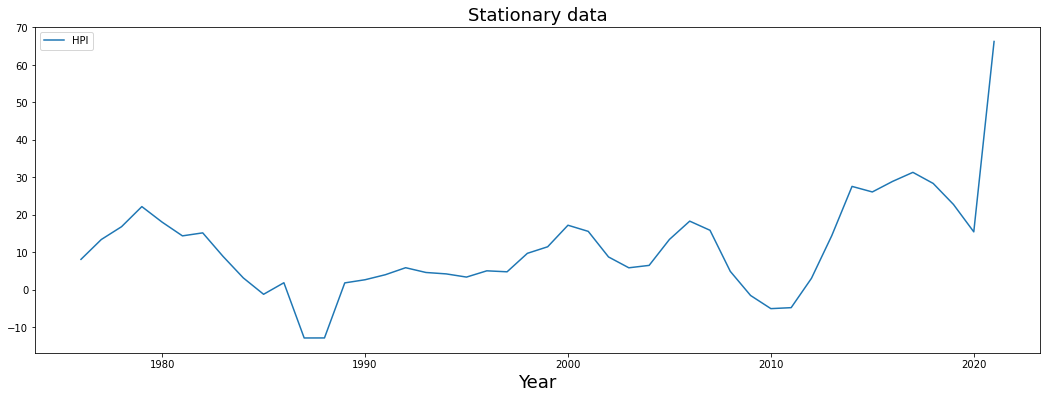

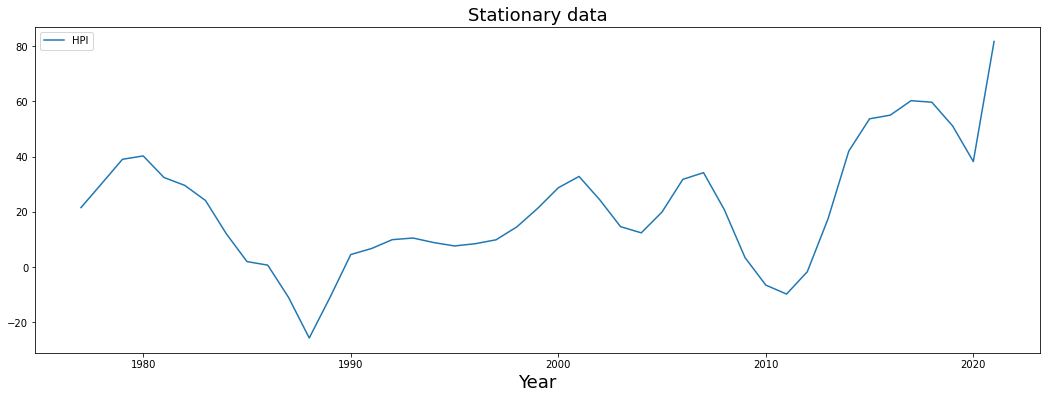

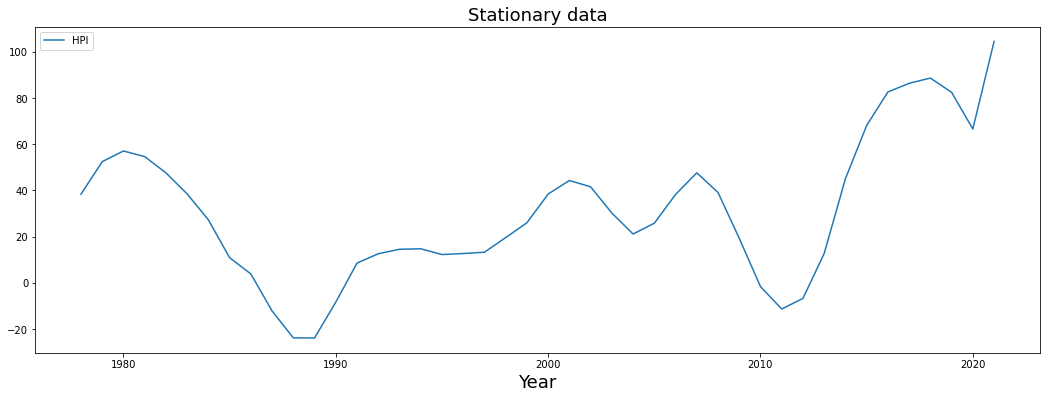

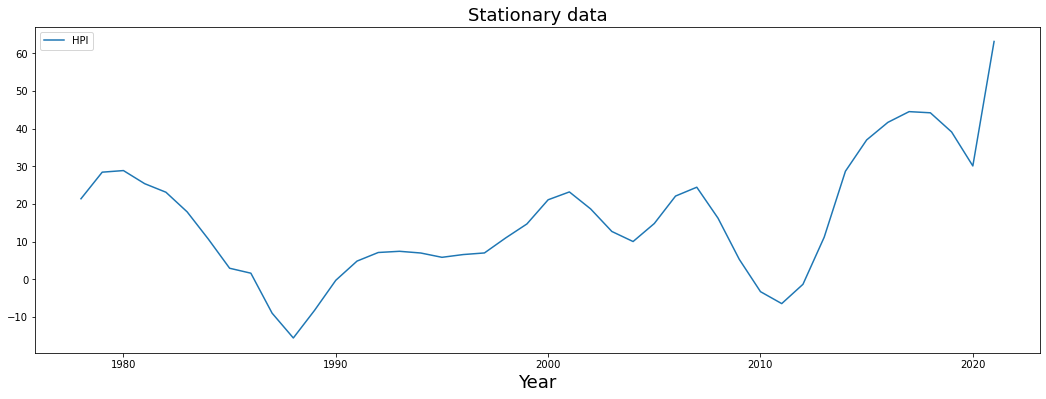

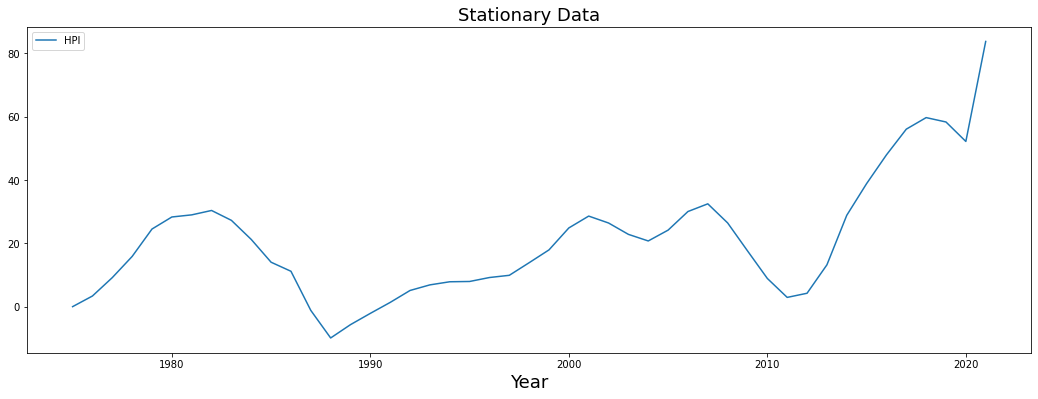

In [67]:
test_state(Texas)

## Utah

Differencing:


Test Statistic                 -0.180683
p-value                         0.940785
#Lags Used                      2.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64

None
Second order differencing:


Test Statistic                 -0.612843
p-value                         0.868053
#Lags Used                     10.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64

None
Third order differencing:


Test Statistic                 -0.638166
p-value                         0.862123
#Lags Used                      9.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                  0.556386
p-value                         0.986490
#Lags Used                      2.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                  1.159285
p-value                         0.995692
#Lags Used                      2.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64

None


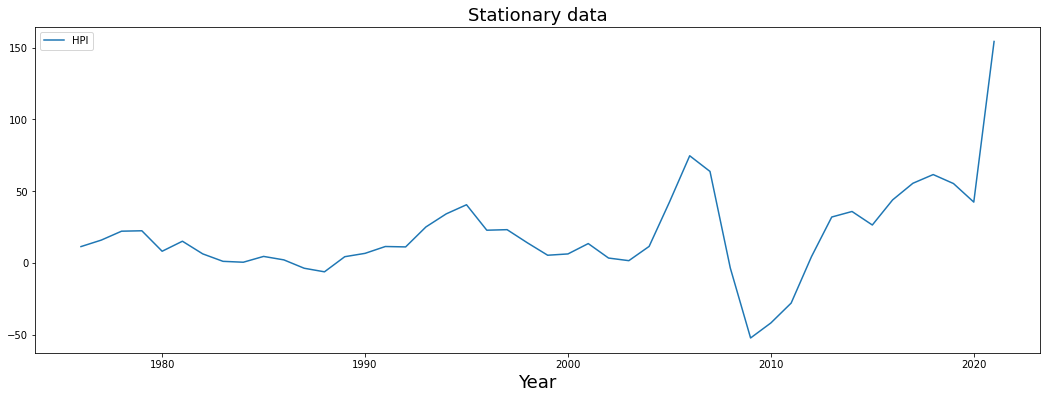

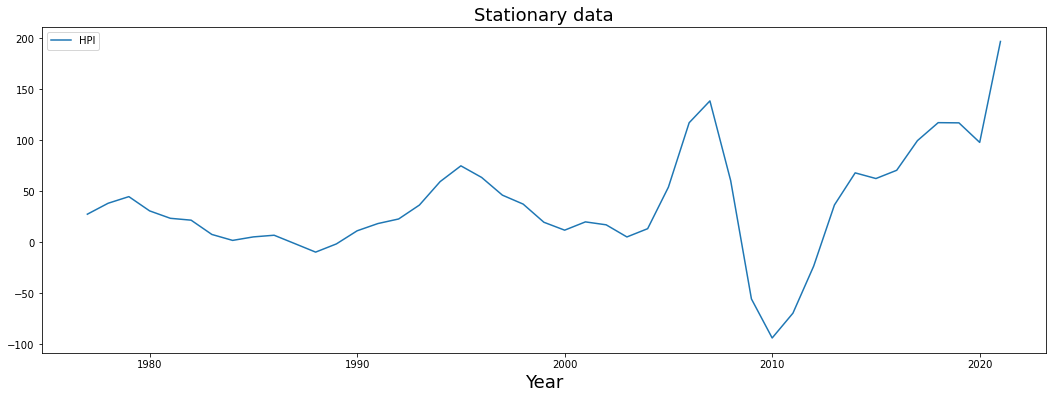

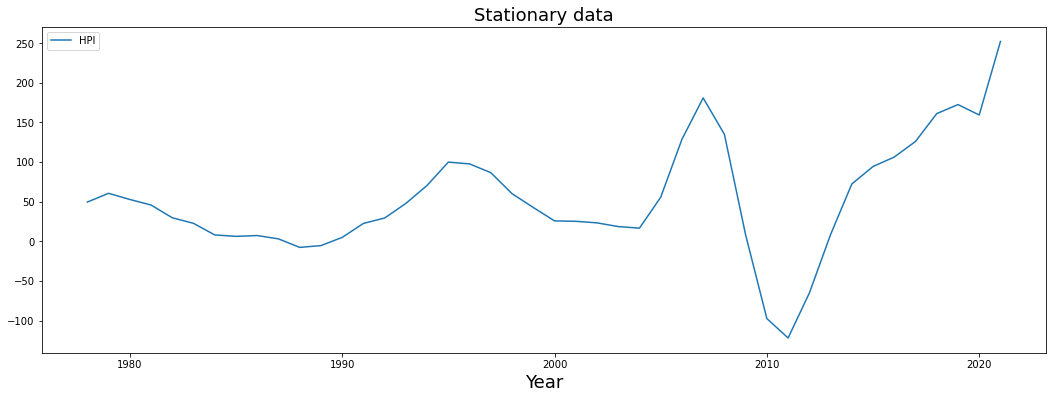

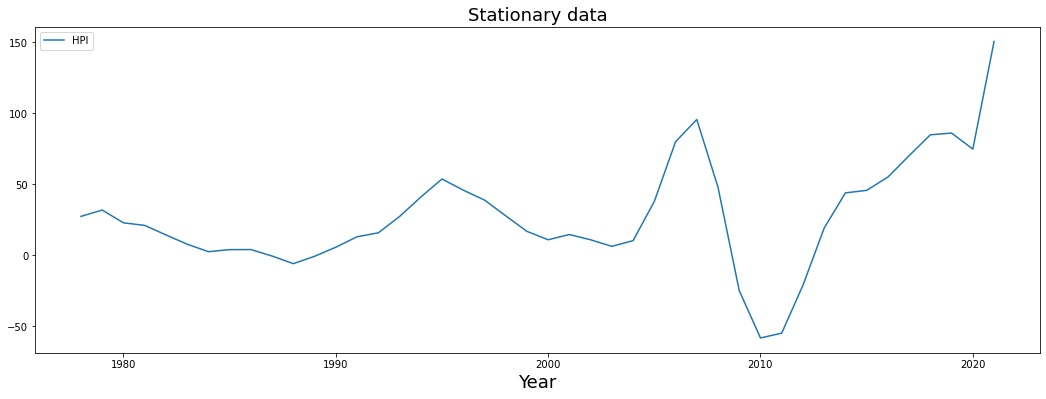

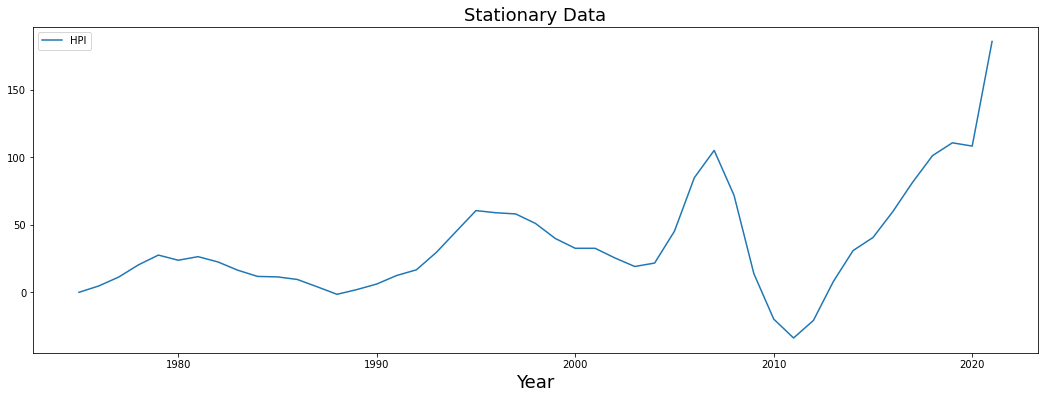

In [68]:
test_state(Utah)

## West Virginia

Differencing:


Test Statistic                 -2.956875
p-value                         0.039123
#Lags Used                      3.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64

None
Second order differencing:


Test Statistic                 -4.327741
p-value                         0.000398
#Lags Used                      3.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64

None
Third order differencing:


Test Statistic                 -3.987360
p-value                         0.001478
#Lags Used                      2.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                 -3.115970
p-value                         0.025394
#Lags Used                      1.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                 -2.669052
p-value                         0.079548
#Lags Used                      1.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64

None


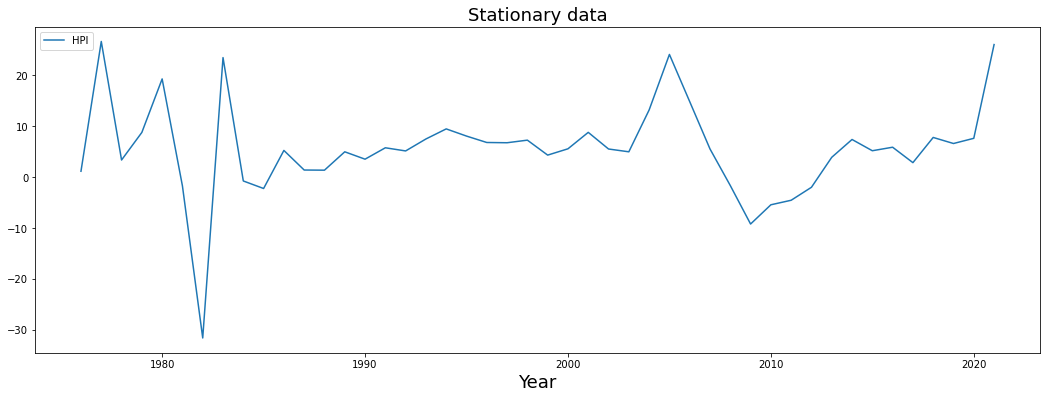

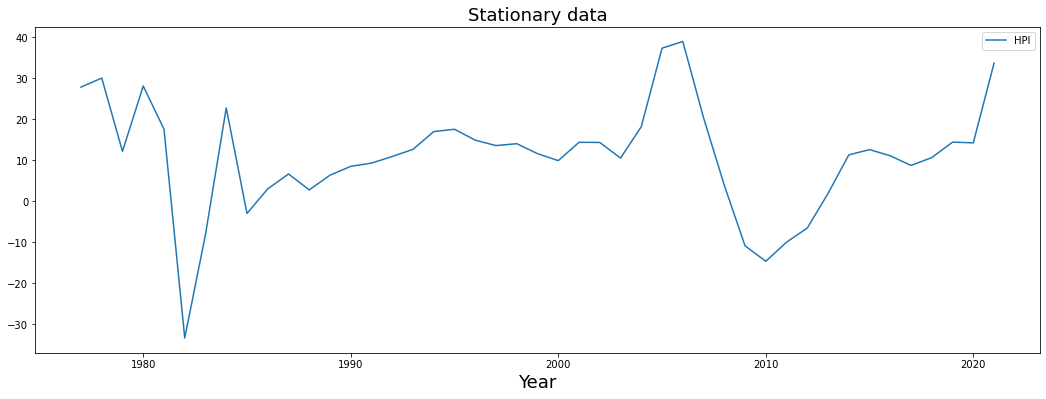

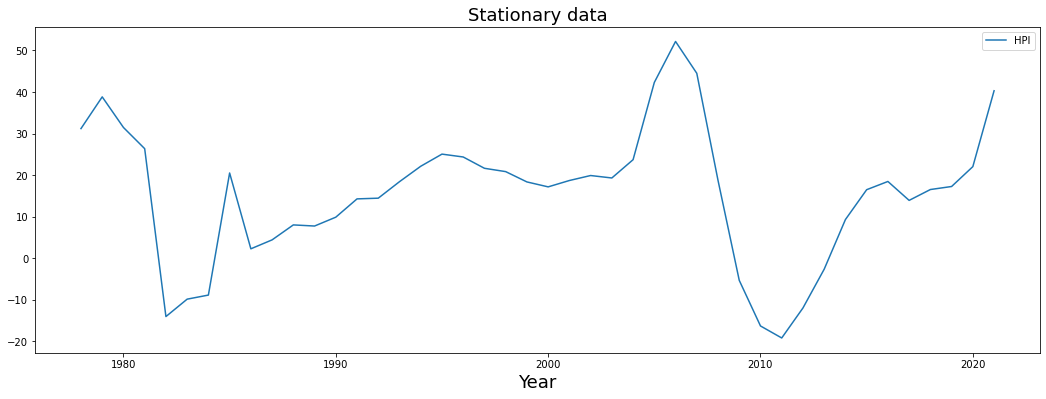

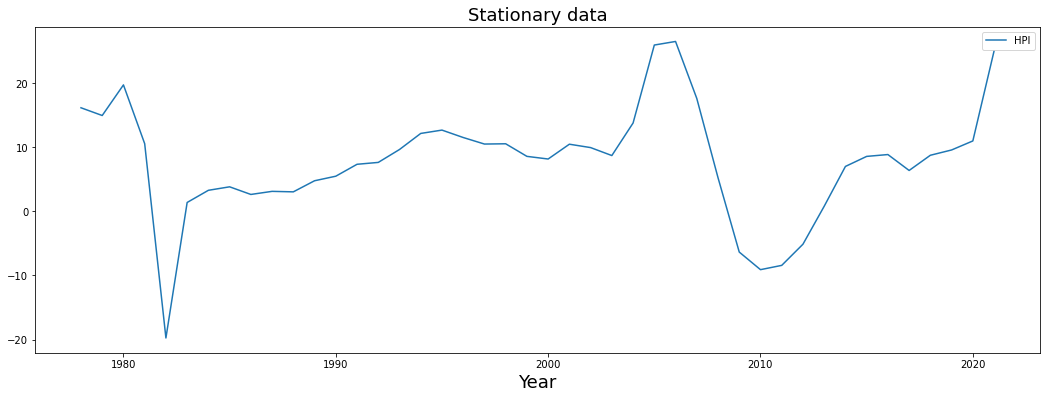

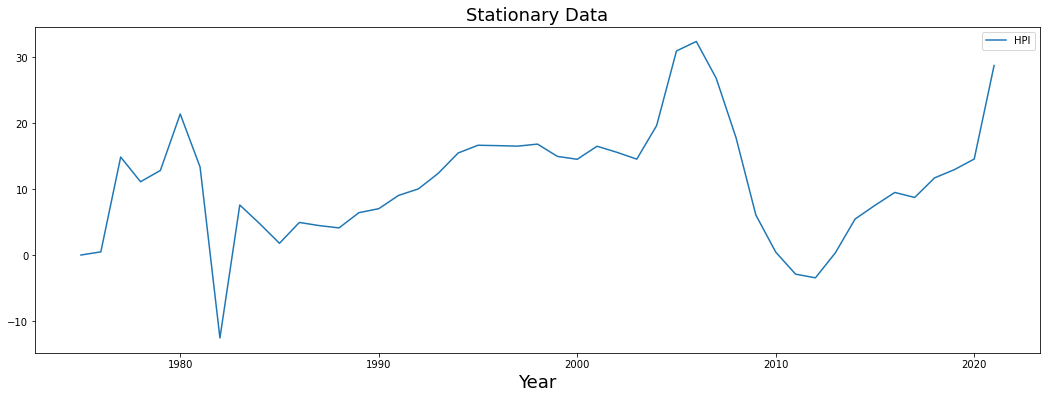

In [69]:
test_state(West_Virginia)

## Wisconsin

Differencing:


Test Statistic                 -1.640669
p-value                         0.461911
#Lags Used                      0.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64

None
Second order differencing:


Test Statistic                 -2.610257
p-value                         0.090896
#Lags Used                      1.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64

None
Third order differencing:


Test Statistic                 -2.996708
p-value                         0.035203
#Lags Used                      1.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                 -2.228849
p-value                         0.195942
#Lags Used                      1.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                 -1.903947
p-value                         0.330206
#Lags Used                      1.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64

None


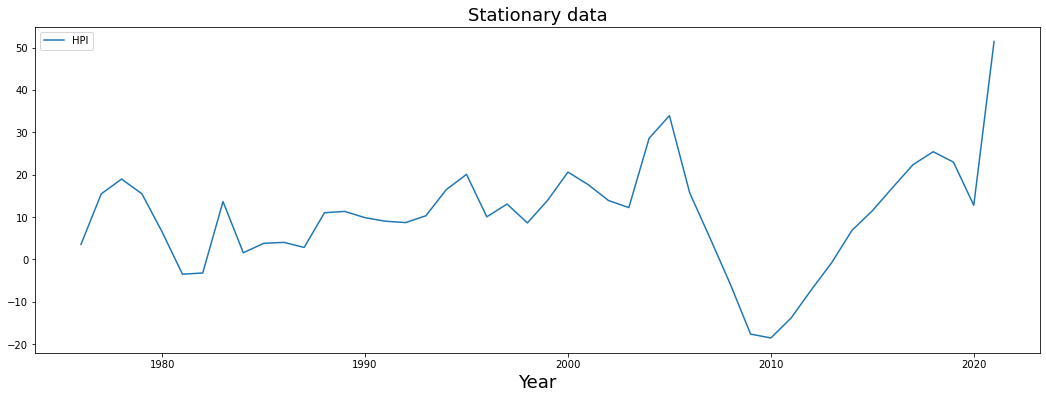

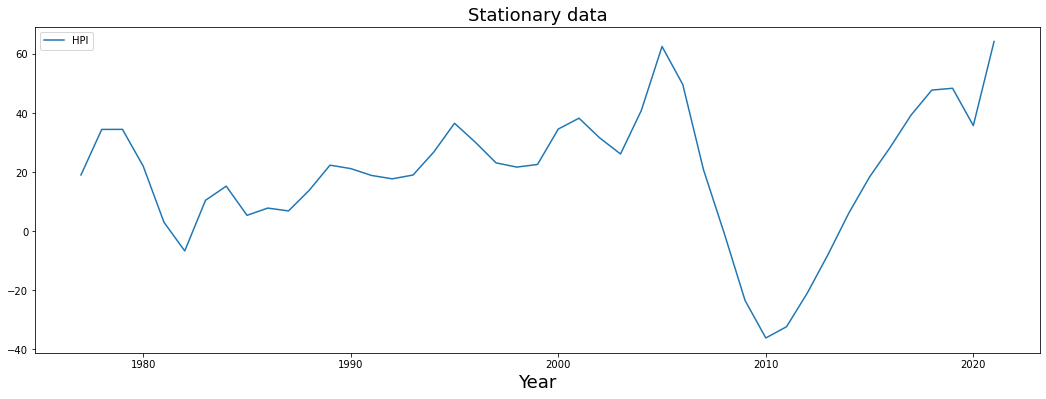

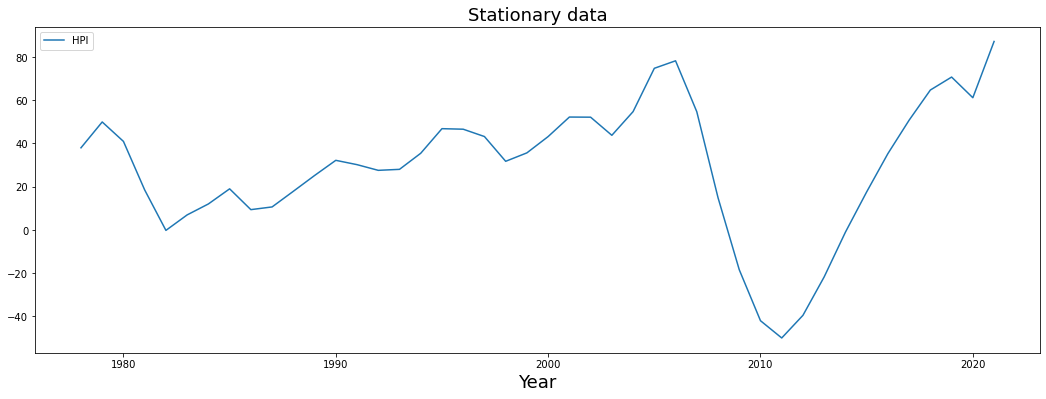

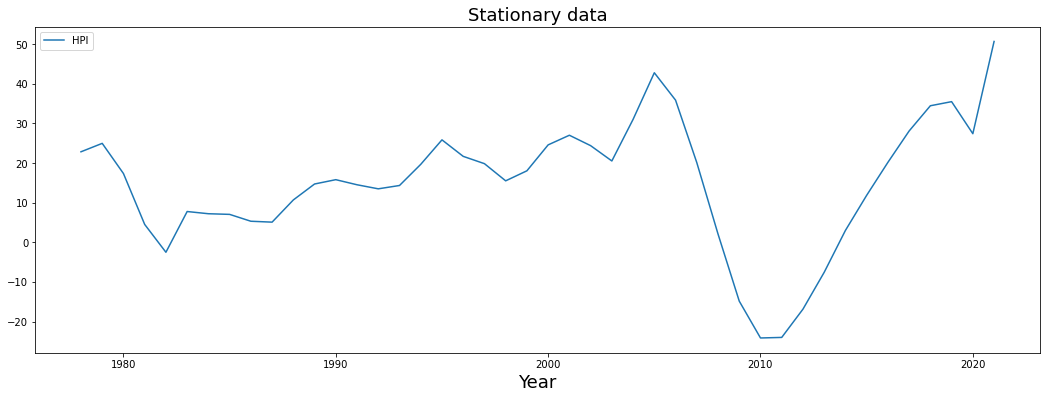

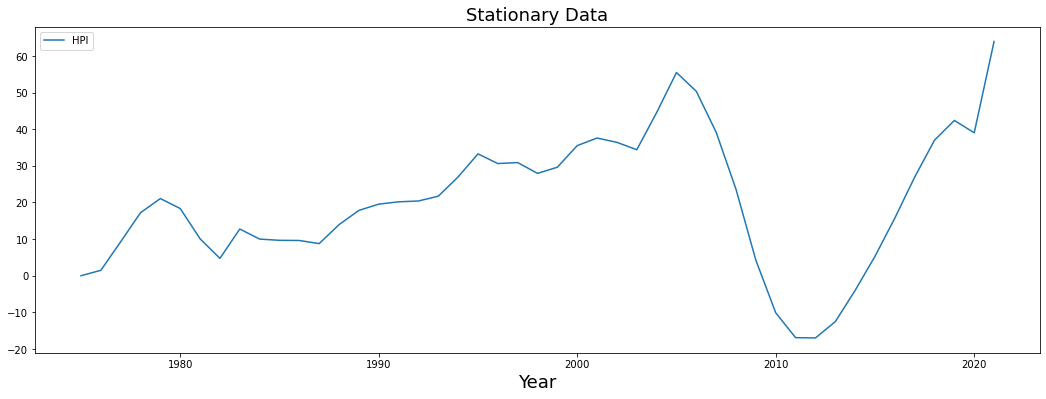

In [70]:
test_state(Wisconsin)

## Decomposition of non-stationary data

Colorado, Montana and Washington have all shown to be non-stationary through the methods of differencing, subtracting rolling mean, or exponential rolling mean. We can attempt to make these states' HPI data stationary through decomposing it. Our current assumption is that the data is non seasonal or on some kind of trend, but that there is a _randomness_ to it.  

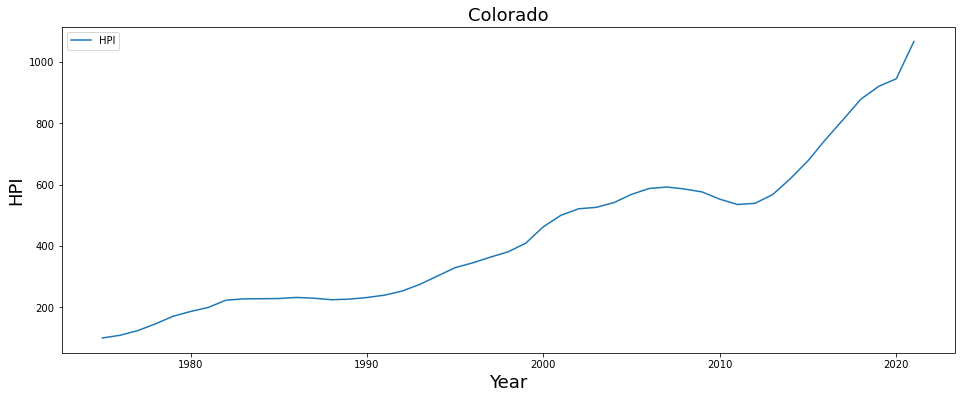

In [71]:
# Create a new variable and drop 'State' from Colorado
co_plot = Colorado.drop(columns = 'State')

co_plot.plot(figsize = (16,6))
plt.xlabel('Year', fontsize = 18)
plt.ylabel('HPI', fontsize = 18)
plt.title('Colorado', fontsize = 18);

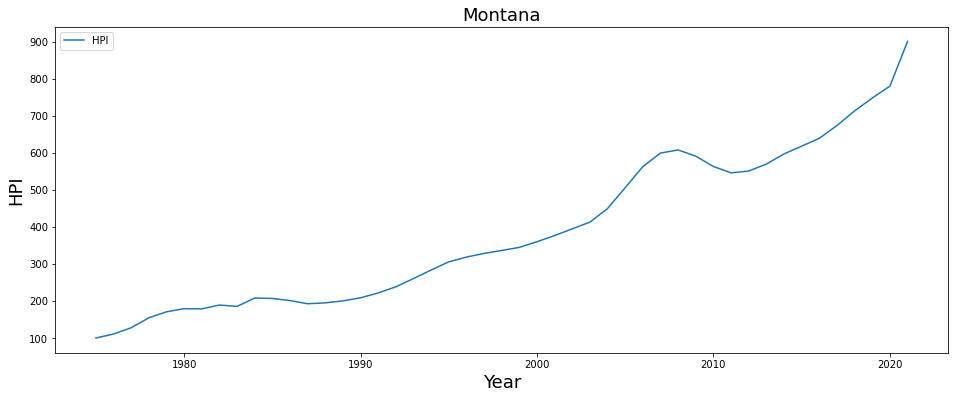

In [72]:
mt_plot = Montana.drop(columns = 'State')

mt_plot.plot(figsize = (16,6))
plt.xlabel('Year', fontsize = 18)
plt.ylabel('HPI', fontsize =18)
plt.title('Montana', fontsize = 18);

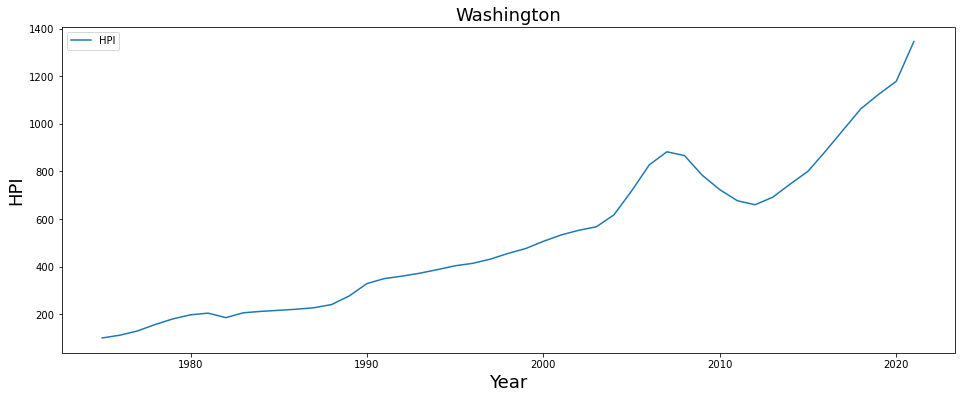

In [73]:
wa_plot = Washington.drop(columns = 'State')

wa_plot.plot(figsize = (16,6))
plt.xlabel('Year', fontsize = 18)
plt.ylabel('HPI', fontsize = 18)
plt.title('Washington', fontsize = 18);

<div class="alert alert-block alert-info">
There are a few assumptions that we are making about the data on these three states at a glance: <br><br>
    - There appears to be no real seasonality in any of the HPI data from these three states. <br>
    - There is definitely an upward trend. <br>
    - We cannot make this data stationary because of some sort of randomness to it. 
</div>

# Hypothesis Testing: 
Our hypothesis: prior to 2020, these states likely had HPI data that is capable of being considered stationary. Cannabis legalization was in effect for 3 of the 4 states prior to 2020 (Montana legalized in 2021) and so we can still see statistical data on these three states HPI prior to 2020. 

In [74]:
print(Colorado.tail())
print()
print(Colorado.info())

         State      HPI
Year                   
2017  Colorado   812.22
2018  Colorado   878.33
2019  Colorado   919.76
2020  Colorado   944.54
2021  Colorado  1066.08

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 1975 to 2021
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   State   47 non-null     object 
 1   HPI     47 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB
None


In [75]:
Co = Colorado.iloc[0:46]
print(Co.tail())
print()
print(Co.info())

         State     HPI
Year                  
2016  Colorado  747.34
2017  Colorado  812.22
2018  Colorado  878.33
2019  Colorado  919.76
2020  Colorado  944.54

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 1975 to 2020
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   State   46 non-null     object 
 1   HPI     46 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB
None


In [76]:
Co.head()

State     HPI
Year                  
1975  Colorado  100.00
1976  Colorado  108.73
1977  Colorado  123.83
1978  Colorado  145.60
1979  Colorado  170.48

Differencing:


Test Statistic                 -3.052677
p-value                         0.030259
#Lags Used                      1.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64

None
Second order differencing:


Test Statistic                 -3.781041
p-value                         0.003107
#Lags Used                      3.000000
Number of Observations Used    40.000000
Critical Value (1%)            -3.605565
Critical Value (5%)            -2.937069
Critical Value (10%)           -2.606986
dtype: float64

None
Third order differencing:


Test Statistic                 -1.755602
p-value                         0.402716
#Lags Used                      8.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64

None
Subtracting the rolling mean:


Test Statistic                 -3.430442
p-value                         0.009964
#Lags Used                      4.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64

None
Subtracting the exponential rolling mean:


Test Statistic                 -4.370964
p-value                         0.000334
#Lags Used                      1.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64

None


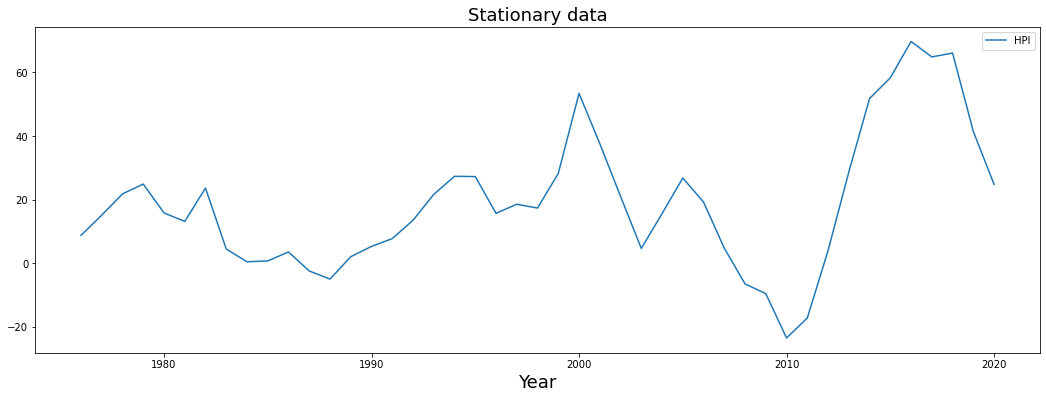

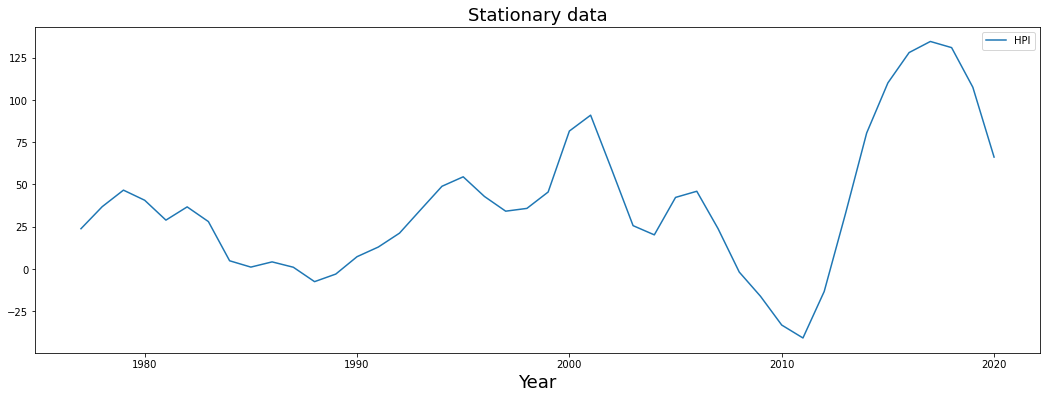

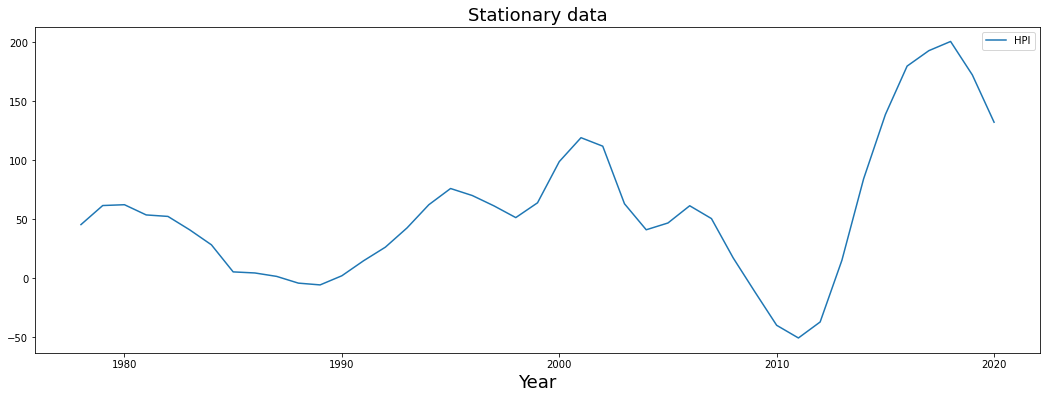

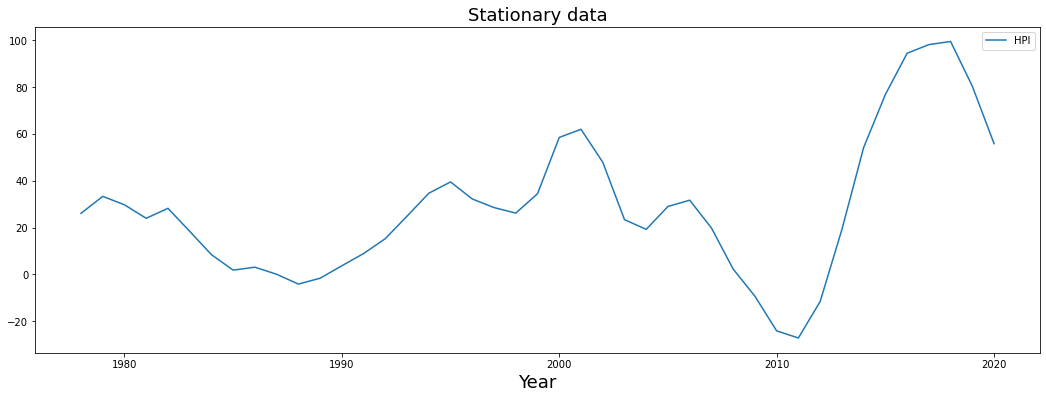

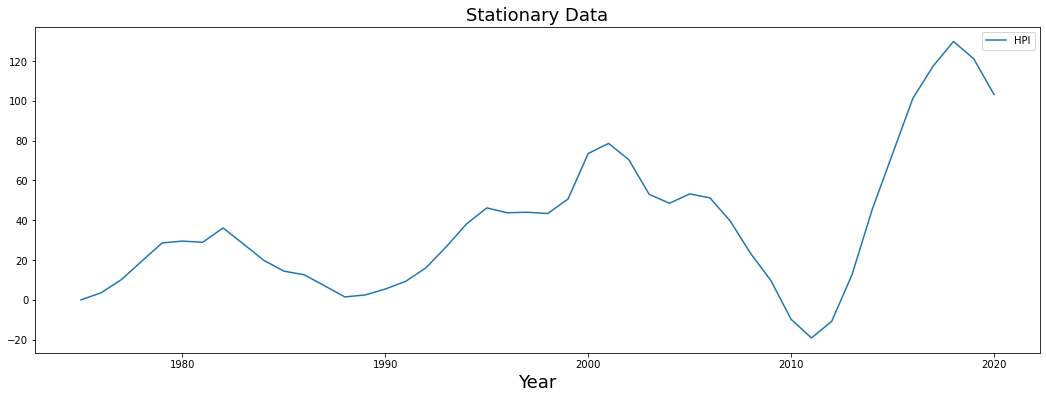

In [77]:
print('Differencing:')
print(diff(Co))
print('Second order differencing:')
print(second_order_diff(Co))
print('Third order differencing:')
print(third_order_diff(Co))
print('Subtracting the rolling mean:')
print(srm(Co))
print('Subtracting the exponential rolling mean:')
print(erm(Co))

## Does Marijuana legality suggest higher HPI in the years following legalization?

In [78]:
national_df.tail(20)

Year Annual Change (%)     HPI  HPI with 1990 base  HPI with 2000 base
27  2002              5.35  428.27              150.91              112.29
28  2003              4.38  447.03              157.52              117.21
29  2004              8.56  485.28              171.00              127.23
30  2005             11.42  540.72              190.53              141.77
31  2006              6.47  575.71              202.86              150.94
32  2007              1.01  581.53              204.91              152.47
33  2008             -4.35  556.21              195.99              145.83
34  2009             -7.37  515.21              181.54              135.08
35  2010             -4.99  489.50              172.49              128.34
36  2011             -4.29  468.50              165.08              122.83
37  2012             -1.69  460.58              162.29              120.76
38  2013              3.44  476.41              167.87              124.91
39  2014              6.14  505.69              178.19              132.58
40  2015              4.37  527.81              185.98              138.38
41  2016              5.34  555.97              195.91              145.77
42  2017              5.40  586.01              206.49              153.64
43  2018              5.65  619.12              218.16              162.33
44  2019              4.07  644.33              227.04              168.94
45  2020              2.85  662.71              233.52              173.75
46  2021             11.31  737.66              259.93              193.41

In [79]:
Alaska_pct = Alaska['HPI'].pct_change()
print(Alaska_pct.tail(20))

Year
2002    0.045753
2003    0.033108
2004    0.101711
2005    0.126283
2006    0.099386
2007    0.033307
2008   -0.002714
2009   -0.012222
2010   -0.004688
2011    0.004759
2012    0.001837
2013    0.027112
2014    0.024705
2015    0.031650
2016    0.018305
2017    0.013547
2018    0.013431
2019    0.023405
2020    0.021687
2021    0.066747
Name: HPI, dtype: float64


## Practice area

# Do not use

In [80]:
# def erm(state): 

# # Create the mi_exp_roll_mean variable
#     state = state.drop(columns = 'State')
#     exp_roll_mean = state.ewm(halflife = 2).mean()

# # Subtract mi_exp_roll_mean from mi 
#     minus_exp_roll_mean = state - exp_roll_mean

# # Drop null values and for the love of god make it a shorter variable name
#     mean = minus_exp_roll_mean.dropna()

#     dftest = adfuller(mean)

#     dfoutput = pd.Series(
#                 dftest[0:4], 
#                 index=['Test Statistic',
#                        'p-value',
#                        '#Lags Used',
#                        'Number of Observations Used']
#     )
    
#     print('Subtracting Exponential Rolling Mean gives pvalue: {}'.format(dfoutput['p-value']))

Test Statistic                 -2.775856
p-value                         0.061806
#Lags Used                      3.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64

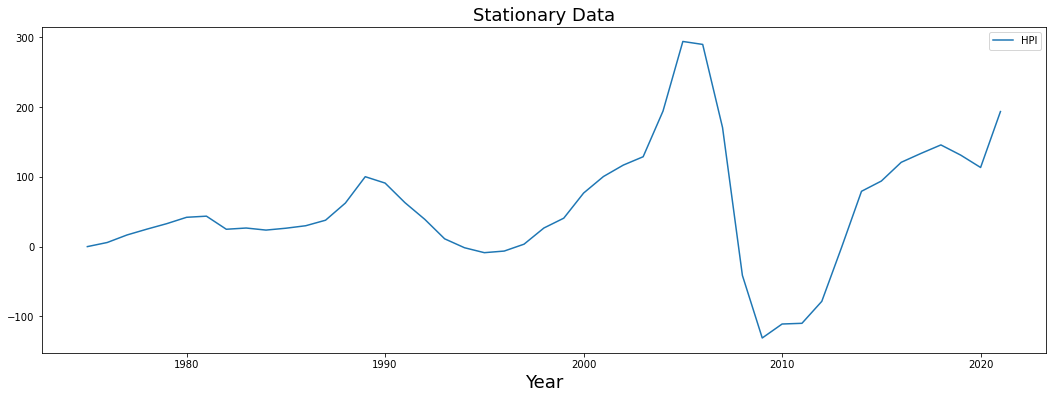

In [81]:
erm(California)

In [82]:
def plot(state):
# Plot original Michigan HPI
    state.plot(figsize = (16,6))
    plt.xlabel("Year", fontsize = 18)
    plt.ylabel("Housing Price Index", fontsize = 18)
    plt.title("State", fontsize = 18);

# Plot Michigan HPI with trends removed
    mean.plot(figsize = (18,6))
    plt.xlabel('Year', fontsize = 18);

NameError: name 'mean' is not defined

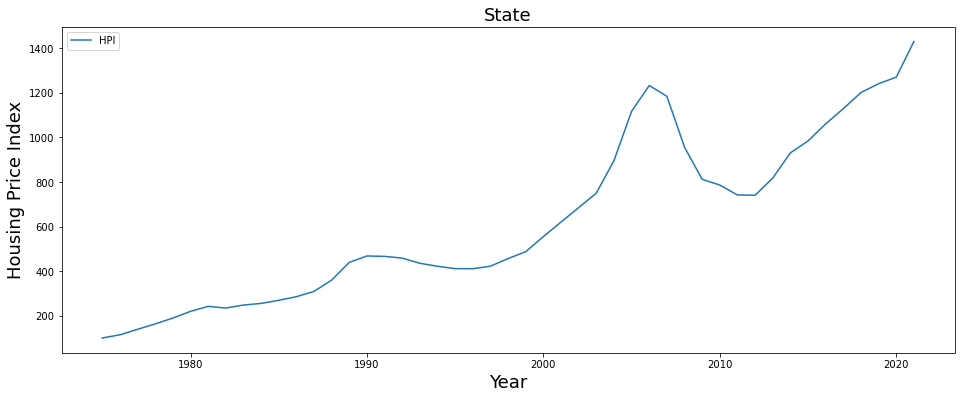

In [83]:
plot(California)